# Capstone: Supervised Learning

## Instructions: 

First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

Please execute the three tasks above in a Jupyter notebook that you will submit to the grading team below.

Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

    A specified research question your model addresses
    How you chose your model specification and what alternatives you compared it to
    The practical uses of your model for an audience of interest
    Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of all your work so far on supervised learning. As a secondary matter, your slides and the Jupyter notebook should be worthy of inclusion as examples of your work product when applying to jobs.

Supervised Learning Capstone Presentation Details:

Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

    A specified research question your model addresses
    How you chose your model specification and what alternatives you compared it to
    The practical uses of your model for an audience of interest
    Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of all your work so far on supervised learning. As a secondary matter, your slides and the Jupyter notebook should be worthy of inclusion as examples of your work product when applying to jobs.

    You should have a slide deck and 15 minute presentation that guides your assessor through the different models you tried and be able to speak to the best performing model and why it’s the best performing model.

    The presentation flow should be

        A quick intro about the context/topic of the project

        Information on the data (where it came from, how it was obtained, missingness, quick stats on the data, etc)

        A specified research question your model addresses

        How you chose your model specification and what alternatives you compared it to

        The practical uses of your model for an audience of interest

        Any weak points or shortcomings of your model

    After the presentation there will be a 5-10 min Q&A where other students and mentors can ask questions about your project.  So make sure you really understand the data and modelling you used!

## Data Source and information

data source: https://healthdata.gov/dataset/hospital-readmission-reduction/resource/f3830eb1-2d22-496c-b663-46b54e175d9f

https://healthdata.gov/dataset/hospital-readmission-reduction

In October 2012, CMS began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

https://data.medicare.gov/data/hospital-compare
Hospital Compare is a consumer-oriented website that provides information on the quality of care hospitals are providing to their patients. This information can help consumers make informed decisions about health care. Hospital Compare allows consumers to select multiple hospitals and directly compare performance measure information related to heart attack, emergency department care, preventive care, stroke care, and other conditions. The Centers for Medicare & Medicaid Services (CMS) created the Hospital Compare website to better inform health care consumers about a hospital’s quality of care. Hospital Compare provides data on over 4,000 Medicare-certified hospitals, including acute care hospitals, critical access hospitals (CAHs), children’s hospitals, Veterans Health Administration (VHA) Medical Centers, and hospital outpatient departments. Hospital Compare is part of an Administration-wide effort to increase the availability and accessibility of information on quality, utilization, and costs for effective, informed decision-making. More information about Hospital Compare can be found by visiting the CMS.gov website and performing a search for Hospital Compare. To access the Hospital Compare website, please visit www.medicare.gov/hospitalcompare. 

https://www.medicare.gov/hospitalcompare/Data/Data-Updated.html#%20
measures & current data period

https://www.medicare.gov/hospitalcompare/Data/Hospital-overall-ratings-calculation.html

hospital compare overall hospital rating
n = 4,573
distribution of stars (N/A, 1-5)

The methodology uses a statistical model known as a latent variable model. Seven different latent variable models are used to calculate scores for 7 groups of measures.
Mortality
Safety of Care
Readmission
Patient Experience
Effectiveness of Care
Timeliness of Care
Efficient Use of Medical Imaging

A hospital summary score is then calculated by taking the weighted average of these group scores. If a hospital is missing a measure category or group, the weights are redistributed amongst the qualifying measure categories or groups.
Finally, the overall hospital rating is calculated using the hospital summary score.

## additional data
https://www.cdc.gov/nchs/data_access/urban_rural.htm#Data_Files_and_Documentation
https://www.cdc.gov/nchs/data/data_acces_files/NCHSURCodes2013.xlsx
https://www.cdc.gov/nchs/data/series/sr_02/sr02_166.pdf

TheNationalCenterforHealthStatistics’(NCHS)Urban–RuralClassificationSchemeforCounties
metropolitanstatisticalareas(MSAs)

For ZIP to FIP look up
https://data.world/niccolley/us-zipcode-to-county-state/workspace/file?filename=ZIP-COUNTY-FIPS_2018-03.csv

## Load data files

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
unplan_readm_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\unplan_hosp_readm.csv')

In [3]:
readm_red_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\hosp_readm_reduct_prog.csv')

In [4]:
mort_meas_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\hosp_mortality_measures.csv')

In [5]:
hcahps_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\hcahps_ratings.csv')

In [6]:
gen_info_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\hosp_gen_info.csv')

## Cleaning data
clean data for each file individually prior to merging dataframes into one file for modeling

### reduce each file to relevant data only,  address missing values, convert to numeric, dummy categorical values

In [7]:
unplan_readm_df.head(3)

Provider ID                     Hospital Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   

                                      Measure Name   Measure ID  \
0   Hospital return days for heart attack patients  EDAC_30_AMI   
1  Hospital return days for heart failure patients   EDAC_30_HF   
2      Hospital return days for pneumonia patients   EDAC_30_PN   

                        Compared to National Denominator Score Lower Estimate  \
0            Average Days per 100 Discharges         742  -0.8          -11.6   
1  More Days Than Average per 100 Discharges        1114  17.8            4.5   
2            Average Days per 100 Discharges         604  -7.8          -21.3   

  Higher Estimate Footnote Measure Start Date Measure End Date  
0            10.6      NaN           7/1/2015        6/30/2018  
1            31.5      NaN           7/1/2015        6/30/2018  
2               6      NaN           7/1/2015        6/30/2018

In [8]:
unplan_readm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54093 entries, 0 to 54092
Data columns (total 18 columns):
Provider ID             54093 non-null object
Hospital Name           54093 non-null object
Address                 54093 non-null object
City                    54093 non-null object
State                   54093 non-null object
ZIP Code                54093 non-null int64
County Name             54093 non-null object
Phone Number            54093 non-null int64
Measure Name            54093 non-null object
Measure ID              54093 non-null object
Compared to National    54093 non-null object
Denominator             54093 non-null object
Score                   54093 non-null object
Lower Estimate          54093 non-null object
Higher Estimate         54093 non-null object
Footnote                19755 non-null object
Measure Start Date      54093 non-null object
Measure End Date        54093 non-null object
dtypes: int64(2), object(16)
memory usage: 7.4+ MB


In [9]:
#drop unnecessary columns
unplan_readm_df = unplan_readm_df.drop(['Address', 'City', 'County Name', 'Phone Number', 'Measure Name', 'Footnote', 'Measure Start Date', 'Measure End Date'], axis=1)

In [10]:
#drop all unnecessary Measure IDs, keep only HF
unplan_readm_df['Measure ID'].unique()

array(['EDAC_30_AMI', 'EDAC_30_HF', 'EDAC_30_PN', 'OP_32', 'READM_30_AMI',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF',
       'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN'],
      dtype=object)

In [11]:
#drop all but HF values
unplan_readm_df = unplan_readm_df[unplan_readm_df['Measure ID'].isin(['READM_30_HF'])] 
unplan_readm_df.head(3)

Provider ID                     Hospital Name State  ZIP Code   Measure ID  \
7        10001  SOUTHEAST ALABAMA MEDICAL CENTER    AL     36301  READM_30_HF   
18       10005     MARSHALL MEDICAL CENTER SOUTH    AL     35957  READM_30_HF   
29       10006      NORTH ALABAMA MEDICAL CENTER    AL     35630  READM_30_HF   

                   Compared to National Denominator Score Lower Estimate  \
7   No Different Than the National Rate        1114  22.6           20.5   
18  No Different Than the National Rate         341  21.3           18.2   
29  No Different Than the National Rate         793  20.4           18.1   

   Higher Estimate  
7             24.8  
18            24.9  
29            22.9

In [12]:
#change name of Measure ID columns to identify the original df and measure
unplan_readm_df.rename(columns={'Measure ID':'READM_30_HF'}, inplace=True)

In [13]:
#change value of 'READM_30_HF' to numeric
unplan_readm_df.loc[unplan_readm_df.READM_30_HF == 'READM_30_HF', 'READM_30_HF'] = 1

In [14]:
#convert to numeric
cols = ['Provider ID', 'Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']
unplan_readm_df[cols] = unplan_readm_df[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')

In [15]:
cols = unplan_readm_df.columns[unplan_readm_df.columns.isin(['Denominator','Score', 'Lower Estimate', 'Higher Estimate', 'Compared to National'])]
unplan_readm_df.rename(columns = dict(zip(cols, cols + '_30d_readm')), inplace=True)

In [16]:
unplan_readm_df['Compared to National_30d_readm'].unique()

array(['No Different Than the National Rate', 'Number of Cases Too Small',
       'Not Available', 'Worse Than the National Rate',
       'Better Than the National Rate'], dtype=object)

In [17]:
unplan_readm_df = pd.concat([unplan_readm_df, pd.get_dummies(unplan_readm_df['Compared to National_30d_readm'], prefix='comp_nat_30d_readm', drop_first=True)], axis =1)

In [18]:
unplan_readm_df = unplan_readm_df.drop(['Compared to National_30d_readm'], axis=1)

In [19]:
unplan_readm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 7 to 54089
Data columns (total 13 columns):
Provider ID                                               4758 non-null float32
Hospital Name                                             4930 non-null object
State                                                     4930 non-null object
ZIP Code                                                  4930 non-null int64
READM_30_HF                                               4930 non-null int64
Denominator_30d_readm                                     3692 non-null float32
Score_30d_readm                                           3692 non-null float32
Lower Estimate_30d_readm                                  3692 non-null float32
Higher Estimate_30d_readm                                 3692 non-null float32
comp_nat_30d_readm_No Different Than the National Rate    4930 non-null uint8
comp_nat_30d_readm_Not Available                          4930 non-null uint8
comp_nat_30d_readm_Num

In [20]:
unplan_readm_df.isnull().sum()

Provider ID                                                172
Hospital Name                                                0
State                                                        0
ZIP Code                                                     0
READM_30_HF                                                  0
Denominator_30d_readm                                     1238
Score_30d_readm                                           1238
Lower Estimate_30d_readm                                  1238
Higher Estimate_30d_readm                                 1238
comp_nat_30d_readm_No Different Than the National Rate       0
comp_nat_30d_readm_Not Available                             0
comp_nat_30d_readm_Number of Cases Too Small                 0
comp_nat_30d_readm_Worse Than the National Rate              0
dtype: int64

Plan to fill in missing continuous values with mean by hospital & READM_30_HF once datasets are merged. 

In [21]:
unplan_readm_df.head(3)

Provider ID                     Hospital Name State  ZIP Code  \
7       10001.0  SOUTHEAST ALABAMA MEDICAL CENTER    AL     36301   
18      10005.0     MARSHALL MEDICAL CENTER SOUTH    AL     35957   
29      10006.0      NORTH ALABAMA MEDICAL CENTER    AL     35630   

    READM_30_HF  Denominator_30d_readm  Score_30d_readm  \
7             1                 1114.0        22.600000   
18            1                  341.0        21.299999   
29            1                  793.0        20.400000   

    Lower Estimate_30d_readm  Higher Estimate_30d_readm  \
7                  20.500000                  24.799999   
18                 18.200001                  24.900000   
29                 18.100000                  22.900000   

    comp_nat_30d_readm_No Different Than the National Rate  \
7                                                   1        
18                                                  1        
29                                                  1        

    comp_nat_30d_readm_Not Available  \
7                                  0   
18                                 0   
29                                 0   

    comp_nat_30d_readm_Number of Cases Too Small  \
7                                              0   
18                                             0   
29                                             0   

    comp_nat_30d_readm_Worse Than the National Rate  
7                                                 0  
18                                                0  
29                                                0

In [22]:
readm_red_df.head(3)

Hospital Name  Provider ID State        Measure Name  \
0  BYRD REGIONAL HOSPITAL       190164    LA   READM_30_AMI_HRRP   
1  BYRD REGIONAL HOSPITAL       190164    LA  READM_30_CABG_HRRP   
2  BYRD REGIONAL HOSPITAL       190164    LA  READM_30_COPD_HRRP   

  Number of Discharges                                           Footnote  \
0        Not Available  1 - The number of cases/patients is too few to...   
1        Not Available  1 - The number of cases/patients is too few to...   
2                  217                                                NaN   

  Excess Readmission Ratio Predicted Readmission Rate  \
0            Not Available              Not Available   
1            Not Available              Not Available   
2                   1.0195                    20.9722   

  Expected Readmission Rate Number of Readmissions Start Date   End Date  
0             Not Available          Not Available   7/1/2014  6/30/2017  
1             Not Available          Not Available   7/1/2014  6/30/2017  
2                   20.5712                     47   7/1/2014  6/30/2017

In [23]:
readm_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
Hospital Name                 19674 non-null object
Provider ID                   19674 non-null int64
State                         19674 non-null object
Measure Name                  19674 non-null object
Number of Discharges          19674 non-null object
Footnote                      8157 non-null object
Excess Readmission Ratio      19674 non-null object
Predicted Readmission Rate    19674 non-null object
Expected Readmission Rate     19674 non-null object
Number of Readmissions        19674 non-null object
Start Date                    19674 non-null object
End Date                      19674 non-null object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


In [24]:
#drop unnecessary columns
readm_red_df = readm_red_df.drop(['Footnote', 'Start Date', 'End Date'], axis=1)

In [25]:
readm_red_df['Measure Name'].unique()

array(['READM_30_AMI_HRRP', 'READM_30_CABG_HRRP', 'READM_30_COPD_HRRP',
       'READM_30_HF_HRRP', 'READM_30_HIP_KNEE_HRRP', 'READM_30_PN_HRRP'],
      dtype=object)

In [26]:
#drop all but HF values
readm_red_df = readm_red_df[readm_red_df['Measure Name'].isin(['READM_30_HF_HRRP'])] 
readm_red_df.head(3)

Hospital Name  Provider ID State      Measure Name  \
3             BYRD REGIONAL HOSPITAL       190164    LA  READM_30_HF_HRRP   
9   GRAND ITASCA CLINIC AND HOSPITAL       240064    MN  READM_30_HF_HRRP   
15                   HARMON HOSPITAL       290042    NV  READM_30_HF_HRRP   

   Number of Discharges Excess Readmission Ratio Predicted Readmission Rate  \
3                   259                   1.0773                    23.9788   
9                    75                   0.9726                    19.6816   
15        Not Available            Not Available              Not Available   

   Expected Readmission Rate Number of Readmissions  
3                    22.2578                     67  
9                    20.2355                     13  
15             Not Available          Not Available

In [27]:
#change name of Measure ID columns to identify the original df and measure
readm_red_df.rename(columns={'Measure Name':'READM_30_HF_HRRP'}, inplace=True)

In [28]:
#change value of READM_30_HF_HRRP to numeric
readm_red_df.loc[readm_red_df.READM_30_HF_HRRP == 'READM_30_HF_HRRP', 'READM_30_HF_HRRP'] = 1

In [29]:
cols = ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']
readm_red_df[cols] = readm_red_df[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')

### creating  additional feature = target
Excess Readmission Ratio: represents Hospital's "predicted" number of readmissions compared to CMS "expected" number of readmissions. 

Calculate the **Actual Readmission Rate** = 'actual_rrate' (number of readmissions/discharges)

Calculate the **Actual Readmission Ratio** = 'actual_rratio' ('actual_rrate'/'Expected Readmission Rate') in order to compare the Excess Readmission Ratio

target = 'actual_rratio'

In [30]:
readm_red_df['actual_rrate'] = readm_red_df['Number of Readmissions']/readm_red_df['Number of Discharges'] * 100

In [31]:
readm_red_df['actual_rratio'] = readm_red_df['actual_rrate']/readm_red_df['Expected Readmission Rate']

In [32]:
readm_red_df.isnull().sum()

Hospital Name                   0
Provider ID                     0
State                           0
READM_30_HF_HRRP                0
Number of Discharges          602
Excess Readmission Ratio      397
Predicted Readmission Rate    397
Expected Readmission Rate     397
Number of Readmissions        609
actual_rrate                  609
actual_rratio                 609
dtype: int64

Will drop records with missing 'Number of Discharges' and 'Number of Readmissions' as it will be impossible to calculate the 'actual_rratio', which is the target value for the model. 

In [33]:
readm_red_df = readm_red_df[readm_red_df['Number of Readmissions'].notnull()]

In [34]:
readm_red_df.isnull().sum()

Hospital Name                 0
Provider ID                   0
State                         0
READM_30_HF_HRRP              0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
actual_rrate                  0
actual_rratio                 0
dtype: int64

In [35]:
#add suffix to column names for identification purposes
cols = readm_red_df.columns[readm_red_df.columns.isin(['Number of Discharges','Excess Readmission Ratio', 
                                                       'Predicted Readmission Rate', 'Expected Readmission Rate', 
                                                       'Number of Readmissions', 'actual_rrate', 'actual_rratio'])]
readm_red_df.rename(columns = dict(zip(cols, cols + '_30d_HRRP')), inplace=True)

In [36]:
readm_red_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 3 to 19671
Data columns (total 11 columns):
Hospital Name                          2670 non-null object
Provider ID                            2670 non-null int64
State                                  2670 non-null object
READM_30_HF_HRRP                       2670 non-null int64
Number of Discharges_30d_HRRP          2670 non-null float32
Excess Readmission Ratio_30d_HRRP      2670 non-null float32
Predicted Readmission Rate_30d_HRRP    2670 non-null float32
Expected Readmission Rate_30d_HRRP     2670 non-null float32
Number of Readmissions_30d_HRRP        2670 non-null float32
actual_rrate_30d_HRRP                  2670 non-null float32
actual_rratio_30d_HRRP                 2670 non-null float32
dtypes: float32(7), int64(2), object(2)
memory usage: 177.3+ KB


In [37]:
readm_red_df.head(3)

Hospital Name  Provider ID State  READM_30_HF_HRRP  \
3             BYRD REGIONAL HOSPITAL       190164    LA                 1   
9   GRAND ITASCA CLINIC AND HOSPITAL       240064    MN                 1   
21           CHESHIRE MEDICAL CENTER       300019    NH                 1   

    Number of Discharges_30d_HRRP  Excess Readmission Ratio_30d_HRRP  \
3                           259.0                             1.0773   
9                            75.0                             0.9726   
21                          303.0                             0.9514   

    Predicted Readmission Rate_30d_HRRP  Expected Readmission Rate_30d_HRRP  \
3                             23.978800                           22.257799   
9                             19.681601                           20.235500   
21                            19.854500                           20.869600   

    Number of Readmissions_30d_HRRP  actual_rrate_30d_HRRP  \
3                              67.0              25.868725   
9                              13.0              17.333334   
21                             57.0              18.811882   

    actual_rratio_30d_HRRP  
3                 1.162232  
9                 0.856580  
21                0.901401

In [38]:
mort_meas_df.head(3)

Provider ID                     Hospital Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name     Measure ID  \
0  Rate of complications for hip/knee replacement...  COMP_HIP_KNEE   
1               Death rate for heart attack patients    MORT_30_AMI   
2               Death rate for CABG surgery patients   MORT_30_CABG   

                  Compared to National Denominator Score Lower Estimate  \
0  No Different Than the National Rate         292   3.2            2.1   
1  No Different Than the National Rate         688    13             11   
2  No Different Than the National Rate         291   4.3            2.6   

  Higher Estimate Footnote Measure Start Date Measure End Date  
0             4.8      NaN           4/1/2015        3/31/2018  
1            15.5      NaN           7/1/2015        6/30/2018  
2             6.8      NaN           7/1/2015        6/30/2018

In [39]:
mort_meas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91889 entries, 0 to 91888
Data columns (total 18 columns):
Provider ID             91889 non-null object
Hospital Name           91889 non-null object
Address                 91889 non-null object
City                    91889 non-null object
State                   91889 non-null object
ZIP Code                91889 non-null int64
County Name             91889 non-null object
Phone Number            91889 non-null int64
Measure Name            91889 non-null object
Measure ID              91889 non-null object
Compared to National    91889 non-null object
Denominator             91889 non-null object
Score                   91889 non-null object
Lower Estimate          91889 non-null object
Higher Estimate         91889 non-null object
Footnote                37628 non-null object
Measure Start Date      91889 non-null object
Measure End Date        91889 non-null object
dtypes: int64(2), object(16)
memory usage: 12.6+ MB


In [40]:
mort_meas_df = mort_meas_df.drop(['Address', 'City', 'County Name', 'Phone Number', 'Measure Name', 'Footnote', 'Measure Start Date', 'Measure End Date'], axis=1)

In [41]:
mort_meas_df['Measure ID'].unique()

array(['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_10_POST_KIDNEY',
       'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT',
       'PSI_13_POST_SEPSIS', 'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC',
       'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
       'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM'], dtype=object)

In [42]:
#drop all but HF values
mort_meas_df = mort_meas_df[mort_meas_df['Measure ID'].isin(['MORT_30_HF'])] 
mort_meas_df.head(3)

Provider ID                     Hospital Name State  ZIP Code  Measure ID  \
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER    AL     36301  MORT_30_HF   
23       10005     MARSHALL MEDICAL CENTER SOUTH    AL     35957  MORT_30_HF   
42       10006      NORTH ALABAMA MEDICAL CENTER    AL     35630  MORT_30_HF   

                   Compared to National Denominator Score Lower Estimate  \
4   No Different Than the National Rate         869  12.7           10.7   
23  No Different Than the National Rate         318  14.4           11.4   
42  No Different Than the National Rate         671  12.9           10.6   

   Higher Estimate  
4               15  
23            17.9  
42            15.4

In [43]:
#change name of Measure ID columns to identify the original df and measure
mort_meas_df.rename(columns={'Measure ID':'MORT_30_HF'}, inplace=True)

In [44]:
#change value of MORT_30_HF to numeric
mort_meas_df.loc[mort_meas_df.MORT_30_HF == 'MORT_30_HF', 'MORT_30_HF'] = 1

In [45]:
cols = ['Provider ID', 'Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']
mort_meas_df[cols] = mort_meas_df[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')

In [46]:
mort_meas_df['Compared to National'].unique()

array(['No Different Than the National Rate', 'Not Available',
       'Number of Cases Too Small', 'Better Than the National Rate',
       'Worse Than the National Rate'], dtype=object)

In [47]:
mort_meas_df = pd.concat([mort_meas_df, pd.get_dummies(mort_meas_df['Compared to National'], prefix='nat_comp_30d_mort', drop_first=True)], axis =1)

In [48]:
mort_meas_df = mort_meas_df.drop(['Compared to National'], axis=1)

In [49]:
cols = mort_meas_df.columns[mort_meas_df.columns.isin(['Denominator','Score', 'Lower Estimate', 'Higher Estimate'])]
mort_meas_df.rename(columns = dict(zip(cols, cols + '_30d_mort')), inplace=True)

In [50]:
mort_meas_df.isnull().sum()

Provider ID                                               172
Hospital Name                                               0
State                                                       0
ZIP Code                                                    0
MORT_30_HF                                                  0
Denominator_30d_mort                                     1313
Score_30d_mort                                           1313
Lower Estimate_30d_mort                                  1313
Higher Estimate_30d_mort                                 1313
nat_comp_30d_mort_No Different Than the National Rate       0
nat_comp_30d_mort_Not Available                             0
nat_comp_30d_mort_Number of Cases Too Small                 0
nat_comp_30d_mort_Worse Than the National Rate              0
dtype: int64

In [51]:
mort_meas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 4 to 91874
Data columns (total 13 columns):
Provider ID                                              4758 non-null float32
Hospital Name                                            4930 non-null object
State                                                    4930 non-null object
ZIP Code                                                 4930 non-null int64
MORT_30_HF                                               4930 non-null int64
Denominator_30d_mort                                     3617 non-null float32
Score_30d_mort                                           3617 non-null float32
Lower Estimate_30d_mort                                  3617 non-null float32
Higher Estimate_30d_mort                                 3617 non-null float32
nat_comp_30d_mort_No Different Than the National Rate    4930 non-null uint8
nat_comp_30d_mort_Not Available                          4930 non-null uint8
nat_comp_30d_mort_Number of Cases

In [52]:
mort_meas_df.head(3)

Provider ID                     Hospital Name State  ZIP Code  MORT_30_HF  \
4       10001.0  SOUTHEAST ALABAMA MEDICAL CENTER    AL     36301           1   
23      10005.0     MARSHALL MEDICAL CENTER SOUTH    AL     35957           1   
42      10006.0      NORTH ALABAMA MEDICAL CENTER    AL     35630           1   

    Denominator_30d_mort  Score_30d_mort  Lower Estimate_30d_mort  \
4                  869.0            12.7                     10.7   
23                 318.0            14.4                     11.4   
42                 671.0            12.9                     10.6   

    Higher Estimate_30d_mort  \
4                       15.0   
23                      17.9   
42                      15.4   

    nat_comp_30d_mort_No Different Than the National Rate  \
4                                                   1       
23                                                  1       
42                                                  1       

    nat_comp_30d_mort_Not Available  \
4                                 0   
23                                0   
42                                0   

    nat_comp_30d_mort_Number of Cases Too Small  \
4                                             0   
23                                            0   
42                                            0   

    nat_comp_30d_mort_Worse Than the National Rate  
4                                                0  
23                                               0  
42                                               0

In [53]:
hcahps_df.head(10)

Provider ID                     Hospital Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
5       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
6       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
7       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
8       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
9       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number      HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON    3347938701           H_COMP_1_A_P   
1  DOTHAN    AL     36301     HOUSTON    3347938701          H_COMP_1_SN_P   
2  DOTHAN    AL     36301     HOUSTON    3347938701           H_COMP_1_U_P   
3  DOTHAN    AL     36301     HOUSTON    3347938701  H_COMP_1_LINEAR_SCORE   
4  DOTHAN    AL     36301     HOUSTON    3347938701   H_COMP_1_STAR_RATING   
5  DOTHAN    AL     36301     HOUSTON    3347938701    H_NURSE_RESPECT_A_P   
6  DOTHAN    AL     36301     HOUSTON    3347938701   H_NURSE_RESPECT_SN_P   
7  DOTHAN    AL     36301     HOUSTON    3347938701    H_NURSE_RESPECT_U_P   
8  DOTHAN    AL     36301     HOUSTON    3347938701     H_NURSE_LISTEN_A_P   
9  DOTHAN    AL     36301     HOUSTON    3347938701    H_NURSE_LISTEN_SN_P   

                                     HCAHPS Question  ...  \
0  Patients who reported that their nurses "Alway...  ...   
1  Patients who reported that their nurses "Somet...  ...   
2  Patients who reported that their nurses "Usual...  ...   
3            Nurse communication - linear mean score  ...   
4                  Nurse communication - star rating  ...   
5  Patients who reported that their nurses "Alway...  ...   
6  Patients who reported that their nurses "Somet...  ...   
7  Patients who reported that their nurses "Usual...  ...   
8  Patients who reported that their nurses "Alway...  ...   
9  Patients who reported that their nurses "Somet...  ...   

  Patient Survey Star Rating Footnote HCAHPS Answer Percent  \
0                                 NaN                    72   
1                                 NaN                     9   
2                                 NaN                    19   
3                                 NaN        Not Applicable   
4                                 NaN        Not Applicable   
5                                 NaN                    78   
6                                 NaN                     6   
7                                 NaN                    16   
8                                 NaN                    69   
9                                 NaN                    10   

  HCAHPS Answer Percent Footnote HCAHPS Linear Mean Value  \
0                            NaN           Not Applicable   
1                            NaN           Not Applicable   
2                            NaN           Not Applicable   
3                            NaN                       87   
4                            NaN           Not Applicable   
5                            NaN           Not Applicable   
6                            NaN           Not Applicable   
7                            NaN           Not Applicable   
8                            NaN           Not Applicable   
9                            NaN           Not Applicable   

  Number of Completed Surveys Number of Completed Surveys Footnote  \
0                         526                                  NaN   
1                         526                                  NaN   
2                         526                                  NaN   

In [54]:
hcahps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455235 entries, 0 to 455234
Data columns (total 22 columns):
Provider ID                              455235 non-null object
Hospital Name                            455235 non-null object
Address                                  455235 non-null object
City                                     455235 non-null object
State                                    455235 non-null object
ZIP Code                                 455235 non-null int64
County Name                              455235 non-null object
Phone Number                             455235 non-null int64
HCAHPS Measure ID                        455235 non-null object
HCAHPS Question                          455235 non-null object
HCAHPS Answer Description                455235 non-null object
Patient Survey Star Rating               455235 non-null object
Patient Survey Star Rating Footnote      15103 non-null object
HCAHPS Answer Percent                    455235 non-null obj

In [55]:
hcahps_df = hcahps_df.drop(['Address', 'City', 'County Name', 'Phone Number', 
                            'HCAHPS Answer Percent Footnote','Patient Survey Star Rating Footnote', 
                            'Number of Completed Surveys Footnote', 'Survey Response Rate Percent Footnote', 
                            'Measure Start Date', 'Measure End Date', 'HCAHPS Question', 'HCAHPS Answer Percent', 
                            'Survey Response Rate Percent', 'Number of Completed Surveys'], axis=1)

#### unable to use dataset without significant wrangling due to current structure; 
will use only patient star rating and HCAHPS linear mean value as features at this time

In [56]:
cols = ['Patient Survey Star Rating', 'HCAHPS Linear Mean Value']
hcahps_df[cols] = hcahps_df[cols].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')

In [57]:
hcahps_df['HCAHPS Measure ID'].unique()

array(['H_COMP_1_A_P', 'H_COMP_1_SN_P', 'H_COMP_1_U_P',
       'H_COMP_1_LINEAR_SCORE', 'H_COMP_1_STAR_RATING',
       'H_NURSE_RESPECT_A_P', 'H_NURSE_RESPECT_SN_P',
       'H_NURSE_RESPECT_U_P', 'H_NURSE_LISTEN_A_P', 'H_NURSE_LISTEN_SN_P',
       'H_NURSE_LISTEN_U_P', 'H_NURSE_EXPLAIN_A_P',
       'H_NURSE_EXPLAIN_SN_P', 'H_NURSE_EXPLAIN_U_P', 'H_COMP_2_A_P',
       'H_COMP_2_SN_P', 'H_COMP_2_U_P', 'H_COMP_2_LINEAR_SCORE',
       'H_COMP_2_STAR_RATING', 'H_DOCTOR_RESPECT_A_P',
       'H_DOCTOR_RESPECT_SN_P', 'H_DOCTOR_RESPECT_U_P',
       'H_DOCTOR_LISTEN_A_P', 'H_DOCTOR_LISTEN_SN_P',
       'H_DOCTOR_LISTEN_U_P', 'H_DOCTOR_EXPLAIN_A_P',
       'H_DOCTOR_EXPLAIN_SN_P', 'H_DOCTOR_EXPLAIN_U_P', 'H_COMP_3_A_P',
       'H_COMP_3_SN_P', 'H_COMP_3_U_P', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_3_STAR_RATING', 'H_CALL_BUTTON_A_P', 'H_CALL_BUTTON_SN_P',
       'H_CALL_BUTTON_U_P', 'H_BATH_HELP_A_P', 'H_BATH_HELP_SN_P',
       'H_BATH_HELP_U_P', 'H_COMP_5_A_P', 'H_COMP_5_SN_P', 'H_COMP_5_U_P',


In [58]:
#drop all but likely correlated values
hcahps_df = hcahps_df[hcahps_df['HCAHPS Measure ID'].isin(['H_COMP_1_LINEAR_SCORE', 'H_COMP_1_STAR_RATING',
                                                           'H_COMP_2_LINEAR_SCORE', 'H_COMP_2_STAR_RATING',
                                                           'H_COMP_5_LINEAR_SCORE', 'H_COMP_5_STAR_RATING',
                                                           'H_COMP_6_LINEAR_SCORE', 'H_COMP_6_STAR_RATING',
                                                           'H_COMP_7_LINEAR_SCORE', 'H_COMP_7_STAR_RATING', 
                                                           'H_HSP_RATING_LINEAR_SCORE', 'H_HSP_RATING_STAR_RATING',
                                                           'H_STAR_RATING'])] 

In [59]:
pd.set_option('display.max_columns', 50)

In [60]:
hcahps_df = pd.concat([hcahps_df, pd.DataFrame(columns = ['rn_comm_LINEAR', 'rn_comm_STAR', 
                                            'dr_comm_LINEAR', 'dr_comm_STAR', 
                                            'meds_LINEAR', 'meds_STAR', 
                                            'discharge_LINEAR', 'discharge_STAR',
                                            'transition_LINEAR', 'transition_STAR',
                                            'Overall_LINEAR', 'Overall_STAR',
                                            'Summary_STAR'])], sort=False)

In [61]:
linear = ['H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE',
          'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 
          'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE']
new_linear = ['rn_comm_LINEAR', 'dr_comm_LINEAR',
              'meds_LINEAR', 'discharge_LINEAR', 
              'transition_LINEAR', 'Overall_LINEAR']

for i, column in enumerate(linear):
    hcahps_df[new_linear[i]] = hcahps_df[hcahps_df['HCAHPS Measure ID'] == column]['HCAHPS Linear Mean Value']

In [62]:
star = ['H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING',
        'H_COMP_5_STAR_RATING','H_COMP_6_STAR_RATING',
        'H_COMP_7_STAR_RATING','H_HSP_RATING_STAR_RATING',
        'H_STAR_RATING']
new_star = ['rn_comm_STAR', 'dr_comm_STAR',
            'meds_STAR', 'discharge_STAR',
            'transition_STAR','Overall_STAR',
            'Summary_STAR']

for i, column in enumerate(star):
    hcahps_df[new_star[i]] = hcahps_df[hcahps_df['HCAHPS Measure ID'] == column]['Patient Survey Star Rating']

In [63]:
hcahps_df['Provider ID'] = hcahps_df['Provider ID'].apply(pd.to_numeric, errors = 'coerce', downcast = 'integer')

In [64]:
hcahps_df.isnull().sum()

Provider ID                    1781
Hospital Name                     0
State                             0
ZIP Code                          0
HCAHPS Measure ID                 0
HCAHPS Answer Description         0
Patient Survey Star Rating    38981
HCAHPS Linear Mean Value      42503
rn_comm_LINEAR                60113
rn_comm_STAR                  60113
dr_comm_LINEAR                60113
dr_comm_STAR                  60113
meds_LINEAR                   60113
meds_STAR                     60113
discharge_LINEAR              60113
discharge_STAR                60113
transition_LINEAR             60113
transition_STAR               60113
Overall_LINEAR                60113
Overall_STAR                  60113
Summary_STAR                  60113
dtype: int64

In [65]:
fill_1_list = ['rn_comm_STAR',
               'dr_comm_LINEAR', 'dr_comm_STAR',
               'meds_LINEAR', 'meds_STAR',
               'discharge_LINEAR', 'discharge_STAR',
               'transition_LINEAR', 'transition_STAR',
               'Overall_LINEAR', 'Overall_STAR',
               'Summary_STAR']

In [66]:
hcahps_df[fill_1_list] = hcahps_df[fill_1_list].bfill(axis = 0)

In [67]:
hcahps_df = hcahps_df.dropna(subset=['rn_comm_LINEAR'])

In [68]:
hcahps_df = hcahps_df.drop(['HCAHPS Measure ID', 'HCAHPS Answer Description', 'Patient Survey Star Rating', 'HCAHPS Linear Mean Value'], axis=1)

In [69]:
hcahps_df.isnull().sum()

Provider ID          116
Hospital Name          0
State                  0
ZIP Code               0
rn_comm_LINEAR         0
rn_comm_STAR           0
dr_comm_LINEAR         0
dr_comm_STAR           0
meds_LINEAR            0
meds_STAR              0
discharge_LINEAR       0
discharge_STAR         0
transition_LINEAR      0
transition_STAR        0
Overall_LINEAR         0
Overall_STAR           0
Summary_STAR           0
dtype: int64

In [70]:
hcahps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522 entries, 3 to 454866
Data columns (total 17 columns):
Provider ID          3406 non-null float64
Hospital Name        3522 non-null object
State                3522 non-null object
ZIP Code             3522 non-null float64
rn_comm_LINEAR       3522 non-null float32
rn_comm_STAR         3522 non-null float32
dr_comm_LINEAR       3522 non-null float32
dr_comm_STAR         3522 non-null float32
meds_LINEAR          3522 non-null float32
meds_STAR            3522 non-null float32
discharge_LINEAR     3522 non-null float32
discharge_STAR       3522 non-null float32
transition_LINEAR    3522 non-null float32
transition_STAR      3522 non-null float32
Overall_LINEAR       3522 non-null float32
Overall_STAR         3522 non-null float32
Summary_STAR         3522 non-null float32
dtypes: float32(13), float64(2), object(2)
memory usage: 316.4+ KB


In [71]:
hcahps_df.head()

Provider ID                     Hospital Name State  ZIP Code  \
3        10001.0  SOUTHEAST ALABAMA MEDICAL CENTER    AL   36301.0   
96       10005.0     MARSHALL MEDICAL CENTER SOUTH    AL   35957.0   
189      10006.0      NORTH ALABAMA MEDICAL CENTER    AL   35630.0   
282      10007.0          MIZELL MEMORIAL HOSPITAL    AL   36467.0   
468      10011.0                 ST VINCENT'S EAST    AL   35235.0   

     rn_comm_LINEAR  rn_comm_STAR  dr_comm_LINEAR  dr_comm_STAR  meds_LINEAR  \
3              87.0           2.0            90.0           3.0         71.0   
96             92.0           3.0            94.0           4.0         81.0   
189            89.0           2.0            91.0           3.0         75.0   
282            89.0           2.0            94.0           4.0         74.0   
468            89.0           2.0            91.0           3.0         77.0   

     meds_STAR  discharge_LINEAR  discharge_STAR  transition_LINEAR  \
3          1.0              85.0             3.0               79.0   
96         3.0              88.0             4.0               81.0   
189        2.0              83.0             2.0               80.0   
282        2.0              86.0             3.0               80.0   
468        2.0              86.0             3.0               82.0   

     transition_STAR  Overall_LINEAR  Overall_STAR  Summary_STAR  
3                2.0            85.0           3.0           2.0  
96               3.0            88.0           3.0           3.0  
189              2.0            84.0           2.0           2.0  
282              2.0            86.0           3.0           3.0  
468              3.0            87.0           3.0           3.0

In [72]:
gen_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 28 columns):
Provider ID                                                      5334 non-null int64
Hospital Name                                                    5334 non-null object
Address                                                          5334 non-null object
City                                                             5334 non-null object
State                                                            5334 non-null object
ZIP Code                                                         5334 non-null int64
County Name                                                      5334 non-null object
Phone Number                                                     5334 non-null int64
Hospital Type                                                    5334 non-null object
Hospital Ownership                                               5334 non-null object
Emergency Services                  

In [73]:
gen_info_df.head()

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006      NORTH ALABAMA MEDICAL CENTER         1701 VETERANS DRIVE   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35630  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   
4   LUVERNE    AL     36049    CRENSHAW    3343353374  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs Hospital overall rating  \
0                                         Y                       2   
1                                         Y                       1   
2                                         Y                       3   
3                                         Y                       1   
4                                       NaN                       4   

  Hospital overall rating footnote Mortality national comparison  \
0                              NaN    Below the national average   
1                              NaN    Below the national average   
2                              NaN    Below the national average   
3                              NaN  Same as the national average   
4                              NaN  Same as the national average   

  Mortality national comparison footnote Safety of care national comparison  \
0                                    NaN         Above the national average   
1                                    NaN         Below the national average   
2                                    NaN         Above the national average   
3                                    NaN       Same as the national average   
4                                    NaN                      Not Available   

         Safety of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Results are not available for this reporting p...   

  Readmission national comparison Readmission national comparison footnote  \
0      Below the national average                                      NaN   
1      Below the national average                                      NaN   
2      Above the national average                                      NaN   
3      Below the national average                                      NaN   
4      Above the national average                                      NaN   

  Patient experience national comparison  \
0             Below the national average   
1           Same as the national average   
2             Below the national average   
3             Below the national average   
4                          Not Available   

     Patient experience national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                         

In [74]:
gen_info_df = gen_info_df.drop(['Address', 'City', 'County Name', 'Phone Number', 'Hospital overall rating footnote',
                'Mortality national comparison footnote', 'Safety of care national comparison footnote',
                'Readmission national comparison footnote', 'Patient experience national comparison footnote',
                'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison footnote',
                'Efficient use of medical imaging national comparison footnote'], axis=1)

In [75]:
#convert to dummies
dummy_list = ['Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for meaningful use of EHRs', 
'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 
'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 
'Efficient use of medical imaging national comparison']

In [76]:
for column in dummy_list:
    gen_info_df = pd.concat([gen_info_df,pd.get_dummies(gen_info_df[column], prefix=column, drop_first=True)], axis=1)


In [77]:
gen_info_df = gen_info_df.drop(['Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for meaningful use of EHRs', 
'Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 
'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 
'Efficient use of medical imaging national comparison'], axis=1)

In [78]:
gen_info_df.isnull().sum()

Provider ID                                                                          0
Hospital Name                                                                        0
State                                                                                0
ZIP Code                                                                             0
Hospital Type_Childrens                                                              0
Hospital Type_Critical Access Hospitals                                              0
Hospital Type_Psychiatric                                                            0
Hospital Ownership_Government - Hospital District or Authority                       0
Hospital Ownership_Government - Local                                                0
Hospital Ownership_Government - State                                                0
Hospital Ownership_Physician                                                         0
Hospital Ownership_Proprietary             

In [79]:
gen_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 43 columns):
Provider ID                                                                          5334 non-null int64
Hospital Name                                                                        5334 non-null object
State                                                                                5334 non-null object
ZIP Code                                                                             5334 non-null int64
Hospital Type_Childrens                                                              5334 non-null uint8
Hospital Type_Critical Access Hospitals                                              5334 non-null uint8
Hospital Type_Psychiatric                                                            5334 non-null uint8
Hospital Ownership_Government - Hospital District or Authority                       5334 non-null uint8
Hospital Ownership_Government - Local              

In [80]:
gen_info_df.head()

Provider ID                     Hospital Name State  ZIP Code  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER    AL     36301   
1        10005     MARSHALL MEDICAL CENTER SOUTH    AL     35957   
2        10006      NORTH ALABAMA MEDICAL CENTER    AL     35630   
3        10007          MIZELL MEMORIAL HOSPITAL    AL     36467   
4        10008       CRENSHAW COMMUNITY HOSPITAL    AL     36049   

   Hospital Type_Childrens  Hospital Type_Critical Access Hospitals  \
0                        0                                        0   
1                        0                                        0   
2                        0                                        0   
3                        0                                        0   
4                        0                                        0   

   Hospital Type_Psychiatric  \
0                          0   
1                          0   
2                          0   
3                          0   
4                          0   

   Hospital Ownership_Government - Hospital District or Authority  \
0                                                  1                
1                                                  1                
2                                                  1                
3                                                  0                
4                                                  0                

   Hospital Ownership_Government - Local  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Hospital Ownership_Government - State  Hospital Ownership_Physician  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Hospital Ownership_Proprietary  Hospital Ownership_Tribal  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               1                          0   

   Hospital Ownership_Voluntary non-profit - Church  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Hospital Ownership_Voluntary non-profit - Other  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Hospital Ownership_Voluntary non-profit - Private  Emergency Services_Yes  \
0                                                  0                       1   
1                                                  0                       1   
2                                                  0                       1   
3                                                  1                       1   
4                                                  0                       1   

   Hospital overall rating_2  Hospital overall rating_3  \
0                          1                          0   
1                          0                          0   
2                          0                          1   
3                          0                          0   
4                          0    

### original dataframe info:

**unplan_readm_df:** 54093 entries reduced to 4930, measure column name = READM_30_HF, value = 1, 'Compared to National' with 5 possible values - dummy, missing 172 'Provider ID', *1238 missing values - fill with mean by hospital & READM_30_HF*;

**readm_red_df:** 19674 entries reduced to **2670**, no ZIP code column, measure column name = READM_30_HF_HRRP, value = 1, **created additional feature 'actual_rratio' = target value for model**,  *602 missing values for 'Number of Discharges' and 'Number of Readmissions' - dropped as it will be impossible to calculate the 'actual_rratio', which is the target value*; 

**mort_meas_df:** 91889 entries reduced to 4930, measure column name =  MORT_30_HF, value = 1, 'Compared to National' with 5 possible values - dummy, *missing 172 'Provider ID', missing 1331 each of Denominator, Score, Lower Estimate, and Higher Estimate - fill with mean by hospital if available*; 

**hcahps_df:** 455235 entries reduced to 3552, bfill missing from star & linear mean columns, *missing 116 Provider ID values*;

**gen_info_df:** 5334 entries, all categorical, converted to dummies, no null.

### merge dataframes

In [81]:
hosp_readmin_df = pd.merge(unplan_readm_df, readm_red_df, on=['Provider ID', 'Hospital Name', 'State'], how='outer')

In [82]:
hosp_readmin_df.head(3)

Provider ID                     Hospital Name State  ZIP Code  READM_30_HF  \
0      10001.0  SOUTHEAST ALABAMA MEDICAL CENTER    AL   36301.0          1.0   
1      10005.0     MARSHALL MEDICAL CENTER SOUTH    AL   35957.0          1.0   
2      10006.0      NORTH ALABAMA MEDICAL CENTER    AL   35630.0          1.0   

   Denominator_30d_readm  Score_30d_readm  Lower Estimate_30d_readm  \
0                 1114.0        22.600000                 20.500000   
1                  341.0        21.299999                 18.200001   
2                  793.0        20.400000                 18.100000   

   Higher Estimate_30d_readm  \
0                  24.799999   
1                  24.900000   
2                  22.900000   

   comp_nat_30d_readm_No Different Than the National Rate  \
0                                                1.0        
1                                                1.0        
2                                                1.0        

   comp_nat_30d_readm_Not Available  \
0                               0.0   
1                               0.0   
2                               0.0   

   comp_nat_30d_readm_Number of Cases Too Small  \
0                                           0.0   
1                                           0.0   
2                                           0.0   

   comp_nat_30d_readm_Worse Than the National Rate  READM_30_HF_HRRP  \
0                                              0.0               1.0   
1                                              0.0               1.0   
2                                              0.0               NaN   

   Number of Discharges_30d_HRRP  Excess Readmission Ratio_30d_HRRP  \
0                         1061.0                             1.0135   
1                          337.0                             1.0288   
2                            NaN                                NaN   

   Predicted Readmission Rate_30d_HRRP  Expected Readmission Rate_30d_HRRP  \
0                              21.5968                           21.310101   
1                              21.7164                           21.108900   
2                                  NaN                                 NaN   

   Number of Readmissions_30d_HRRP  actual_rrate_30d_HRRP  \
0                            230.0              21.677662   
1                             75.0              22.255192   
2                              NaN                    NaN   

   actual_rratio_30d_HRRP  
0                1.017248  
1                1.054304  
2                     NaN

In [83]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5033 entries, 0 to 5032
Data columns (total 21 columns):
Provider ID                                               4861 non-null float64
Hospital Name                                             5033 non-null object
State                                                     5033 non-null object
ZIP Code                                                  4930 non-null float64
READM_30_HF                                               4930 non-null float64
Denominator_30d_readm                                     3692 non-null float32
Score_30d_readm                                           3692 non-null float32
Lower Estimate_30d_readm                                  3692 non-null float32
Higher Estimate_30d_readm                                 3692 non-null float32
comp_nat_30d_readm_No Different Than the National Rate    4930 non-null float64
comp_nat_30d_readm_Not Available                          4930 non-null float64
comp_nat_30d_re

In [84]:
hosp_readmin_df = pd.merge(hosp_readmin_df, mort_meas_df, on=['Provider ID', 'Hospital Name', 'State', 'ZIP Code'], how='outer')

In [85]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5033 entries, 0 to 5032
Data columns (total 30 columns):
Provider ID                                               4861 non-null float64
Hospital Name                                             5033 non-null object
State                                                     5033 non-null object
ZIP Code                                                  4930 non-null float64
READM_30_HF                                               4930 non-null float64
Denominator_30d_readm                                     3692 non-null float32
Score_30d_readm                                           3692 non-null float32
Lower Estimate_30d_readm                                  3692 non-null float32
Higher Estimate_30d_readm                                 3692 non-null float32
comp_nat_30d_readm_No Different Than the National Rate    4930 non-null float64
comp_nat_30d_readm_Not Available                          4930 non-null float64
comp_nat_30d_re

In [86]:
hosp_readmin_df = pd.merge(hosp_readmin_df, hcahps_df, on=['Provider ID', 'Hospital Name', 'State'], how='outer')

In [87]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5033 entries, 0 to 5032
Data columns (total 44 columns):
Provider ID                                               4861 non-null float64
Hospital Name                                             5033 non-null object
State                                                     5033 non-null object
ZIP Code_x                                                4930 non-null float64
READM_30_HF                                               4930 non-null float64
Denominator_30d_readm                                     3692 non-null float32
Score_30d_readm                                           3692 non-null float32
Lower Estimate_30d_readm                                  3692 non-null float32
Higher Estimate_30d_readm                                 3692 non-null float32
comp_nat_30d_readm_No Different Than the National Rate    4930 non-null float64
comp_nat_30d_readm_Not Available                          4930 non-null float64
comp_nat_30d_re

In [88]:
hosp_readmin_df = pd.merge(hosp_readmin_df, gen_info_df, on=['Provider ID', 'Hospital Name', 'State'], how='outer')

In [89]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5609 entries, 0 to 5608
Data columns (total 84 columns):
Provider ID                                                                          5437 non-null float64
Hospital Name                                                                        5609 non-null object
State                                                                                5609 non-null object
ZIP Code_x                                                                           4930 non-null float64
READM_30_HF                                                                          4930 non-null float64
Denominator_30d_readm                                                                3692 non-null float32
Score_30d_readm                                                                      3692 non-null float32
Lower Estimate_30d_readm                                                             3692 non-null float32
Higher Estimate_30d_readm              

#### import zip code file to classify area as urban, rural or suburban

1 Large central metro 
—Counties in MSAs of 1 million or more population that: 1.Contain the entire population of the largest principal city of the MSA, or 2. Have the irentire population contained in the largest principal city of the MSA, or 3. Contain at least 250,000 inhabitants of any principa lcity of the MSA.

2 Large fringe metro 
—Counties in MSAs of 1million or more population that did not qualify as large central metro counties.

3 Medium metro
—Counties in MSAs of populations of 250,000 to 999,999.

4 Small metro 
—Counties in MSAs of populations less than 250,000.

5 Micropolitan 
—Counties in MSAs of populations less than 250,000.

6 Noncore      
—Nonmetropolitan counties that did not qualify as micropolitan.

Page4[Series2,No.166Figure2.Distributionofcountiesaccordingtothe2013NCHSUrban–RuralClassificationSchem


In [90]:
nchs_fip_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\nchsur.csv')

In [91]:
zip_fip_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\capstone_3\ZIP_COUNTY_FIPS_2018_03.csv')

In [92]:
nchs_fip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 9 columns):
FIPS code          3149 non-null int64
State Abr.         3149 non-null object
County name        3149 non-null object
CBSA title         1808 non-null object
CBSA 2012 pop      3149 non-null object
County 2012 pop    3149 non-null object
2013 code          3149 non-null int64
2006 code          3149 non-null int64
1990-based code    3149 non-null object
dtypes: int64(3), object(6)
memory usage: 221.5+ KB


In [93]:
nchs_fip_df = nchs_fip_df.drop(['County name', 'CBSA title', 'CBSA 2012 pop', 'County 2012 pop', '2006 code', '1990-based code', 'State Abr.'], axis=1)

In [94]:
nchs_fip_df.head(3)

FIPS code  2013 code
0       1001          3
1       1003          4
2       1005          6

In [95]:
zip_fip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53962 entries, 0 to 53961
Data columns (total 6 columns):
ZIP           53962 non-null int64
STCOUNTYFP    53962 non-null int64
CITY          53962 non-null object
STATE         53962 non-null object
COUNTYNAME    53962 non-null object
CLASSFP       53962 non-null object
dtypes: int64(2), object(4)
memory usage: 2.5+ MB


In [96]:
zip_fip_df = zip_fip_df.drop(['CITY', 'COUNTYNAME', 'CLASSFP'], axis=1)

In [97]:
zip_fip_df.rename(columns={'STCOUNTYFP':'FIPS code'}, inplace=True)

In [98]:
zip_fip_df = pd.merge(nchs_fip_df, zip_fip_df, on=['FIPS code'], how='outer')

In [99]:
zip_fip_df.rename(columns={'STATE':'State'}, inplace=True)

In [100]:
zip_fip_df.head()

FIPS code  2013 code      ZIP State
0       1001        3.0  36091.0    AL
1       1001        3.0  36758.0    AL
2       1001        3.0  36006.0    AL
3       1001        3.0  36067.0    AL
4       1001        3.0  36701.0    AL

In [101]:
zip_fip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53971 entries, 0 to 53970
Data columns (total 4 columns):
FIPS code    53971 non-null int64
2013 code    53633 non-null float64
ZIP          53962 non-null float64
State        53962 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 2.1+ MB


In [102]:
zip_fip_df.isnull().sum()

FIPS code      0
2013 code    338
ZIP            9
State          9
dtype: int64

In [103]:
hosp_readmin_df.rename(columns={'ZIP Code_y':'ZIP'}, inplace=True)

In [104]:
hosp_readmin_df = pd.merge(hosp_readmin_df, zip_fip_df, on=['ZIP', 'State'], how='left')

In [105]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7146 entries, 0 to 7145
Data columns (total 86 columns):
Provider ID                                                                          6956 non-null float64
Hospital Name                                                                        7146 non-null object
State                                                                                7146 non-null object
ZIP Code_x                                                                           6467 non-null float64
READM_30_HF                                                                          6467 non-null float64
Denominator_30d_readm                                                                5122 non-null float32
Score_30d_readm                                                                      5122 non-null float32
Lower Estimate_30d_readm                                                             5122 non-null float32
Higher Estimate_30d_readm              

### merged dataframe

#### before merge, missing:

**unplan_readm_df:** 1238 missing values - fill with mean by hospital & READM_30_HF;

**readm_red_df:** 609 missing values for 'Number of Discharges' and 'Number of Readmissions' - dropped as it will be impossible to calculate the 'actual_rratio', which is the target value; 

**mort_meas_df:** missing 172 'Provider ID', missing 1331 each of Denominator, Score, Lower Estimate, and Higher Estimate - fill with mean by hospital if available; 

**hcahps_df:** missing 116 Provider ID values;

**gen_info_df:** no missing.

**zip_fip_df:** 53971 total entries; 338 missing '2013 code' values

#### after merge (left join)
5609 (entries from original 5 datasets)  +  53971 (from zip_fip_df)  = 7146 entries

#### after filling missing values
total 5039 usable entries

In [106]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                           190
Hospital Name                                                                           0
State                                                                                   0
ZIP Code_x                                                                            679
READM_30_HF                                                                           679
Denominator_30d_readm                                                                2024
Score_30d_readm                                                                      2024
Lower Estimate_30d_readm                                                             2024
Higher Estimate_30d_readm                                                            2024
comp_nat_30d_readm_No Different Than the National Rate                                679
comp_nat_30d_readm_Not Available                                                      679
comp_nat_3

In [107]:
hosp_readmin_df.tail(20)

Provider ID                                Hospital Name State  \
7126     504014.0           INLAND NORTHWEST BEHAVIORAL HEALTH    WA   
7127     514001.0                            HIGHLAND HOSPITAL    WV   
7128     514008.0                          RIVER PARK HOSPITAL    WV   
7129     514009.0            MILDRED MITCHELL-BATEMAN HOSPITAL    WV   
7130     514010.0                WILLIAM R SHARPE, JR HOSPITAL    WV   
7131     514011.0             HIGHLAND-CLARKSBURG HOSPITAL INC    WV   
7132     524000.0                  AURORA PSYCHIATRIC HOSPITAL    WI   
7133     524001.0  MILWAUKEE COUNTY BEHAVIORAL HEALTH DIVISION    WI   
7134     524002.0            WINNEBAGO MENTAL HEALTH INSTITUTE    WI   
7135     524008.0              MENDOTA MENTAL HEALTH INSTITUTE    WI   
7136     524014.0         BROWN COUNTY COMMUNITY TREATMENT CTR    WI   
7137     524017.0                    NORTH CENTRAL HEALTH CARE    WI   
7138     524018.0                     ROGERS MEMORIAL HOSPITAL    WI   
7139     524019.0                        NORWOOD HEALTH CENTER    WI   
7140     524025.0          FOND DU LAC COUNTY ACUTE PSYCH UNIT    WI   
7141     524026.0            WAUKESHA COUNTY MENTAL HEALTH CTR    WI   
7142     524038.0                    BELLIN PSYCHIATRIC CENTER    WI   
7143     524041.0               WILLOW CREEK BEHAVIORAL HEALTH    WI   
7144     534001.0                       WYOMING STATE HOSPITAL    WY   
7145     534004.0                 WYOMING BEHAVIORAL INSTITUTE    WY   

      ZIP Code_x  READM_30_HF  Denominator_30d_readm  Score_30d_readm  \
7126         NaN          NaN                    NaN              NaN   
7127         NaN          NaN                    NaN              NaN   
7128         NaN          NaN                    NaN              NaN   
7129         NaN          NaN                    NaN              NaN   
7130         NaN          NaN                    NaN              NaN   
7131         NaN          NaN                    NaN              NaN   
7132         NaN          NaN                    NaN              NaN   
7133         NaN          NaN                    NaN              NaN   
7134         NaN          NaN                    NaN              NaN   
7135         NaN          NaN                    NaN              NaN   
7136         NaN          NaN                    NaN              NaN   
7137         NaN          NaN                    NaN              NaN   
7138         NaN          NaN                    NaN              NaN   
7139         NaN          NaN                    NaN              NaN   
7140         NaN          NaN                    NaN              NaN   
7141         NaN          NaN                    NaN              NaN   
7142         NaN          NaN                    NaN              NaN   
7143         NaN          NaN                    NaN              NaN   
7144         NaN          NaN                    NaN              NaN   
7145         NaN          NaN                    NaN              NaN   

      Lower Estimate_30d_readm  Higher Estimate_30d_readm  \
7126                       NaN                        NaN   
7127                       NaN                        NaN   
7128                       NaN                        NaN   
7129                       NaN                        NaN   
7130                       NaN                        NaN   
7131                       NaN                        NaN   
7132                       NaN                        NaN   
7133                       NaN                        NaN   
7134                       NaN                        NaN   
7135                       NaN                        NaN   
7136                       NaN                        NaN   
7137                       NaN                        NaN   
7138                       NaN                        NaN   
7139                       NaN                        NaN   
7140                       NaN              

In [108]:
#fill missing dummy values with 0

fill_list = ['READM_30_HF', 'MORT_30_HF', 'READM_30_HF_HRRP', 'comp_nat_30d_readm_No Different Than the National Rate', 
             'comp_nat_30d_readm_Not Available', 'comp_nat_30d_readm_Number of Cases Too Small', 
             'comp_nat_30d_readm_Worse Than the National Rate', 'Hospital Type_Childrens',
             'Hospital Type_Critical Access Hospitals', 'Hospital Type_Psychiatric', 'Hospital Ownership_Government - Hospital District or Authority',
             'Hospital Ownership_Government - Local', 'Hospital Ownership_Government - State', 'Hospital Ownership_Physician', 
             'Hospital Ownership_Proprietary', 'Hospital Ownership_Tribal', 'Hospital Ownership_Voluntary non-profit - Church',
             'Hospital Ownership_Voluntary non-profit - Other', 'Hospital Ownership_Voluntary non-profit - Private', 
             'Emergency Services_Yes', 'Hospital overall rating_2', 'Hospital overall rating_3', 'Hospital overall rating_4', 
             'Hospital overall rating_5', 'Hospital overall rating_Not Available', 'Mortality national comparison_Below the national average', 
             'Mortality national comparison_Not Available', 'Mortality national comparison_Same as the national average', 
             'Safety of care national comparison_Below the national average', 'Safety of care national comparison_Not Available',
             'Safety of care national comparison_Same as the national average', 'Readmission national comparison_Below the national average',
             'Readmission national comparison_Not Available', 'Readmission national comparison_Same as the national average',
             'Patient experience national comparison_Below the national average', 
             'Patient experience national comparison_Not Available', 
             'Patient experience national comparison_Same as the national average', 
             'Effectiveness of care national comparison_Below the national average', 
             'Effectiveness of care national comparison_Not Available',
             'Effectiveness of care national comparison_Same as the national average', 
             'Timeliness of care national comparison_Below the national average', 
             'Timeliness of care national comparison_Not Available', 
             'Timeliness of care national comparison_Same as the national average', 
             'Efficient use of medical imaging national comparison_Below the national average', 
             'Efficient use of medical imaging national comparison_Not Available', 
             'Efficient use of medical imaging national comparison_Same as the national average',
             'nat_comp_30d_mort_No Different Than the National Rate',
             'nat_comp_30d_mort_Not Available', 'nat_comp_30d_mort_Number of Cases Too Small', 'nat_comp_30d_mort_Worse Than the National Rate']
             

In [109]:
for column in fill_list:
        hosp_readmin_df.loc[:, column] = hosp_readmin_df.loc[:, column].fillna(0)

In [110]:
fill2_list = ['Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm', 'Higher Estimate_30d_readm', 
              'Number of Discharges_30d_HRRP', 'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
              'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 'actual_rrate_30d_HRRP', 
              'actual_rratio_30d_HRRP',  'Denominator_30d_mort', 'Score_30d_mort', 'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort']

In [111]:
#for filling in numeric values by HOSPITAL
for provider in hosp_readmin_df['Provider ID'].unique():
    mean = hosp_readmin_df[hosp_readmin_df['Provider ID']== provider].mean()
    
    for column in fill2_list:
        hosp_readmin_df.loc[:, column] = hosp_readmin_df.loc[:, column].fillna(hosp_readmin_df.loc[:, column].mean())
    

In [112]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                           190
Hospital Name                                                                           0
State                                                                                   0
ZIP Code_x                                                                            679
READM_30_HF                                                                             0
Denominator_30d_readm                                                                   0
Score_30d_readm                                                                         0
Lower Estimate_30d_readm                                                                0
Higher Estimate_30d_readm                                                               0
comp_nat_30d_readm_No Different Than the National Rate                                  0
comp_nat_30d_readm_Not Available                                                        0
comp_nat_3

In [113]:
#drop 'ZIP Code_x' column
hosp_readmin_df = hosp_readmin_df.drop(['ZIP Code_x'], axis=1)

In [114]:
hosp_readmin_df.dropna(subset=['FIPS code', '2013 code'], inplace=True)

In [115]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                          129
Hospital Name                                                                          0
State                                                                                  0
READM_30_HF                                                                            0
Denominator_30d_readm                                                                  0
Score_30d_readm                                                                        0
Lower Estimate_30d_readm                                                               0
Higher Estimate_30d_readm                                                              0
comp_nat_30d_readm_No Different Than the National Rate                                 0
comp_nat_30d_readm_Not Available                                                       0
comp_nat_30d_readm_Number of Cases Too Small                                           0
comp_nat_30d_readm_Wo

In [116]:
null_data = hosp_readmin_df[hosp_readmin_df.isnull().any(axis=1)]

In [117]:
null_data['Hospital Name'].unique()

array(['BIRMINGHAM VA MEDICAL CENTER',
       'VA CENTRAL ALABAMA HEALTHCARE SYSTEM - MONTGOMERY',
       'PHOENIX VA MEDICAL CENTER', 'VA S. ARIZONA HEALTHCARE SYSTEM',
       'VA NORTHERN ARIZONA HEALTHCARE SYSTEM',
       'FAYETTEVILLE AR VA MEDICAL CENTER',
       'VA CENTRAL AR. VETERANS HEALTHCARE SYSTEM LR',
       'FRESNO VA MEDICAL CENTER (VA CENTRAL CALIFORNIA HEALTHCARE SYSTEM)',
       'VA LONG BEACH HEALTHCARE SYSTEM',
       'VA N CALIFORNIA HEALTHCARE SYSTEM', 'PALO ALTO VA MEDICAL CENTER',
       'VA SAN DIEGO HEALTHCARE SYSTEM', 'LOMA LINDA VA MEDICAL CENTER',
       'VA GREATER LOS ANGELES HEALTHCARE SYSTEM',
       'SAN FRANCISCO VA MEDICAL CENTER',
       'VA EASTERN COLORADO HEALTHCARE SYSTEM',
       'GRAND JUNCTION VA MEDICAL CENTER', 'WEST HAVEN VA MEDICAL CENTER',
       'WILMINGTON VA MEDICAL CENTER', 'WASHINGTON DC VA MEDICAL CENTER',
       'BAY PINES VA MEDICAL CENTER',
       'VA NORTH FLORIDA/SOUTH GEORGIA HEALTHCARE SYSTEM - GAINES',
       'TAMPA VA MED

##### missing 'Provider ID' has 'Hospita Name'  (all are VA hospitals) & data, will change to string and fill missing 'Provide ID' with 'None'

In [118]:
hosp_readmin_df['Provider ID'] = hosp_readmin_df['Provider ID'].astype(str)

In [119]:
#fill missing categorical values with None
fill4_list = ['Provider ID'] 
for column in fill4_list:
        hosp_readmin_df.loc[:, column] = hosp_readmin_df.loc[:, column].fillna(value= 'None') 

In [120]:
hosp_readmin_df.isnull().sum()

Provider ID                                                                          0
Hospital Name                                                                        0
State                                                                                0
READM_30_HF                                                                          0
Denominator_30d_readm                                                                0
Score_30d_readm                                                                      0
Lower Estimate_30d_readm                                                             0
Higher Estimate_30d_readm                                                            0
comp_nat_30d_readm_No Different Than the National Rate                               0
comp_nat_30d_readm_Not Available                                                     0
comp_nat_30d_readm_Number of Cases Too Small                                         0
comp_nat_30d_readm_Worse Than the National 

In [121]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5039 entries, 0 to 6463
Data columns (total 85 columns):
Provider ID                                                                          5039 non-null object
Hospital Name                                                                        5039 non-null object
State                                                                                5039 non-null object
READM_30_HF                                                                          5039 non-null float64
Denominator_30d_readm                                                                5039 non-null float32
Score_30d_readm                                                                      5039 non-null float32
Lower Estimate_30d_readm                                                             5039 non-null float32
Higher Estimate_30d_readm                                                            5039 non-null float32
comp_nat_30d_readm_No Different Than the

In [122]:
hosp_readmin_df.head()

Provider ID                     Hospital Name State  READM_30_HF  \
0     10001.0  SOUTHEAST ALABAMA MEDICAL CENTER    AL          1.0   
1     10001.0  SOUTHEAST ALABAMA MEDICAL CENTER    AL          1.0   
2     10005.0     MARSHALL MEDICAL CENTER SOUTH    AL          1.0   
3     10005.0     MARSHALL MEDICAL CENTER SOUTH    AL          1.0   
4     10005.0     MARSHALL MEDICAL CENTER SOUTH    AL          1.0   

   Denominator_30d_readm  Score_30d_readm  Lower Estimate_30d_readm  \
0                 1114.0        22.600000                 20.500000   
1                 1114.0        22.600000                 20.500000   
2                  341.0        21.299999                 18.200001   
3                  341.0        21.299999                 18.200001   
4                  341.0        21.299999                 18.200001   

   Higher Estimate_30d_readm  \
0                  24.799999   
1                  24.799999   
2                  24.900000   
3                  24.900000   
4                  24.900000   

   comp_nat_30d_readm_No Different Than the National Rate  \
0                                                1.0        
1                                                1.0        
2                                                1.0        
3                                                1.0        
4                                                1.0        

   comp_nat_30d_readm_Not Available  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   

   comp_nat_30d_readm_Number of Cases Too Small  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   comp_nat_30d_readm_Worse Than the National Rate  READM_30_HF_HRRP  \
0                                              0.0               1.0   
1                                              0.0               1.0   
2                                              0.0               1.0   
3                                              0.0               1.0   
4                                              0.0               1.0   

   Number of Discharges_30d_HRRP  Excess Readmission Ratio_30d_HRRP  \
0                         1061.0                             1.0135   
1                         1061.0                             1.0135   
2                          337.0                             1.0288   
3                          337.0                             1.0288   
4                          337.0                             1.0288   

   Predicted Readmission Rate_30d_HRRP  Expected Readmission Rate_30d_HRRP  \
0                              21.5968                           21.310101   
1                              21.5968                           21.310101   
2                              21.7164                           21.108900   
3                              21.7164                           21.108900   
4                              21.7164                           21.108900   

   Number of Readmissions_30d_HRRP  actual_rrate_30d_HRRP  \
0                            230.0              21.677662   
1                            230.0              21.677662   
2                             75.0              22.255192   
3                             75.0              22.255192   
4                             75.0              22.255192   

   actual_rratio_30d_HRRP  MORT_30_HF  Denominator_30d_mort  Score_30d_mort  \
0                1.017248         1.0                 869.0            12.7   
1                1.017248         1.0                 869.0            12.7   
2                1.054304         1.0                 318.0            14.4   
3                1.054304         1.0   

#### after merge, missing values filled or droped: 

after merge:  7146 entries

final count: 5039 entries

## exploring data

In [123]:
hosp_readmin_df.groupby('State').describe()

READM_30_HF                                    Denominator_30d_readm  \
            count mean  std  min  25%  50%  75%  max                 count   
State                                                                        
AK           10.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  10.0   
AL          118.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 118.0   
AR           87.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  87.0   
AZ           69.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  69.0   
CA          333.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 333.0   
CO           78.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  78.0   
CT           32.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  32.0   
DC            8.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                   8.0   
DE            8.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                   8.0   
FL          195.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 195.0   
GA          170.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 170.0   
HI           12.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  12.0   
IA           98.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  98.0   
ID           38.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  38.0   
IL          199.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 199.0   
IN          185.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 185.0   
KS           98.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  98.0   
KY          165.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 165.0   
LA          114.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 114.0   
MA           64.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  64.0   
MD           55.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  55.0   
ME           33.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  33.0   
MI          163.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 163.0   
MN          143.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 143.0   
MO          130.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 130.0   
MS           88.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  88.0   
MT           36.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  36.0   
NC          155.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 155.0   
ND           12.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  12.0   
NE           74.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  74.0   
NH           28.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  28.0   
NJ           79.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  79.0   
NM           35.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  35.0   
NV           33.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  33.0   
NY          175.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 175.0   
OH          223.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 223.0   
OK           94.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  94.0   
OR           64.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  64.0   
PA          209.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 209.0   
RI           11.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  11.0   
SC           76.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  76.0   
SD           26.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  26.0   
TN          142.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 142.0   
TX          361.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 361.0   
UT           42.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  42.0   
VA          141.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 141.0   
VT           21.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  21.0   
WA           76.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  76.0   
WI          159.0  1.0  0.0 

In [124]:
hosp_readmin_df.groupby('2013 code').describe()

READM_30_HF                                     \
                count mean  std  min  25%  50%  75%  max   
2013 code                                                  
1.0             823.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
2.0             952.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
3.0             890.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
4.0             591.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
5.0             921.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
6.0             862.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

          Denominator_30d_readm                                        \
                          count        mean         std   min     25%   
2013 code                                                               
1.0                       823.0  458.634491  393.618561  25.0  205.50   
2.0                       952.0  414.390289  364.367767  25.0  155.00   
3.0                       890.0  411.357727  361.183136  25.0  152.25   
4.0                       591.0  386.506775  328.264648  25.0  114.50   
5.0                       921.0  206.363052  198.191986  25.0   73.00   
6.0                       862.0  142.809250  145.358795  25.0   56.00   

                                     Score_30d_readm                       \
                 50%     75%     max           count       mean       std   
2013 code                                                                   
1.0        334.00000  596.50  3809.0           823.0  21.906239  1.761171   
2.0        310.93811  553.25  2785.0           952.0  21.655380  1.579457   
3.0        310.93811  557.00  2586.0           890.0  21.616375  1.630411   
4.0        310.93811  518.00  2044.0           591.0  21.507809  1.633831   
5.0        140.00000  295.00  2043.0           921.0  21.581507  1.436737   
6.0         93.00000  176.00  2044.0           862.0  21.691633  1.330768   

                                                              \
                 min        25%       50%     75%        max   
2013 code                                                      
1.0        15.600000  20.799999  21.67289  22.900  30.100000   
2.0        16.500000  20.600000  21.67289  22.525  27.100000   
3.0        17.000000  20.700001  21.67289  22.500  27.700001   
4.0        16.600000  20.500000  21.50000  22.500  27.900000   
5.0        17.600000  20.600000  21.60000  22.400  27.200001   
6.0        17.799999  20.900000  21.67289  22.400  29.799999   

          Lower Estimate_30d_readm  ...  \
                             count  ...   
2013 code                           ...   
1.0                          823.0  ...   
2.0                          952.0  ...   
3.0                          890.0  ...   
4.0                          591.0  ...   
5.0                          921.0  ...   
6.0                          862.0  ...   

          Efficient use of medical imaging national comparison_Below the national average  \
                                                                                      max   
2013 code                                                                                   
1.0                                                      1.0                                
2.0                                                      1.0                                
3.0                                                      1.0                                
4.0                                                      1.0                                
5.0                                                      1.0                                
6.0                                                      1.0                                

          Efficient use of medical imaging national comparison_Not Available  \
                                                                       count   
2013 code                                                                      
1.0                                                    823.0              

#### adjust features to more efficient summary stats and feature selection

In [125]:
#change to categorical value = geographical classification
hosp_readmin_df['2013 code'] = hosp_readmin_df['2013 code'].astype(str)

In [126]:
#change name to identify category
hosp_readmin_df.rename(columns={'2013 code':'Geographical_classification'}, inplace=True)

In [127]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5039 entries, 0 to 6463
Data columns (total 85 columns):
Provider ID                                                                          5039 non-null object
Hospital Name                                                                        5039 non-null object
State                                                                                5039 non-null object
READM_30_HF                                                                          5039 non-null float64
Denominator_30d_readm                                                                5039 non-null float32
Score_30d_readm                                                                      5039 non-null float32
Lower Estimate_30d_readm                                                             5039 non-null float32
Higher Estimate_30d_readm                                                            5039 non-null float32
comp_nat_30d_readm_No Different Than the

#### Geographical_classification categories
**1 Large central metro** 
—Counties in MSAs of 1 million or more population that: 1.Contain the entire population of the largest principal city of the MSA, or 2. Have the irentire population contained in the largest principal city of the MSA, or 3. Contain at least 250,000 inhabitants of any principa lcity of the MSA.

**2 Large fringe metro** 
—Counties in MSAs of 1million or more population that did not qualify as large central metro counties.

**3 Medium metro**
—Counties in MSAs of populations of 250,000 to 999,999.

**4 Small metro** 
—Counties in MSAs of populations less than 250,000.

**5 Micropolitan** 
—Counties in MSAs of populations less than 250,000.

**6 Noncore**      

In [128]:
#categorical values
convert_list = ['State', 'Geographical_classification']
for column in convert_list:
    hosp_readmin_df = pd.concat([hosp_readmin_df,pd.get_dummies(hosp_readmin_df[column], prefix=column, drop_first=True)], axis=1)

In [129]:
hosp_readmin_df.rename(columns={'Geographical_classification_2.0':'Large fringe metro',
                                'Geographical_classification_3.0':'Medium metro',
                               'Geographical_classification_4.0':'Small metro',
                               'Geographical_classification_5.0':'Micropolitan',
                               'Geographical_classification_6.0':'Noncore'}, inplace=True)

In [130]:
hosp_readmin_df.head(3)

Provider ID                     Hospital Name State  READM_30_HF  \
0     10001.0  SOUTHEAST ALABAMA MEDICAL CENTER    AL          1.0   
1     10001.0  SOUTHEAST ALABAMA MEDICAL CENTER    AL          1.0   
2     10005.0     MARSHALL MEDICAL CENTER SOUTH    AL          1.0   

   Denominator_30d_readm  Score_30d_readm  Lower Estimate_30d_readm  \
0                 1114.0        22.600000                 20.500000   
1                 1114.0        22.600000                 20.500000   
2                  341.0        21.299999                 18.200001   

   Higher Estimate_30d_readm  \
0                  24.799999   
1                  24.799999   
2                  24.900000   

   comp_nat_30d_readm_No Different Than the National Rate  \
0                                                1.0        
1                                                1.0        
2                                                1.0        

   comp_nat_30d_readm_Not Available  \
0                               0.0   
1                               0.0   
2                               0.0   

   comp_nat_30d_readm_Number of Cases Too Small  \
0                                           0.0   
1                                           0.0   
2                                           0.0   

   comp_nat_30d_readm_Worse Than the National Rate  READM_30_HF_HRRP  \
0                                              0.0               1.0   
1                                              0.0               1.0   
2                                              0.0               1.0   

   Number of Discharges_30d_HRRP  Excess Readmission Ratio_30d_HRRP  \
0                         1061.0                             1.0135   
1                         1061.0                             1.0135   
2                          337.0                             1.0288   

   Predicted Readmission Rate_30d_HRRP  Expected Readmission Rate_30d_HRRP  \
0                              21.5968                           21.310101   
1                              21.5968                           21.310101   
2                              21.7164                           21.108900   

   Number of Readmissions_30d_HRRP  actual_rrate_30d_HRRP  \
0                            230.0              21.677662   
1                            230.0              21.677662   
2                             75.0              22.255192   

   actual_rratio_30d_HRRP  MORT_30_HF  Denominator_30d_mort  Score_30d_mort  \
0                1.017248         1.0                 869.0            12.7   
1                1.017248         1.0                 869.0            12.7   
2                1.054304         1.0                 318.0            14.4   

   Lower Estimate_30d_mort  Higher Estimate_30d_mort  ...  State_NJ  State_NM  \
0                     10.7                      15.0  ...         0         0   
1                     10.7                      15.0  ...         0         0   
2                     11.4                      17.9  ...         0         0   

   State_NV  State_NY  State_OH  State_OK  State_OR  State_PA  State_RI  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   State_SC  State_SD  State_TN  State_TX  State_UT  State_VA  State_VT  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   State_WA  State_WI  State_WV  State_WY  Large fringe metro  Medium metro  \
0         0         0         0         0                   0             0   
1         0         0         0         0                   0             0   
2         0         0         0         0                   1             0   

   Smal

In [131]:
hosp_readmin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5039 entries, 0 to 6463
Columns: 140 entries, Provider ID to Noncore
dtypes: float32(28), float64(53), object(4), uint8(55)
memory usage: 3.0+ MB


In [132]:
#continuous values
continuous_values = ['Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm', 
                     'Higher Estimate_30d_readm', 'Number of Discharges_30d_HRRP', 
                     'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
                     'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 
                     'actual_rrate_30d_HRRP', 'actual_rratio_30d_HRRP', 'Denominator_30d_mort', 
                     'Score_30d_mort', 'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort',
                     'rn_comm_LINEAR', 'rn_comm_STAR', 'dr_comm_LINEAR', 'dr_comm_STAR',
                     'meds_LINEAR', 'meds_STAR', 'discharge_LINEAR', 'discharge_STAR', 
                     'transition_LINEAR', 'transition_STAR', 'Overall_LINEAR', 'Overall_STAR',
                     'Summary_STAR']

In [133]:
#categorical values.
categorical_values = ['READM_30_HF', 'comp_nat_30d_readm_No Different Than the National Rate', 
                      'comp_nat_30d_readm_Not Available', 'comp_nat_30d_readm_Number of Cases Too Small', 
                      'comp_nat_30d_readm_Worse Than the National Rate', 'READM_30_HF_HRRP', 'MORT_30_HF', 
                      'nat_comp_30d_mort_No Different Than the National Rate',
                      'nat_comp_30d_mort_Not Available', 'nat_comp_30d_mort_Number of Cases Too Small',
                      'nat_comp_30d_mort_Worse Than the National Rate', 'Hospital Type_Childrens', 
                      'Hospital Type_Critical Access Hospitals', 'Hospital Type_Psychiatric',
                      'Hospital Ownership_Government - Hospital District or Authority',
                      'Hospital Ownership_Government - Local', 'Hospital Ownership_Government - State',
                      'Hospital Ownership_Physician', 'Hospital Ownership_Proprietary', 'Hospital Ownership_Tribal',
                      'Hospital Ownership_Voluntary non-profit - Church', 
                      'Hospital Ownership_Voluntary non-profit - Other', 
                      'Hospital Ownership_Voluntary non-profit - Private', 'Emergency Services_Yes', 
                      'Hospital overall rating_2', 'Hospital overall rating_3', 'Hospital overall rating_4', 
                      'Hospital overall rating_5', 'Hospital overall rating_Not Available', 
                      'Mortality national comparison_Below the national average', 
                      'Mortality national comparison_Not Available', 
                      'Mortality national comparison_Same as the national average',
                      'Safety of care national comparison_Below the national average', 
                      'Safety of care national comparison_Not Available',
                      'Safety of care national comparison_Same as the national average', 
                      'Readmission national comparison_Below the national average', 
                      'Readmission national comparison_Not Available', 
                      'Readmission national comparison_Same as the national average', 
                      'Patient experience national comparison_Below the national average', 
                      'Patient experience national comparison_Not Available', 
                      'Patient experience national comparison_Same as the national average',
                      'Effectiveness of care national comparison_Below the national average',
                      'Effectiveness of care national comparison_Not Available', 
                      'Effectiveness of care national comparison_Same as the national average', 
                      'Timeliness of care national comparison_Below the national average',
                      'Timeliness of care national comparison_Not Available', 
                      'Timeliness of care national comparison_Same as the national average',
                      'Efficient use of medical imaging national comparison_Below the national average',
                      'Efficient use of medical imaging national comparison_Not Available',
                      'Efficient use of medical imaging national comparison_Same as the national average',
                      'State_AL',  'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 
                      'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 
                      'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 
                      'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 
                      'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 
                      'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 
                      'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 
                      'State_WY', 'Large fringe metro', 'Medium metro', 'Small metro', 'Micropolitan', 'Noncore']

In [134]:
hosp_readmin_df[categorical_values].describe()

READM_30_HF  comp_nat_30d_readm_No Different Than the National Rate  \
count       5039.0                                        5039.000000        
mean           1.0                                           0.856519        
std            0.0                                           0.350597        
min            1.0                                           0.000000        
25%            1.0                                           1.000000        
50%            1.0                                           1.000000        
75%            1.0                                           1.000000        
max            1.0                                           1.000000        

       comp_nat_30d_readm_Not Available  \
count                       5039.000000   
mean                           0.029172   
std                            0.168306   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                            1.000000   

       comp_nat_30d_readm_Number of Cases Too Small  \
count                                   5039.000000   
mean                                       0.045247   
std                                        0.207866   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                        1.000000   

       comp_nat_30d_readm_Worse Than the National Rate  READM_30_HF_HRRP  \
count                                      5039.000000       5039.000000   
mean                                          0.038897          0.700734   
std                                           0.193368          0.457982   
min                                           0.000000          0.000000   
25%                                           0.000000          0.000000   
50%                                           0.000000          1.000000   
75%                                           0.000000          1.000000   
max                                           1.000000          1.000000   

       MORT_30_HF  nat_comp_30d_mort_No Different Than the National Rate  \
count      5039.0                                        5039.000000       
mean          1.0                                           0.822385       
std           0.0                                           0.382226       
min           1.0                                           0.000000       
25%           1.0                                           1.000000       
50%           1.0                                           1.000000       
75%           1.0                                           1.000000       
max           1.0                                           1.000000       

       nat_comp_30d_mort_Not Available  \
count                      5039.000000   
mean                          0.029768   
std                           0.169963   
min                           0.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       nat_comp_30d_mort_Number of Cases Too Small  \
count                                  5039.000000   
mean                                      0.055170   
std                                       0.228334   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       nat_comp_30d_mort_Worse Than the National Rate  \
count                                     5039.000000   
mean                                         0.037904   
std          

In [135]:

hosp_readmin_df[continuous_values].describe()

Denominator_30d_readm  Score_30d_readm  Lower Estimate_30d_readm  \
count            5039.000000      5039.000000               5039.000000   
mean              333.332184        21.664818                 18.329720   
std               333.369598         1.566043                  1.599270   
min                25.000000        15.600000                 13.500000   
25%                96.000000        20.700001                 17.200001   
50%               248.000000        21.672890                 18.267120   
75%               430.000000        22.500000                 19.200001   
max              3809.000000        30.100000                 27.799999   

       Higher Estimate_30d_readm  Number of Discharges_30d_HRRP  \
count                5039.000000                    5039.000000   
mean                   25.438898                     385.375153   
std                     1.880108                     285.666534   
min                    17.900000                      33.000000   
25%                    24.299999                     193.000000   
50%                    25.538275                     383.474518   
75%                    26.600000                     390.000000   
max                    34.299999                    2807.000000   

       Excess Readmission Ratio_30d_HRRP  Predicted Readmission Rate_30d_HRRP  \
count                        5039.000000                          5039.000000   
mean                            1.003492                            21.294088   
std                             0.063157                             1.846508   
min                             0.746700                            15.134900   
25%                             0.974850                            20.372900   
50%                             1.003605                            21.289543   
75%                             1.028700                            21.966101   
max                             1.339400                            30.447300   

       Expected Readmission Rate_30d_HRRP  Number of Readmissions_30d_HRRP  \
count                         5039.000000                      5039.000000   
mean                            21.205206                        82.877525   
std                              1.059457                        62.917053   
min                             17.210501                        11.000000   
25%                             20.787650                        41.000000   
50%                             21.198723                        82.503792   
75%                             21.669600                        84.000000   
max                             27.027300                       597.000000   

       actual_rrate_30d_HRRP  actual_rratio_30d_HRRP  Denominator_30d_mort  \
count            5039.000000             5039.000000           5039.000000   
mean               21.538870                1.014449            284.259918   
std                 3.527466                0.153931            274.881836   
min                 8.955224                0.471035             25.000000   
25%                19.965860                0.945605             89.500000   
50%                21.544987                1.015130            219.000000   
75%                22.745372                1.061830            362.500000   
max                50.000000                2.474831           3195.000000   

       Score_30d_mort  Lower Estimate_30d_mort  Higher Estimate_30d_mort  \
count     5039.000000              5039.000000               5039.000000   
mean        11.623146                 8.751994                 15.299794   
std          1.645391                 1.380885                  2.347117   
min          5.500000                 4.300000                  6.800000   
25%         10.600000                 7.800000                 13.800000   
50%         11.649524                 8.712052                 15.433768   
75%         12.600000                 9.500000             

### visualize data

In [136]:
hosp_readmin_df['Geographical_classification'].value_counts()

2.0    952
5.0    921
3.0    890
6.0    862
1.0    823
4.0    591
Name: Geographical_classification, dtype: int64

#### continuous data

C:\Users\katec\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\katec\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


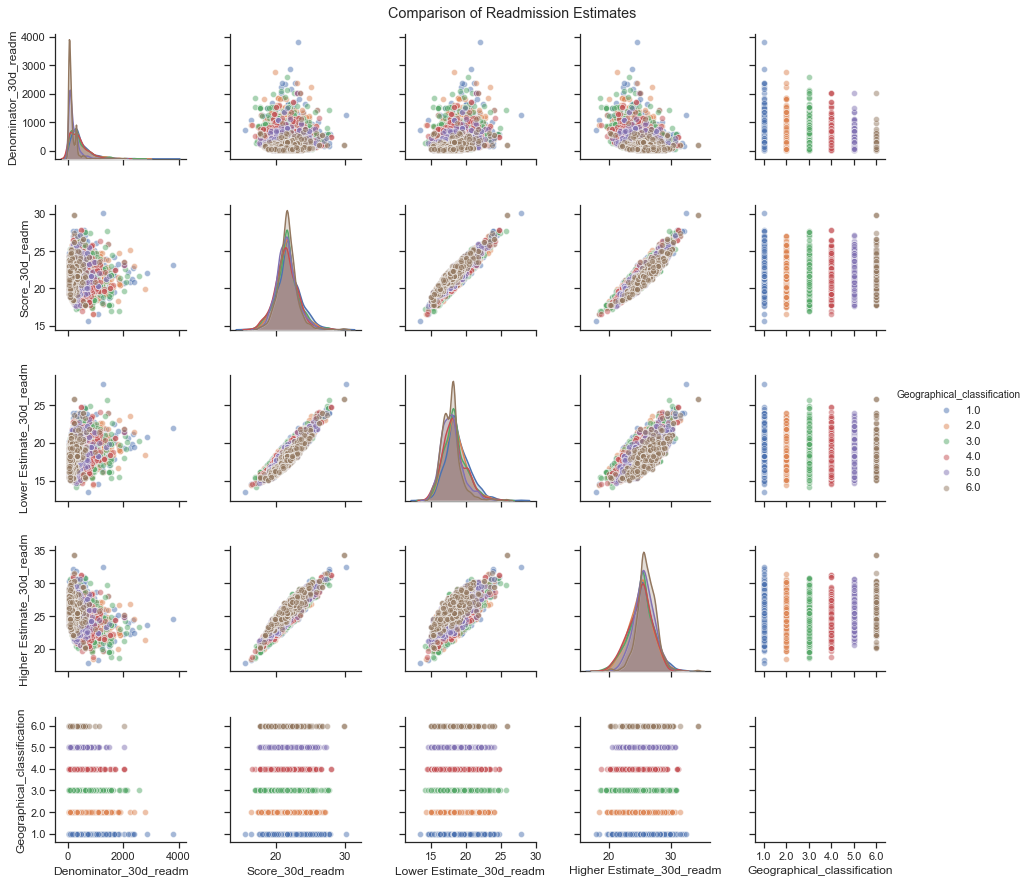

In [137]:
sns.set(style='ticks')

sns.pairplot(hosp_readmin_df[['Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm', 
                              'Higher Estimate_30d_readm', 'Geographical_classification']], 
            hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Readmission Estimates')
plt.show()

Excess Readmission Ratio: represents **Hospital's "predicted"** number of readmissions compared to **CMS "expected"** number of readmissions.

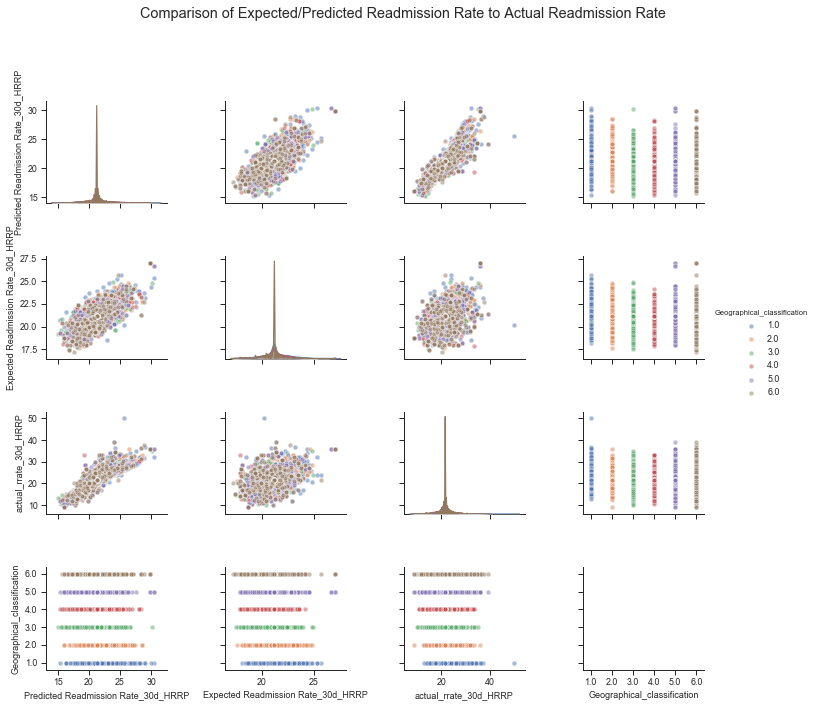

In [138]:
sns.set(style='ticks')
sns.set_context('paper', rc={'font.size':12,'axes.titlesize':9,'axes.labelsize':9}) 
sns.pairplot(hosp_readmin_df[['Predicted Readmission Rate_30d_HRRP', 'Expected Readmission Rate_30d_HRRP', 
                              'actual_rrate_30d_HRRP', 'Geographical_classification']], 
            hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=.85)
plt.xticks(rotation=45)
plt.suptitle('Comparison of Expected/Predicted Readmission Rate to Actual Readmission Rate')
  


plt.show()

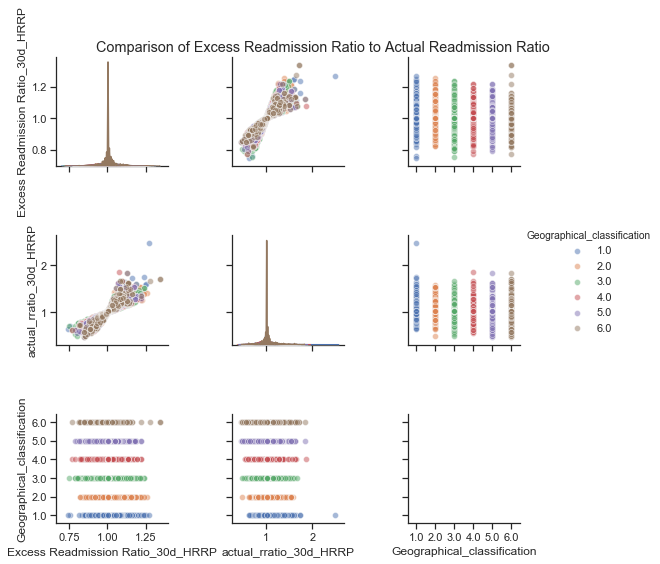

In [139]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['Excess Readmission Ratio_30d_HRRP', 'actual_rratio_30d_HRRP', 
                             'Geographical_classification']], 
            hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Excess Readmission Ratio to Actual Readmission Ratio')
#plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

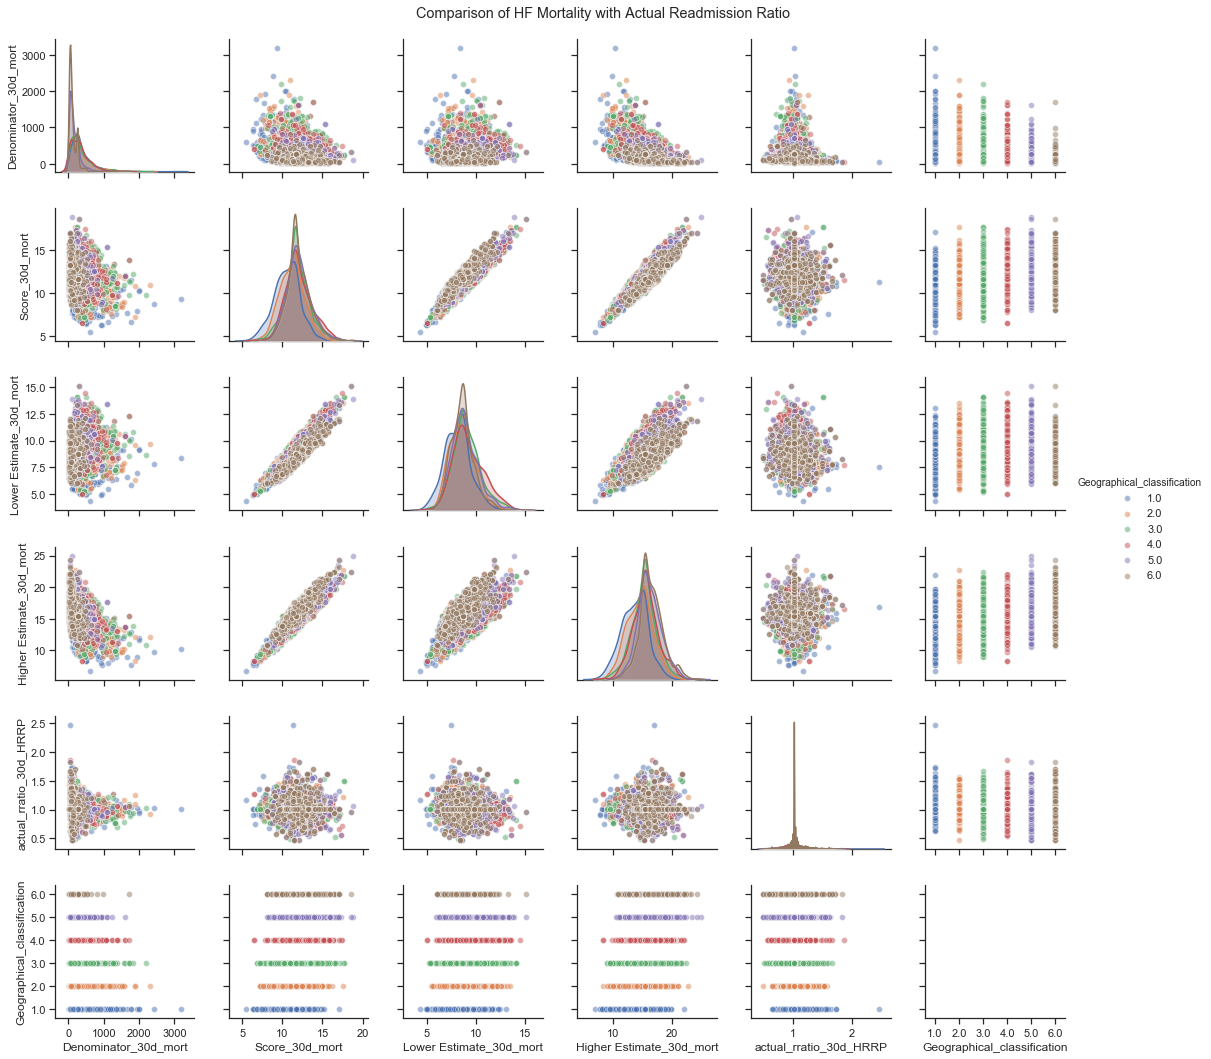

In [140]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['Denominator_30d_mort', 'Score_30d_mort', 
                              'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort', 
                              'actual_rratio_30d_HRRP','Geographical_classification']], 
            hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of HF Mortality with Actual Readmission Ratio')
plt.show()

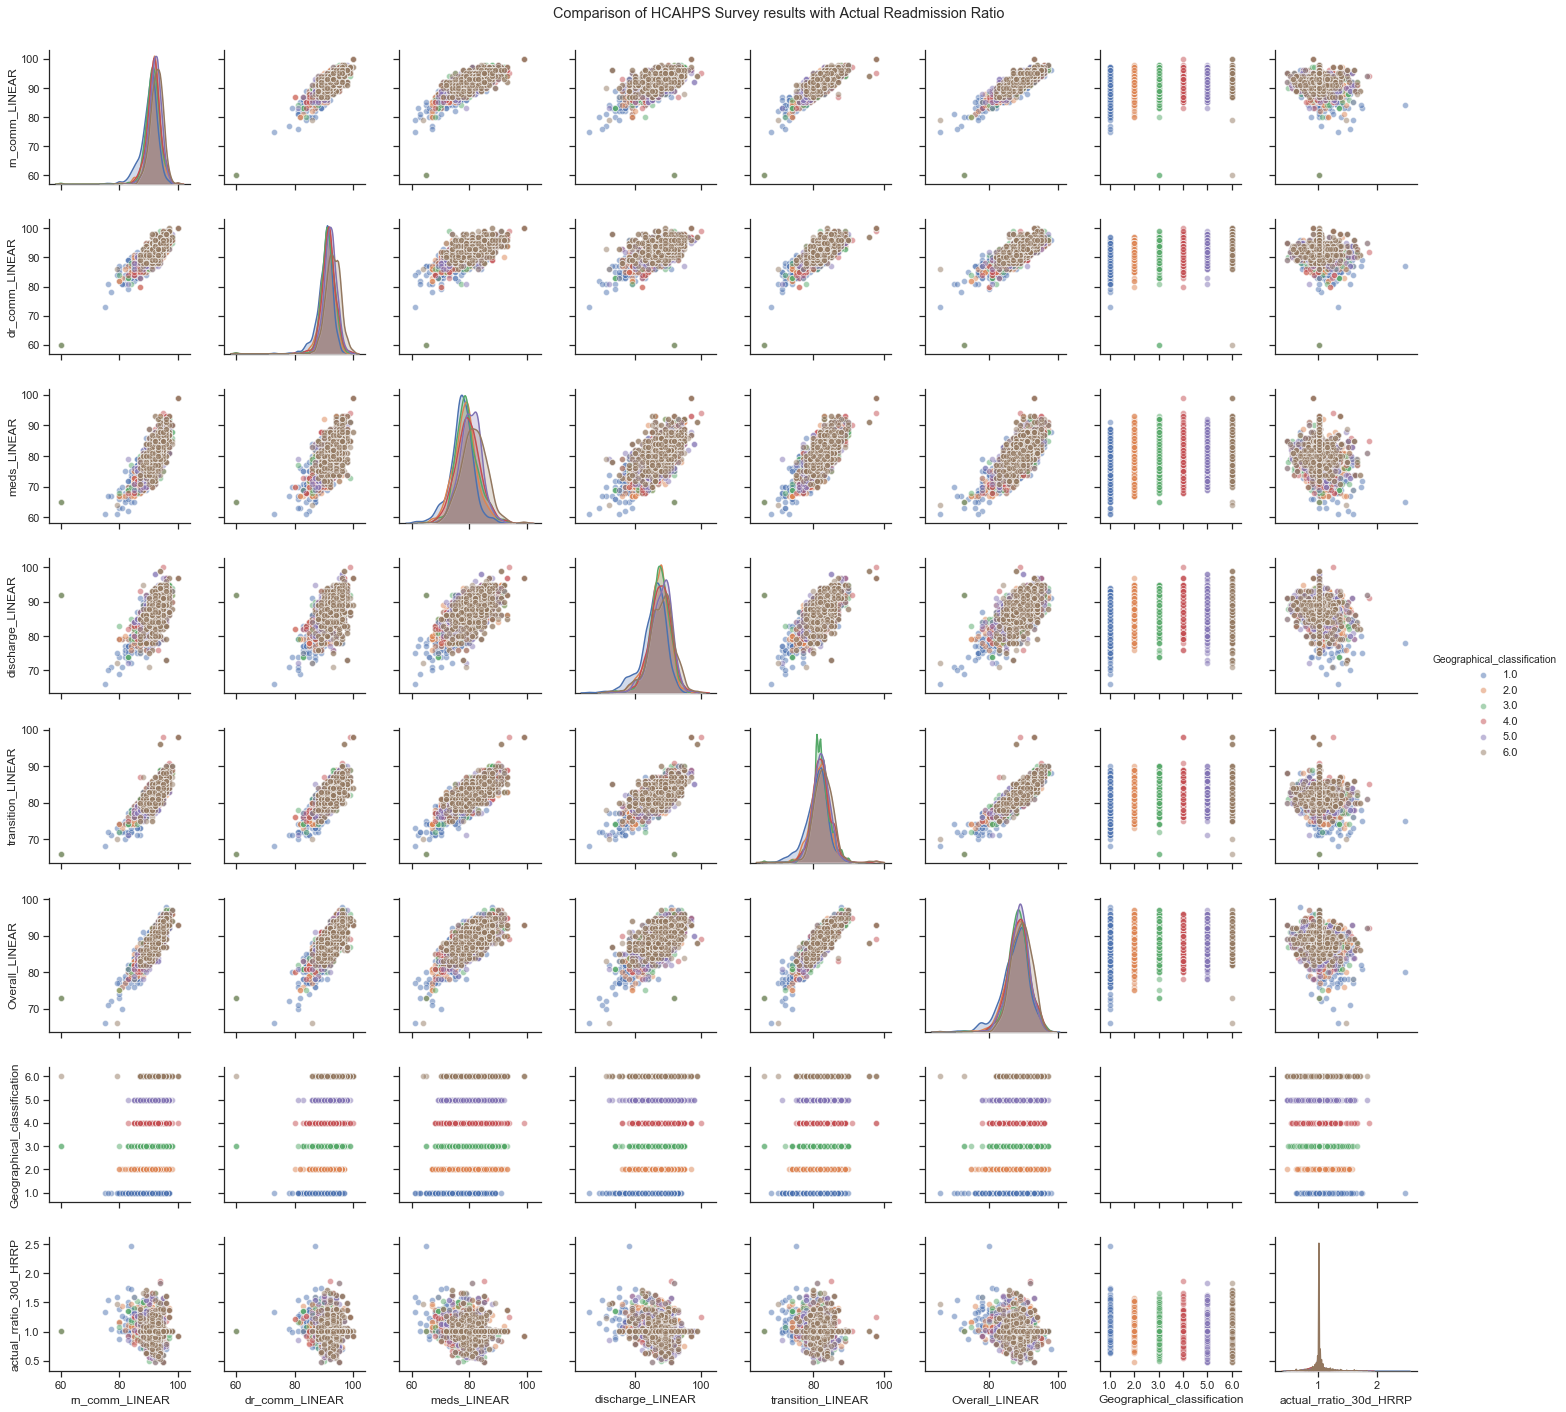

In [141]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['rn_comm_LINEAR', 'dr_comm_LINEAR', 
                     'meds_LINEAR', 'discharge_LINEAR',  
                     'transition_LINEAR', 'Overall_LINEAR',
                     'Geographical_classification','actual_rratio_30d_HRRP']], 
            hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of HCAHPS Survey results with Actual Readmission Ratio')
plt.show()

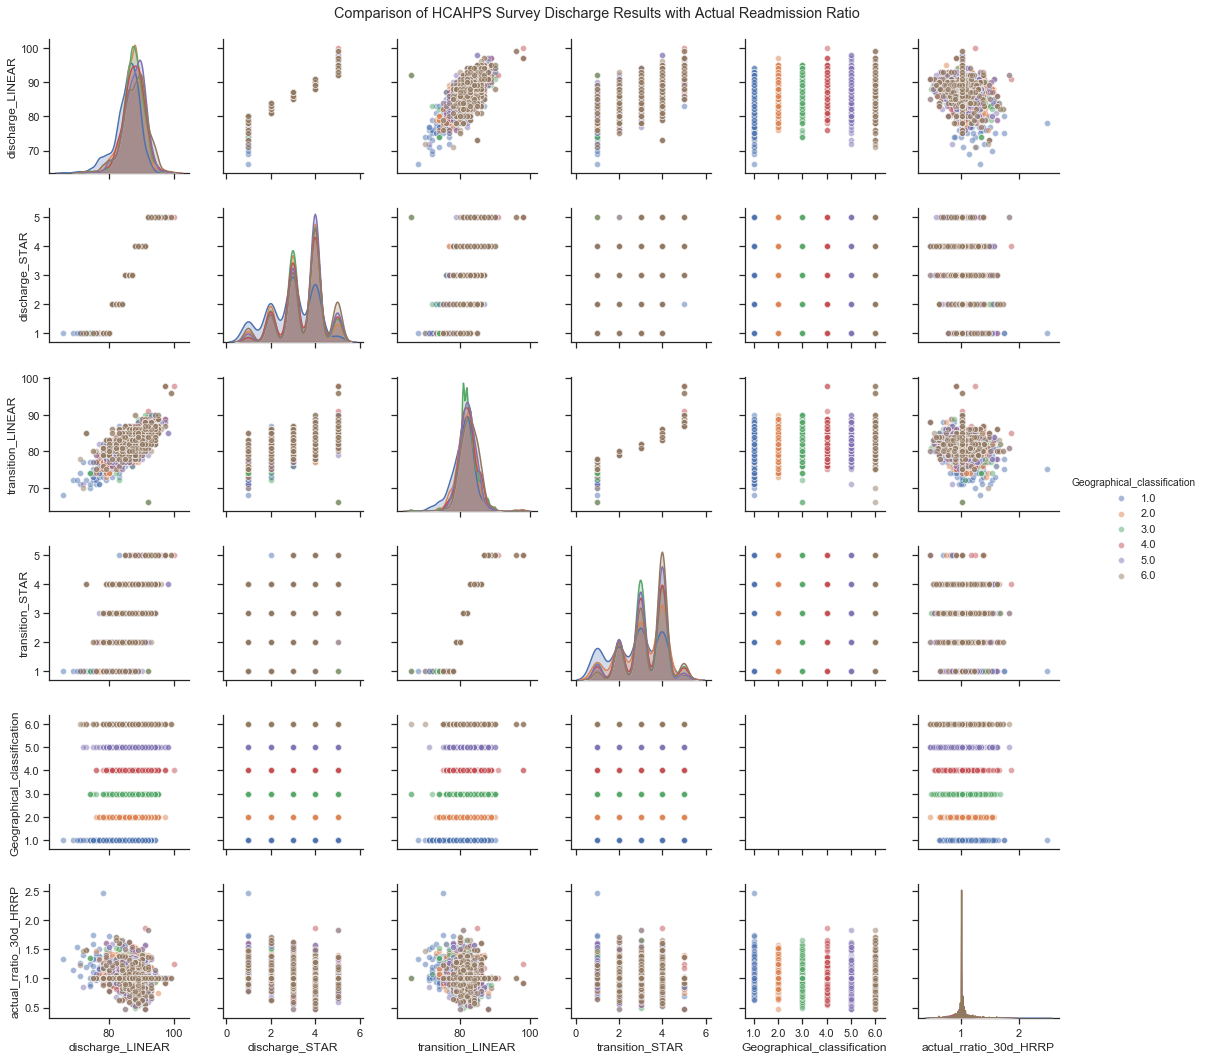

In [142]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['discharge_LINEAR', 'discharge_STAR',
                              'transition_LINEAR', 'transition_STAR', 
                              'Geographical_classification','actual_rratio_30d_HRRP']], 
            hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of HCAHPS Survey Discharge Results with Actual Readmission Ratio')
plt.show()

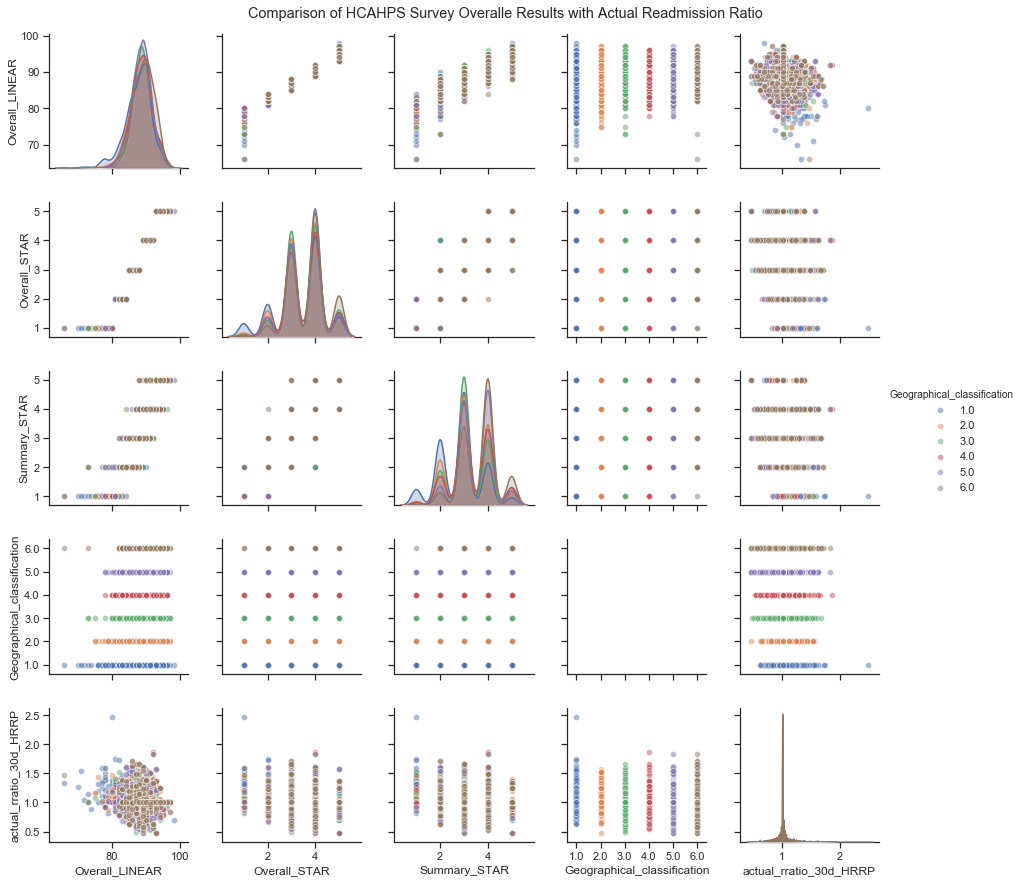

In [143]:
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['Overall_LINEAR', 'Overall_STAR', 'Summary_STAR', 
                              'Geographical_classification','actual_rratio_30d_HRRP']], 
            hue= 'Geographical_classification',
            plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of HCAHPS Survey Overalle Results with Actual Readmission Ratio')
plt.show()

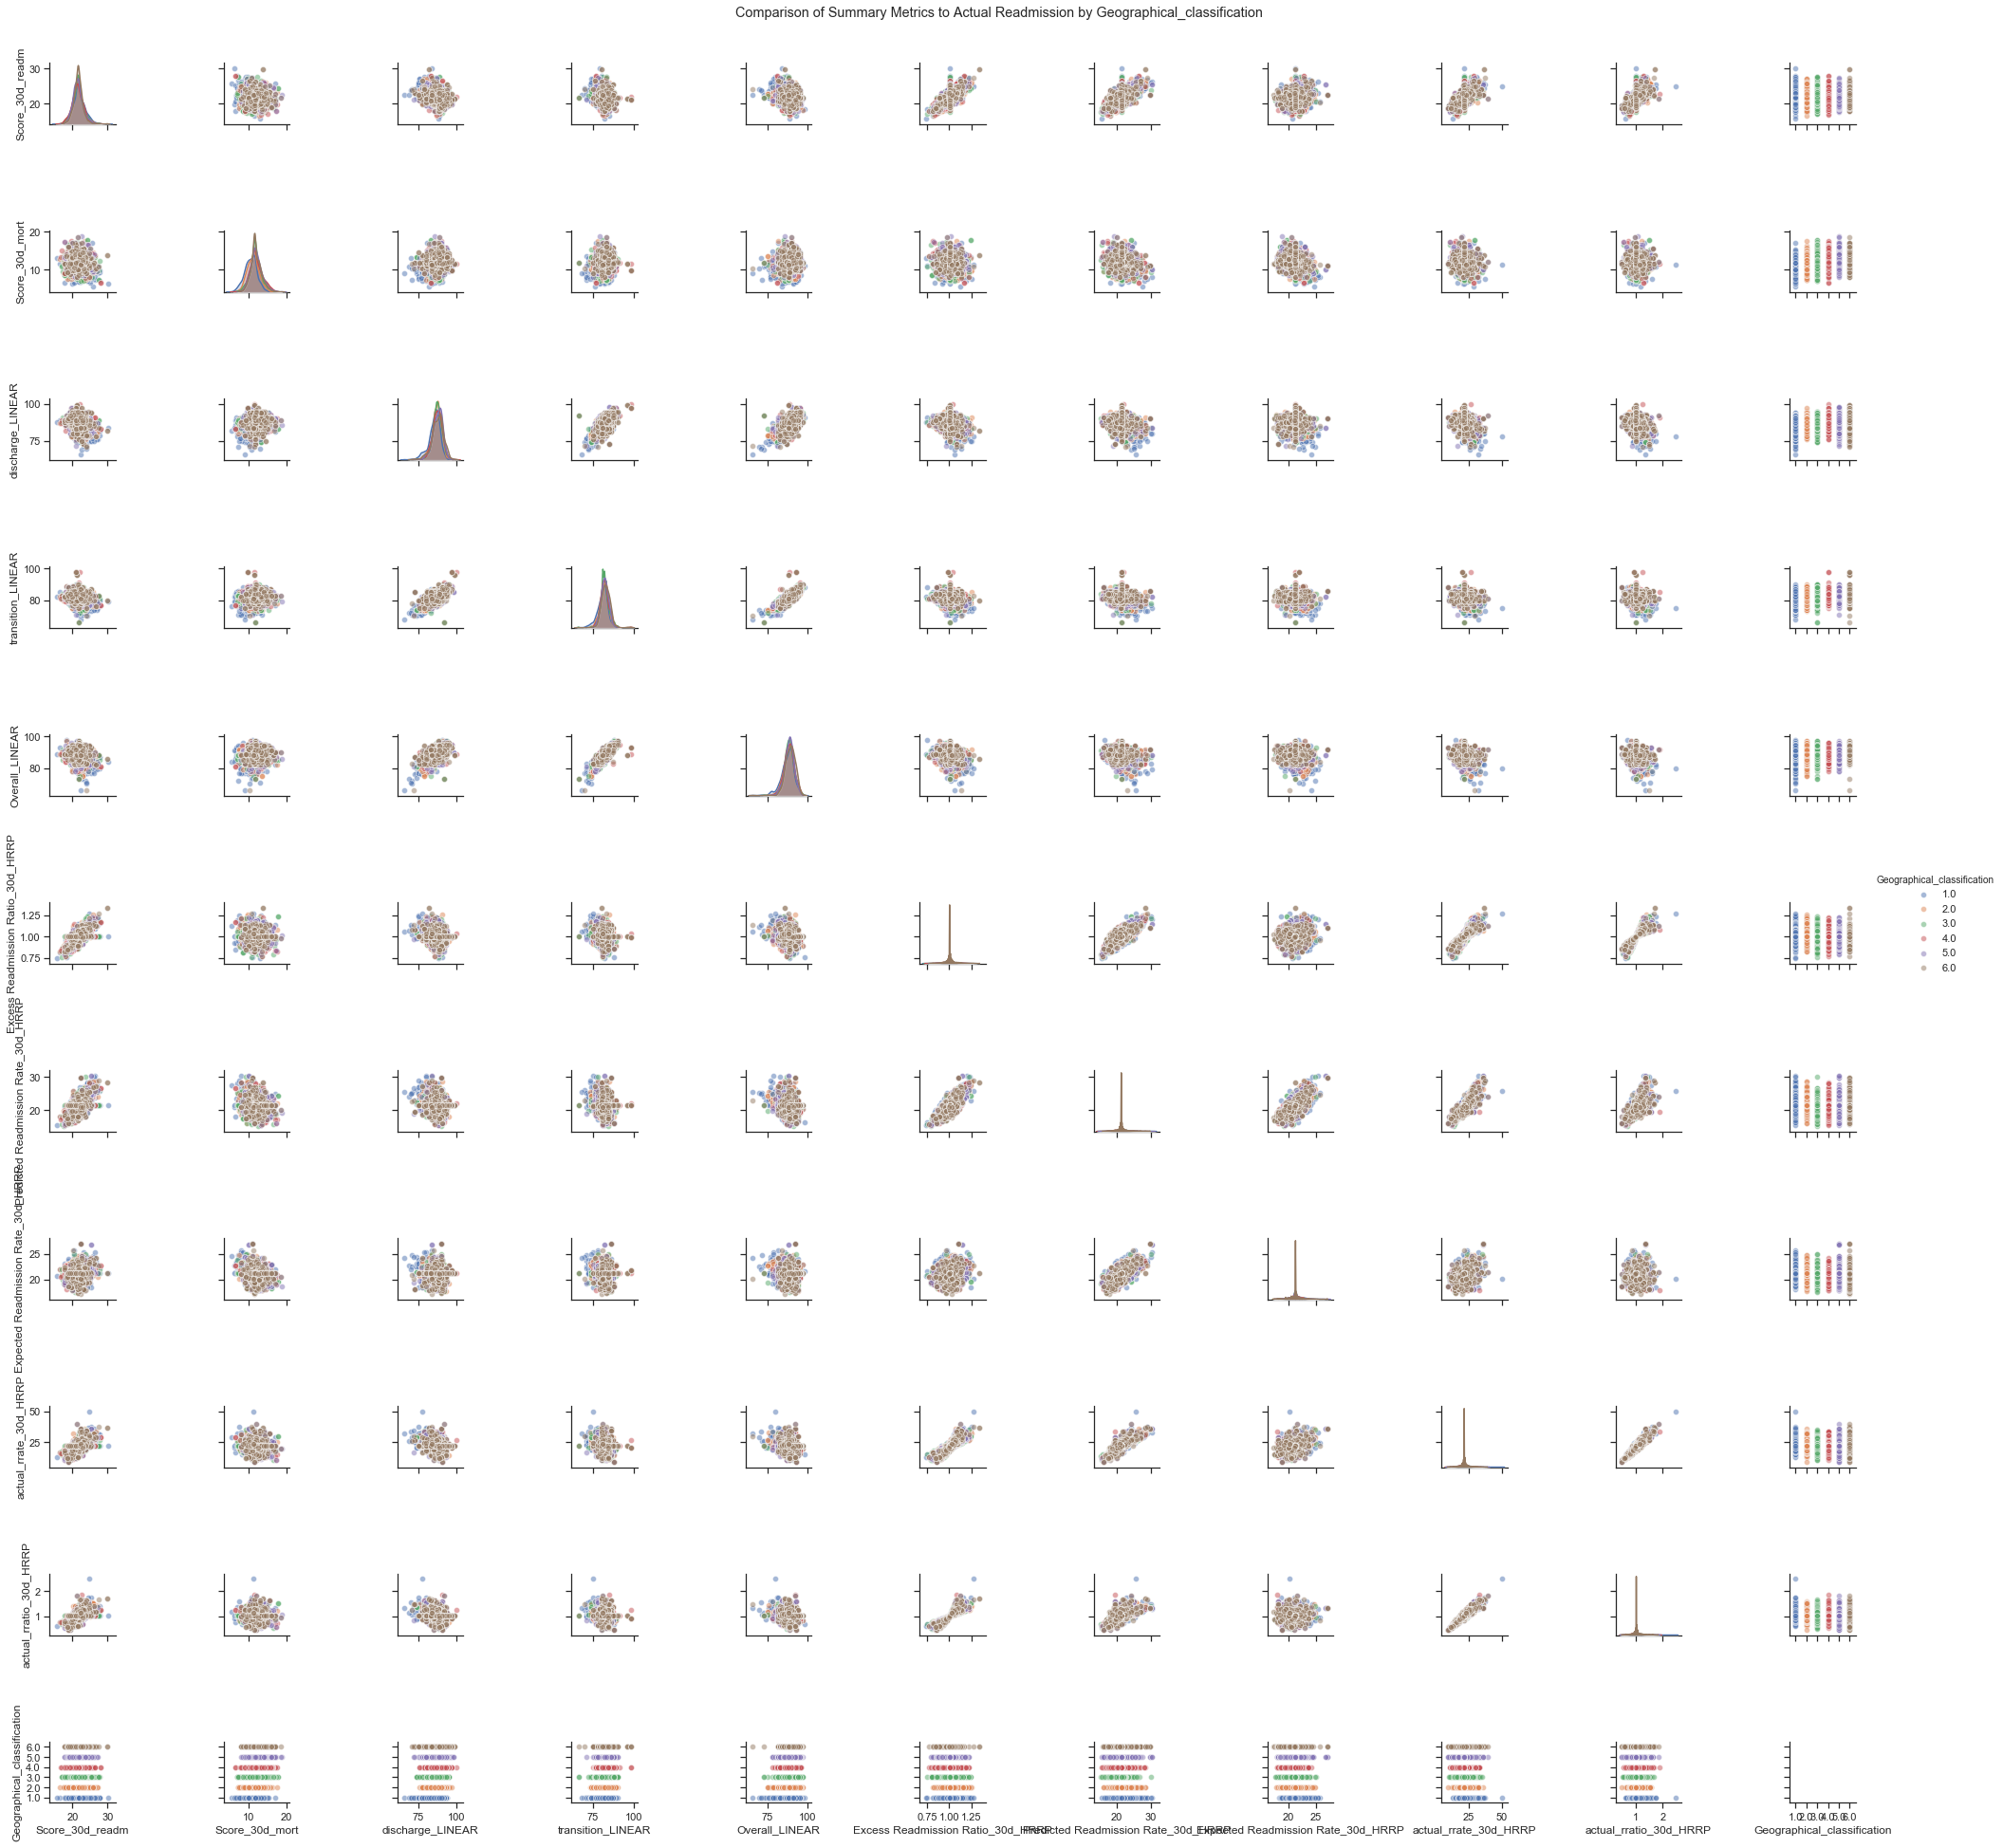

In [144]:
#pairwise of all contiuous measures
sns.set(style="ticks")

sns.pairplot(hosp_readmin_df[['Score_30d_readm', 'Score_30d_mort', 'discharge_LINEAR',
                              'transition_LINEAR', 'Overall_LINEAR', 'Excess Readmission Ratio_30d_HRRP', 
                              'Predicted Readmission Rate_30d_HRRP', 'Expected Readmission Rate_30d_HRRP', 
                              'actual_rrate_30d_HRRP', 'actual_rratio_30d_HRRP', 
                               'Geographical_classification']],
             hue= 'Geographical_classification',
             plot_kws = {'alpha': 0.5})
plt.subplots_adjust(top=0.95)
plt.suptitle('Comparison of Summary Metrics to Actual Readmission by Geographical_classification')
plt.show()

#### categorical data

In [145]:
empty_values = (hosp_readmin_df[categorical_values] == 0).all()

In [146]:
empty_values

READM_30_HF                                                       False
comp_nat_30d_readm_No Different Than the National Rate            False
comp_nat_30d_readm_Not Available                                  False
comp_nat_30d_readm_Number of Cases Too Small                      False
comp_nat_30d_readm_Worse Than the National Rate                   False
READM_30_HF_HRRP                                                  False
MORT_30_HF                                                        False
nat_comp_30d_mort_No Different Than the National Rate             False
nat_comp_30d_mort_Not Available                                   False
nat_comp_30d_mort_Number of Cases Too Small                       False
nat_comp_30d_mort_Worse Than the National Rate                    False
Hospital Type_Childrens                                            True
Hospital Type_Critical Access Hospitals                           False
Hospital Type_Psychiatric                                       

#### drop
No value in columns, all zeros:
'Hospital Type_Childrens', 'Hospital Type_Psychiatric'

In [147]:
hosp_readmin_df = hosp_readmin_df.drop(['Hospital Type_Childrens', 'Hospital Type_Psychiatric'], axis=1)

In [148]:
categorical_columns = hosp_readmin_df[['READM_30_HF', 'comp_nat_30d_readm_No Different Than the National Rate', 
                      'comp_nat_30d_readm_Number of Cases Too Small', 
                      'comp_nat_30d_readm_Worse Than the National Rate', 'READM_30_HF_HRRP', 'MORT_30_HF', 
                      'nat_comp_30d_mort_No Different Than the National Rate',
                      'nat_comp_30d_mort_Number of Cases Too Small',
                      'nat_comp_30d_mort_Worse Than the National Rate',  
                      'Hospital Type_Critical Access Hospitals', 
                      'Hospital Ownership_Government - Hospital District or Authority',
                      'Hospital Ownership_Government - Local', 'Hospital Ownership_Government - State',
                      'Hospital Ownership_Physician', 'Hospital Ownership_Proprietary', 'Hospital Ownership_Tribal',
                      'Hospital Ownership_Voluntary non-profit - Church', 
                      'Hospital Ownership_Voluntary non-profit - Other', 
                      'Hospital Ownership_Voluntary non-profit - Private', 'Emergency Services_Yes', 
                      'Hospital overall rating_2', 'Hospital overall rating_3', 'Hospital overall rating_4', 
                      'Hospital overall rating_5', 'Hospital overall rating_Not Available', 
                      'Mortality national comparison_Below the national average', 
                      'Mortality national comparison_Not Available', 
                      'Mortality national comparison_Same as the national average',
                      'Safety of care national comparison_Below the national average', 
                      'Safety of care national comparison_Not Available',
                      'Safety of care national comparison_Same as the national average', 
                      'Readmission national comparison_Below the national average', 
                      'Readmission national comparison_Not Available', 
                      'Readmission national comparison_Same as the national average', 
                      'Patient experience national comparison_Below the national average', 
                      'Patient experience national comparison_Not Available', 
                      'Patient experience national comparison_Same as the national average',
                      'Effectiveness of care national comparison_Below the national average',
                      'Effectiveness of care national comparison_Not Available', 
                      'Effectiveness of care national comparison_Same as the national average', 
                      'Timeliness of care national comparison_Below the national average',
                      'Timeliness of care national comparison_Not Available', 
                      'Timeliness of care national comparison_Same as the national average',
                      'Efficient use of medical imaging national comparison_Below the national average',
                      'Efficient use of medical imaging national comparison_Not Available',
                      'Efficient use of medical imaging national comparison_Same as the national average',
                      'State_AL',  'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 
                      'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 
                      'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 
                      'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 
                      'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 
                      'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 
                      'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 
                      'State_WY', 'Large fringe metro', 'Medium metro', 'Small metro', 'Micropolitan', 
                                       'Noncore', 'actual_rratio_30d_HRRP']]

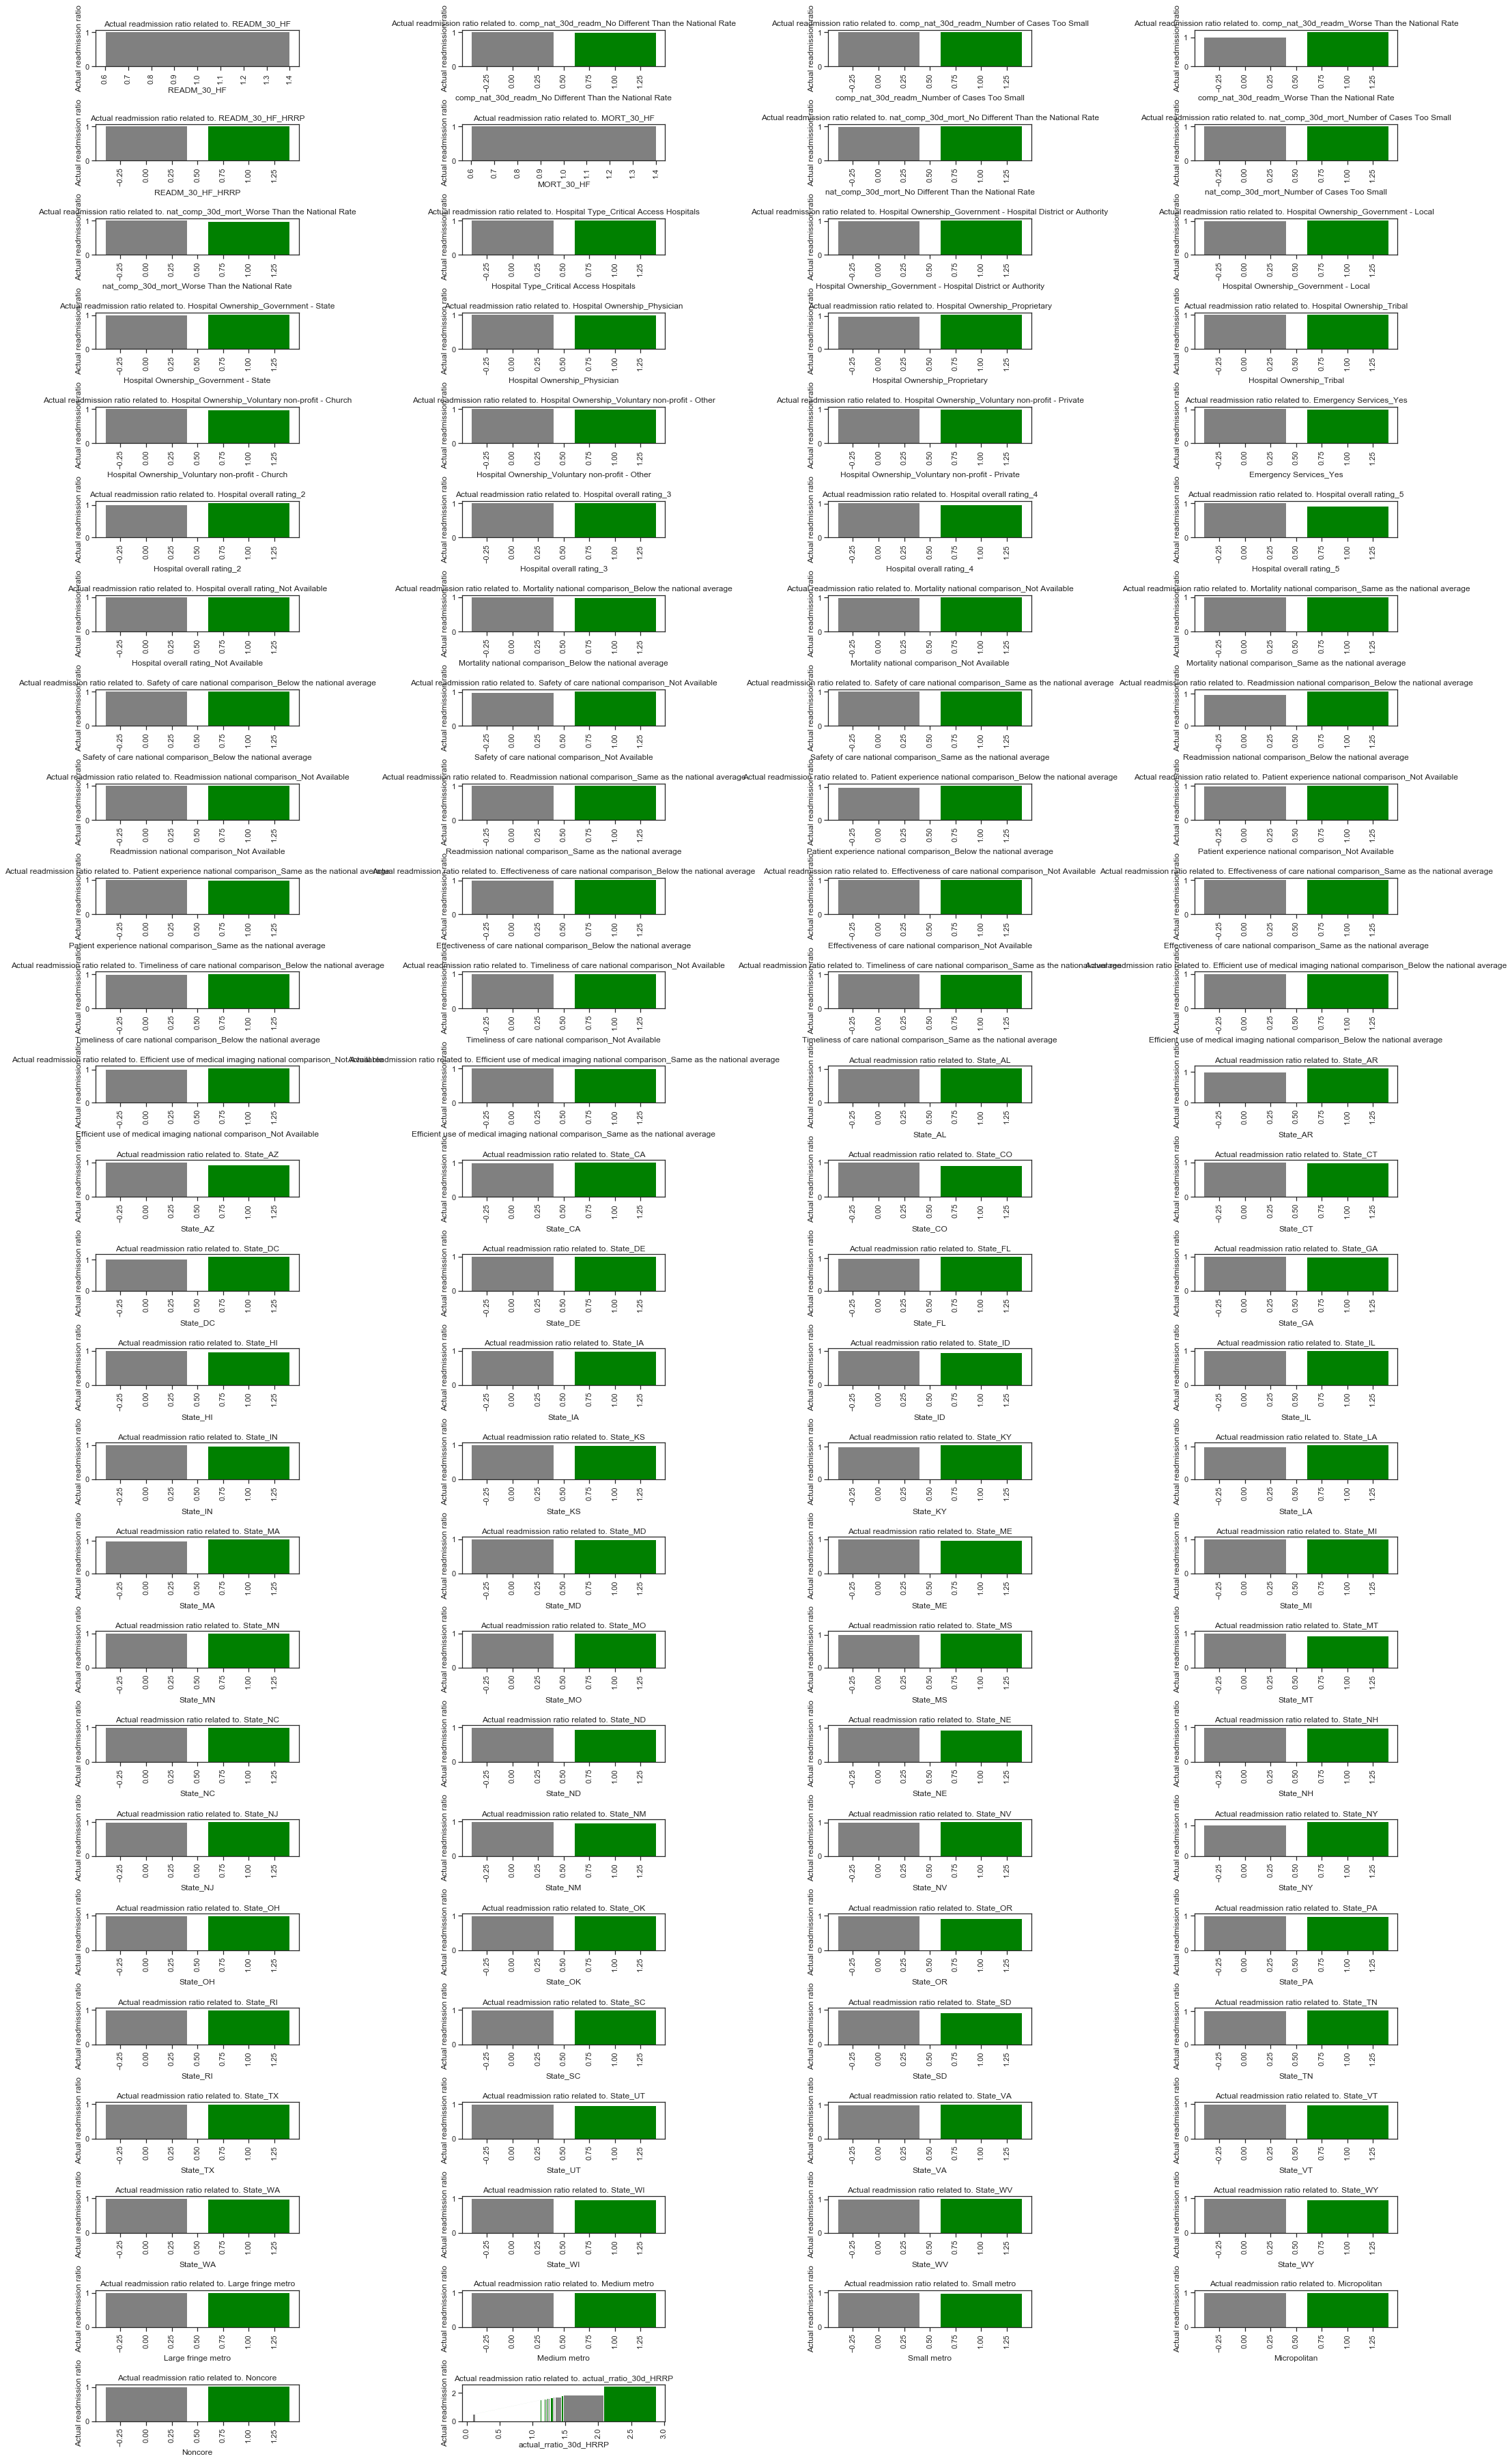

In [149]:
plt.figure(figsize=(30,50))

for index, column in enumerate(categorical_columns):
    plt.subplot(26,4,index+1)
    plt.bar(categorical_columns.groupby(column)['actual_rratio_30d_HRRP'].mean().index, categorical_columns.groupby(column)['actual_rratio_30d_HRRP'].mean(),
           color=('grey','green'))
    plt.title('Actual readmission ratio related to. {}'.format(column))
    plt.ylabel('Actual readmission ratio')
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [150]:
categorical1_columns = hosp_readmin_df[['READM_30_HF', 'comp_nat_30d_readm_No Different Than the National Rate', 
                      'comp_nat_30d_readm_Number of Cases Too Small', 
                      'comp_nat_30d_readm_Worse Than the National Rate', 'READM_30_HF_HRRP', 'MORT_30_HF', 
                      'nat_comp_30d_mort_No Different Than the National Rate',
                      'nat_comp_30d_mort_Number of Cases Too Small',
                      'nat_comp_30d_mort_Worse Than the National Rate', 'actual_rratio_30d_HRRP']]

In [151]:
categorical2_columns = hosp_readmin_df[['Hospital Type_Critical Access Hospitals', 
                      'Hospital Ownership_Government - Hospital District or Authority',
                      'Hospital Ownership_Government - Local', 'Hospital Ownership_Government - State',
                      'Hospital Ownership_Physician', 'Hospital Ownership_Proprietary', 'Hospital Ownership_Tribal',
                      'Hospital Ownership_Voluntary non-profit - Church', 
                      'Hospital Ownership_Voluntary non-profit - Other', 
                      'Hospital Ownership_Voluntary non-profit - Private', 'Emergency Services_Yes', 
                      'Hospital overall rating_2', 'Hospital overall rating_3', 'Hospital overall rating_4', 
                      'Hospital overall rating_5', 'Hospital overall rating_Not Available', 
                      'Mortality national comparison_Below the national average', 
                      'Mortality national comparison_Not Available', 
                      'Mortality national comparison_Same as the national average',
                      'Safety of care national comparison_Below the national average', 
                      'Safety of care national comparison_Not Available',
                      'Safety of care national comparison_Same as the national average', 
                      'Readmission national comparison_Below the national average', 
                      'Readmission national comparison_Not Available', 
                      'Readmission national comparison_Same as the national average', 
                      'Patient experience national comparison_Below the national average', 
                      'Patient experience national comparison_Not Available', 
                      'Patient experience national comparison_Same as the national average',
                      'Effectiveness of care national comparison_Below the national average',
                      'Effectiveness of care national comparison_Not Available', 
                      'Effectiveness of care national comparison_Same as the national average', 
                      'Timeliness of care national comparison_Below the national average',
                      'Timeliness of care national comparison_Not Available', 
                      'Timeliness of care national comparison_Same as the national average',
                      'Efficient use of medical imaging national comparison_Below the national average',
                      'Efficient use of medical imaging national comparison_Not Available',
                      'Efficient use of medical imaging national comparison_Same as the national average',
                      'actual_rratio_30d_HRRP']]

In [152]:
categorical3_columns = hosp_readmin_df[['State_AL',  'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 
                                        'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 
                                        'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 
                                        'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 
                                        'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 
                                        'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 
                                        'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
                                        'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 
                                        'State_WV', 'State_WY', 'Large fringe metro', 'Medium metro', 'Small metro', 
                                        'Micropolitan', 'Noncore', 'actual_rratio_30d_HRRP']]

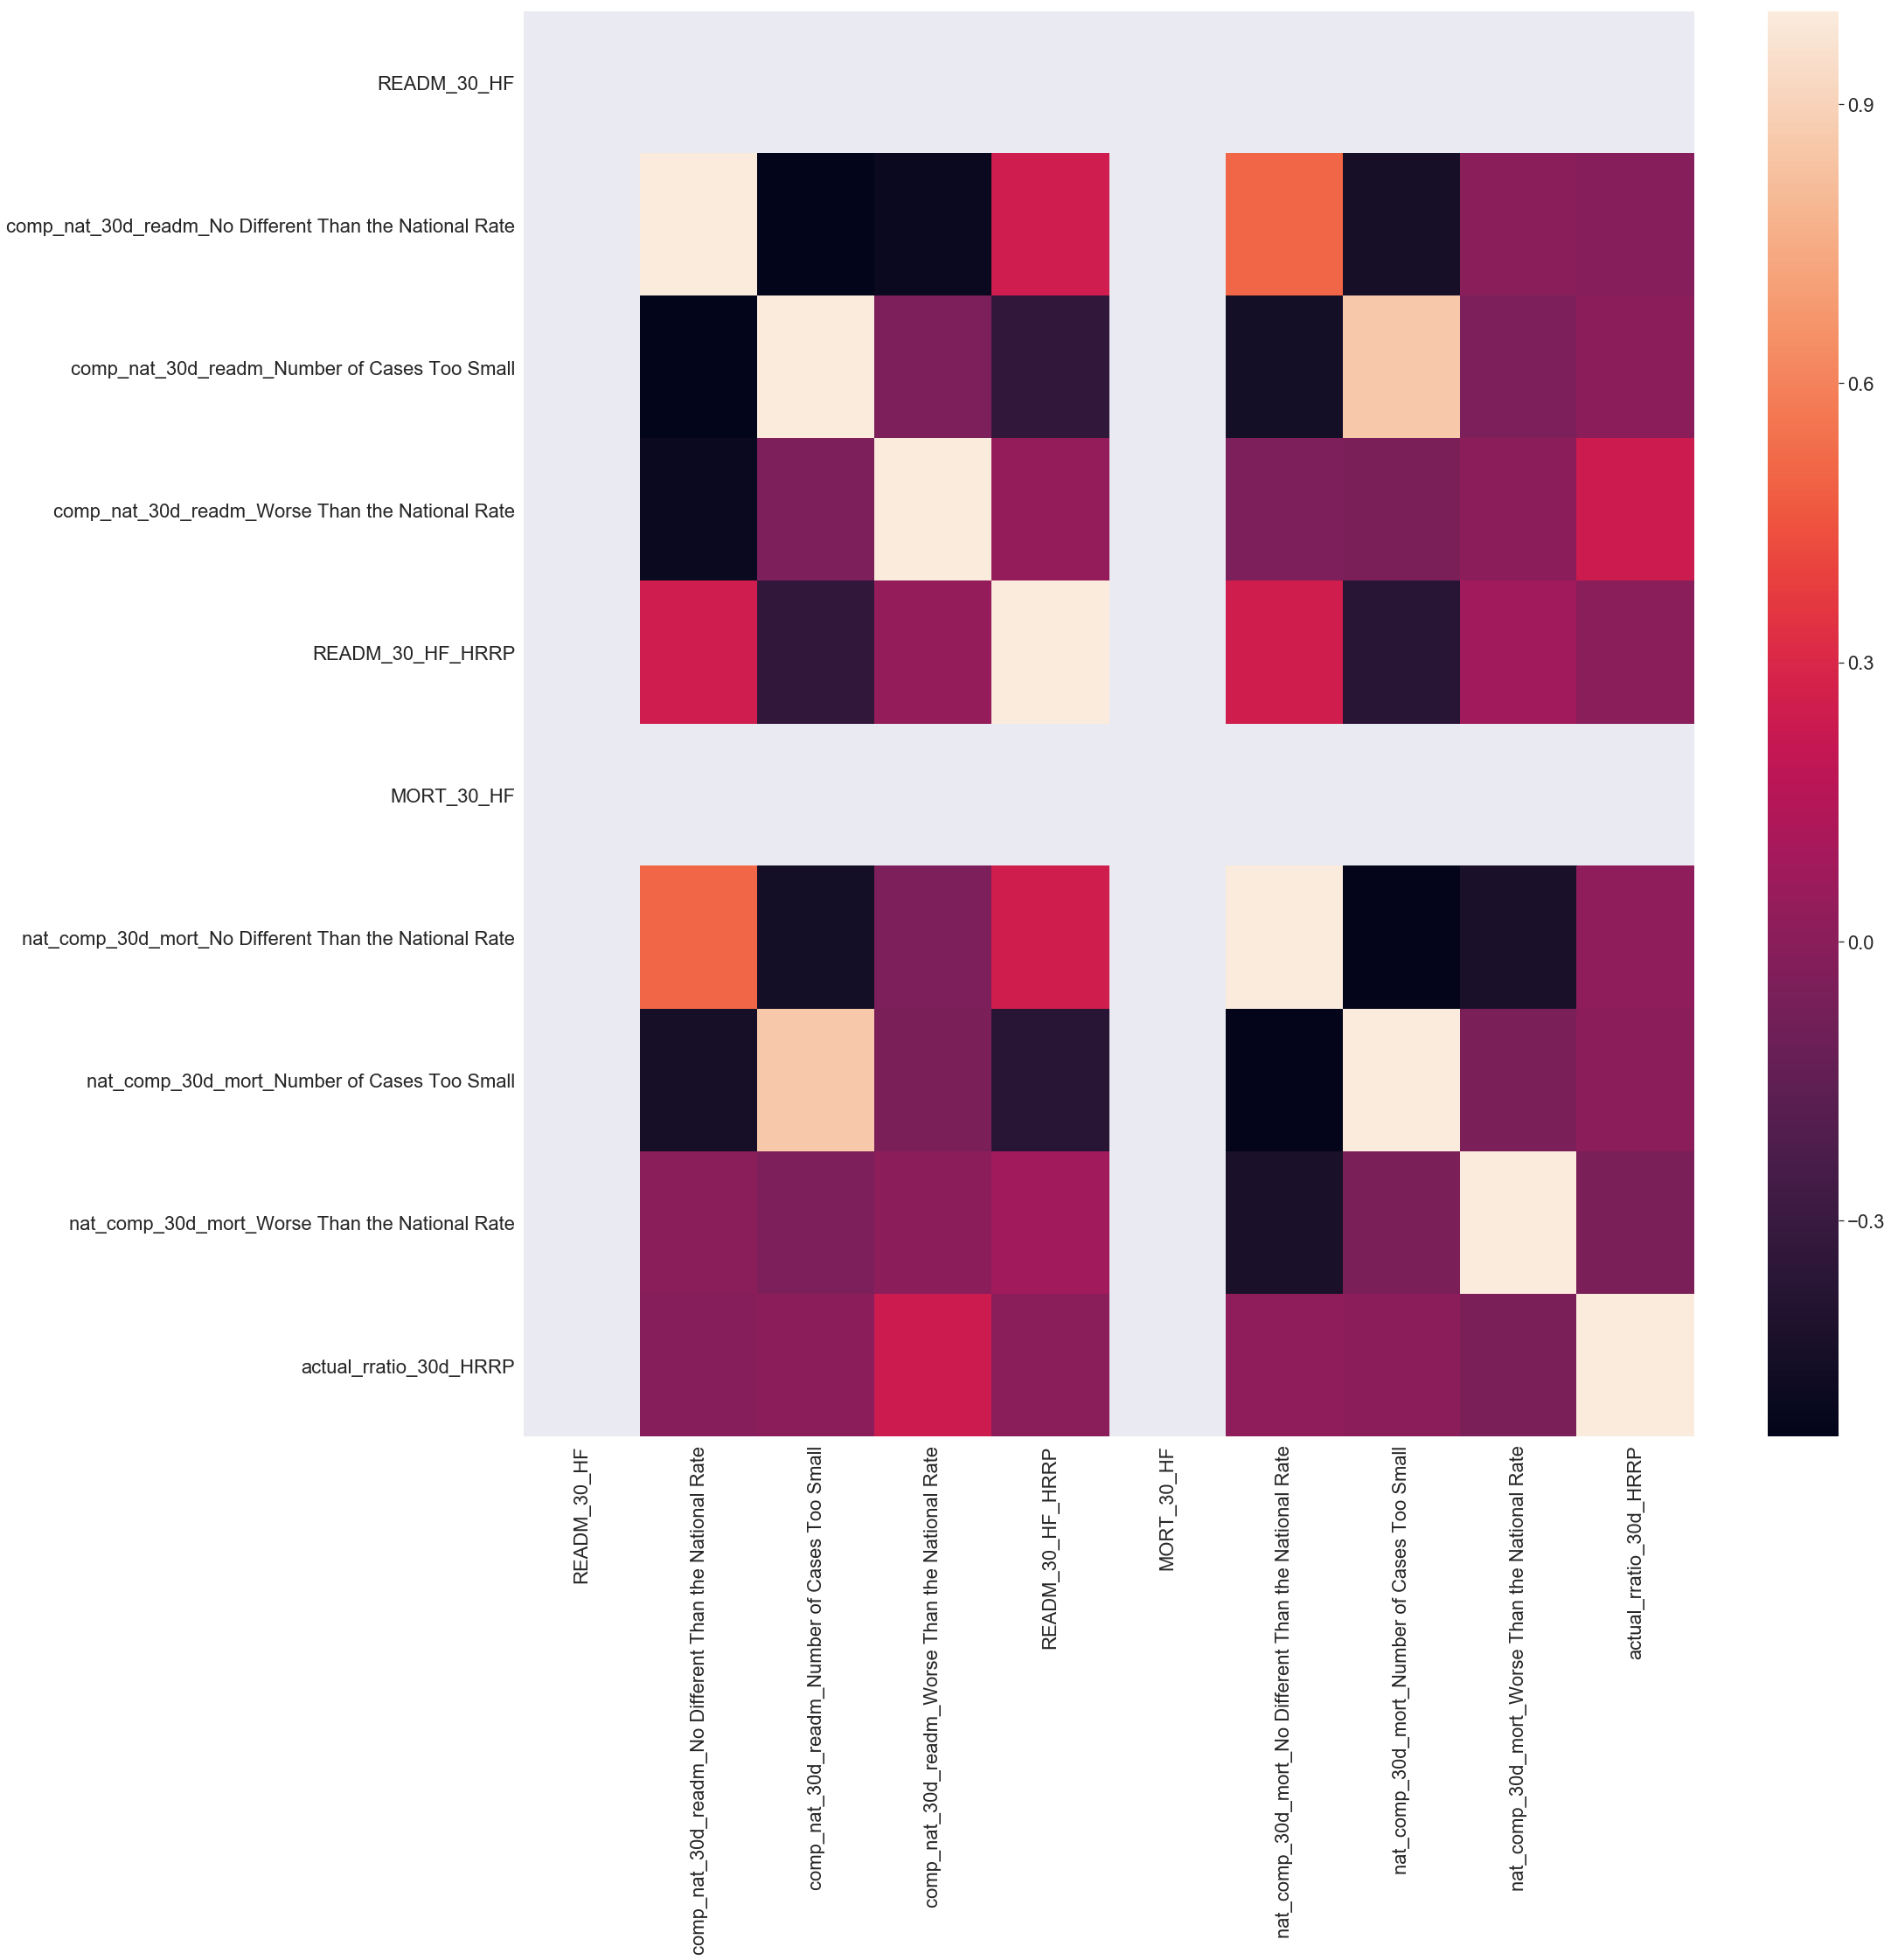

In [153]:
#correlation matrix
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.heatmap(categorical1_columns.corr())

In [154]:
categorical1_columns.corr()

READM_30_HF  \
READM_30_HF                                                 NaN   
comp_nat_30d_readm_No Different Than the Nation...          NaN   
comp_nat_30d_readm_Number of Cases Too Small                NaN   
comp_nat_30d_readm_Worse Than the National Rate             NaN   
READM_30_HF_HRRP                                            NaN   
MORT_30_HF                                                  NaN   
nat_comp_30d_mort_No Different Than the Nationa...          NaN   
nat_comp_30d_mort_Number of Cases Too Small                 NaN   
nat_comp_30d_mort_Worse Than the National Rate              NaN   
actual_rratio_30d_HRRP                                      NaN   

                                                    comp_nat_30d_readm_No Different Than the National Rate  \
READM_30_HF                                                                                       NaN        
comp_nat_30d_readm_No Different Than the Nation...                                           1.000000        
comp_nat_30d_readm_Number of Cases Too Small                                                -0.531889        
comp_nat_30d_readm_Worse Than the National Rate                                             -0.491521        
READM_30_HF_HRRP                                                                             0.246782        
MORT_30_HF                                                                                        NaN        
nat_comp_30d_mort_No Different Than the Nationa...                                           0.505954        
nat_comp_30d_mort_Number of Cases Too Small                                                 -0.441628        
nat_comp_30d_mort_Worse Than the National Rate                                              -0.004729        
actual_rratio_30d_HRRP                                                                      -0.016730        

                                                    comp_nat_30d_readm_Number of Cases Too Small  \
READM_30_HF                                                                                  NaN   
comp_nat_30d_readm_No Different Than the Nation...                                     -0.531889   
comp_nat_30d_readm_Number of Cases Too Small                                            1.000000   
comp_nat_30d_readm_Worse Than the National Rate                                        -0.043795   
READM_30_HF_HRRP                                                                       -0.331033   
MORT_30_HF                                                                                   NaN   
nat_comp_30d_mort_No Different Than the Nationa...                                     -0.450946   
nat_comp_30d_mort_Number of Cases Too Small                                             0.859079   
nat_comp_30d_mort_Worse Than the National Rate                                         -0.043210   
actual_rratio_30d_HRRP                                                                  0.003336   

                                                    comp_nat_30d_readm_Worse Than the National Rate  \
READM_30_HF                                                                                     NaN   
comp_nat_30d_readm_No Different Than the Nation...                                        -0.491521   
comp_nat_30d_readm_Number of Cases Too Small                                              -0.043795   
comp_nat_30d_readm_Worse Than the National Rate                                            1.000000   
READM_30_HF_HRRP                                                                           0.041815   
MORT_30_HF                                                                                      NaN   
nat_comp_30d_mort_No Different Than the Nationa...                                        -0.046158   
nat_comp_30d_mort_Number of Cases Too Small                                               -0.048612   
nat_comp_30d_mort_Worse Than the National Rate                             

In [155]:
np.abs(categorical1_columns.iloc[:,1:].corr().loc[:,'actual_rratio_30d_HRRP']).sort_values(ascending=False)

actual_rratio_30d_HRRP                                    1.000000
comp_nat_30d_readm_Worse Than the National Rate           0.237555
nat_comp_30d_mort_Worse Than the National Rate            0.052535
nat_comp_30d_mort_No Different Than the National Rate     0.019728
comp_nat_30d_readm_No Different Than the National Rate    0.016730
comp_nat_30d_readm_Number of Cases Too Small              0.003336
nat_comp_30d_mort_Number of Cases Too Small               0.003230
READM_30_HF_HRRP                                          0.002903
MORT_30_HF                                                     NaN
Name: actual_rratio_30d_HRRP, dtype: float64

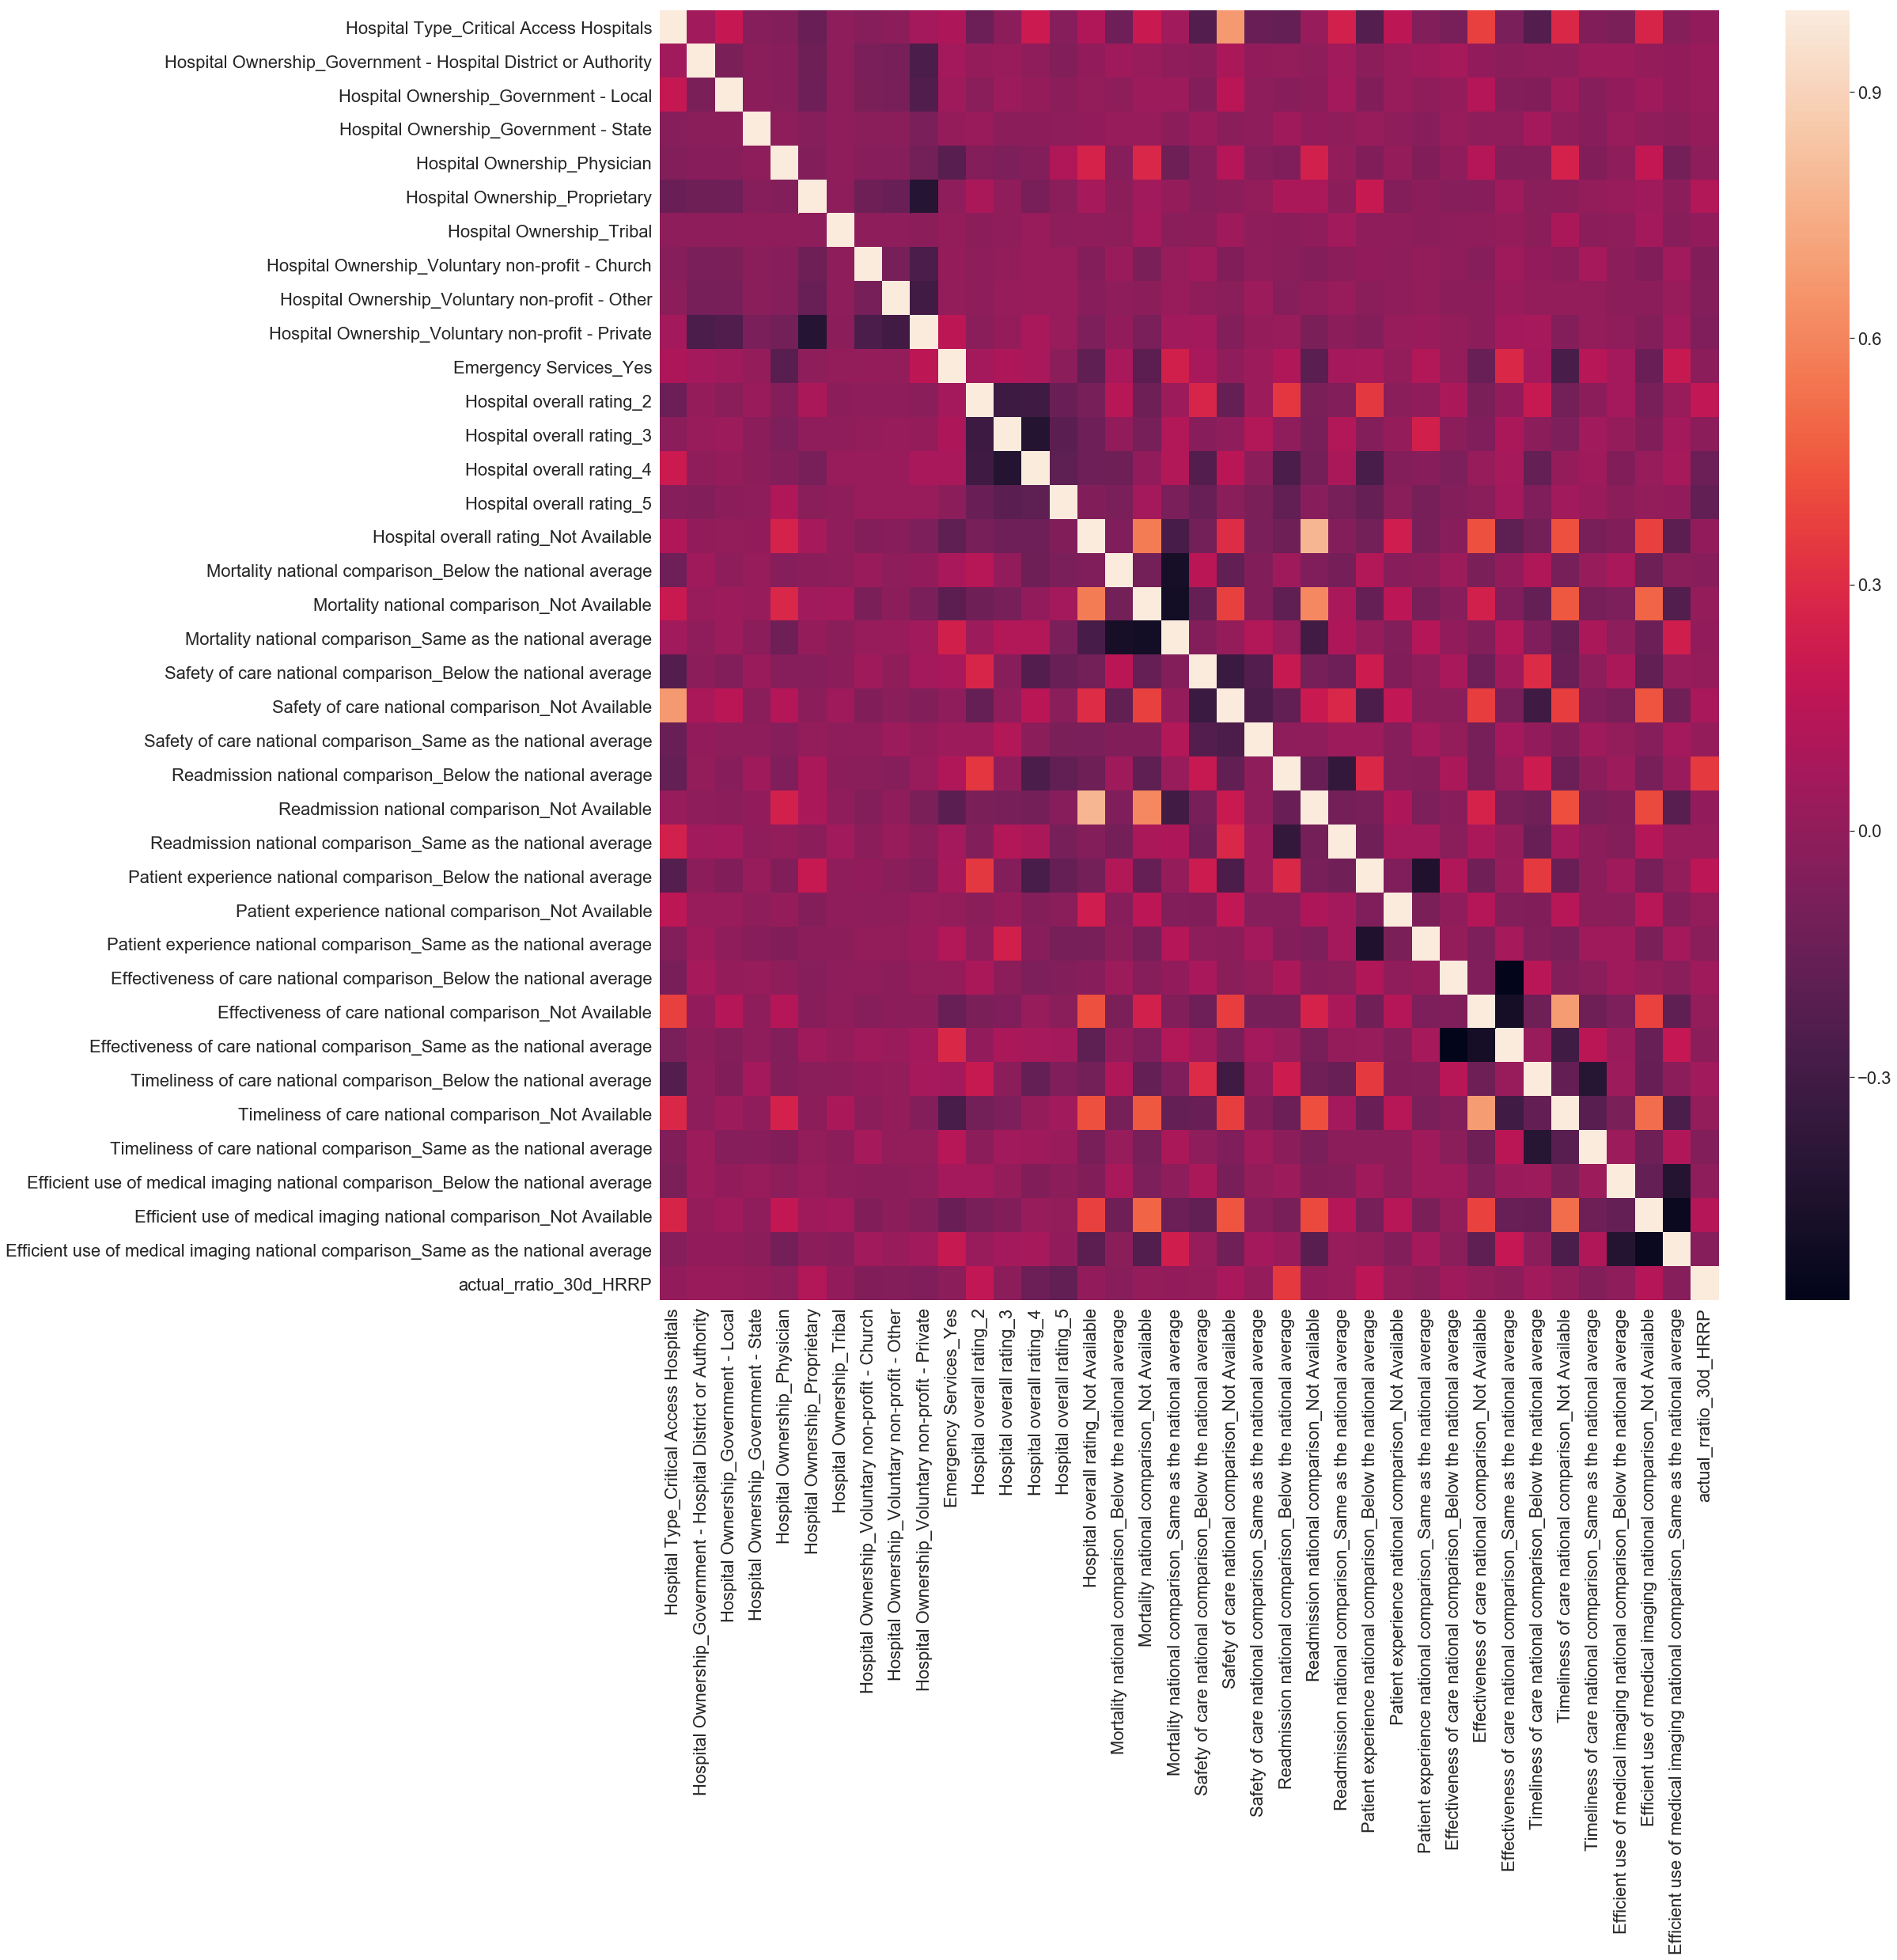

In [156]:
#correlation matrix
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.heatmap(categorical2_columns.corr())

In [157]:
categorical2_columns.corr()

Hospital Type_Critical Access Hospitals  \
Hospital Type_Critical Access Hospitals                                            1.000000   
Hospital Ownership_Government - Hospital Distri...                                 0.056952   
Hospital Ownership_Government - Local                                              0.193493   
Hospital Ownership_Government - State                                             -0.040377   
Hospital Ownership_Physician                                                      -0.051571   
Hospital Ownership_Proprietary                                                    -0.147766   
Hospital Ownership_Tribal                                                         -0.011989   
Hospital Ownership_Voluntary non-profit - Church                                  -0.039299   
Hospital Ownership_Voluntary non-profit - Other                                   -0.017674   
Hospital Ownership_Voluntary non-profit - Private                                  0.062705   
Emergency Services_Yes                                                             0.102871   
Hospital overall rating_2                                                         -0.142287   
Hospital overall rating_3                                                         -0.019840   
Hospital overall rating_4                                                          0.208006   
Hospital overall rating_5                                                         -0.043251   
Hospital overall rating_Not Available                                              0.111066   
Mortality national comparison_Below the nationa...                                -0.129845   
Mortality national comparison_Not Available                                        0.205746   
Mortality national comparison_Same as the natio...                                 0.055031   
Safety of care national comparison_Below the na...                                -0.231171   
Safety of care national comparison_Not Available                                   0.673469   
Safety of care national comparison_Same as the ...                                -0.145269   
Readmission national comparison_Below the natio...                                -0.163903   
Readmission national comparison_Not Available                                      0.017946   
Readmission national comparison_Same as the nat...                                 0.247357   
Patient experience national comparison_Below th...                                -0.224420   
Patient experience national comparison_Not Avai...                                 0.164522   
Patient experience national comparison_Same as ...                                -0.055009   
Effectiveness of care national comparison_Below...                                -0.091861   
Effectiveness of care national comparison_Not A...                                 0.373450   
Effectiveness of care national comparison_Same ...                                -0.082670   
Timeliness of care national comparison_Below th...                                -0.231552   
Timeliness of care national comparison_Not Avai...                                 0.287442   
Timeliness of care national comparison_Same as ...                                -0.061119   
Efficient use of medical imaging national compa...                                -0.080804   
Efficient use of medical imaging national compa...                                 0.265410   
Efficient use of medical imaging national compa...                                -0.039475   
actual_rratio_30d_HRRP                                                             0.001889   

                                                    Hospital Ownership_Government - Hospital District or Authority  \
Hospital Type_Critical Access Hospitals                                                      0.056952                
Hospital Ownership_Government - Hospital Distri...                                           1.000000         

In [158]:
np.abs(categorical2_columns.iloc[:,1:].corr().loc[:,'actual_rratio_30d_HRRP']).sort_values(ascending=False)

actual_rratio_30d_HRRP                                                               1.000000
Readmission national comparison_Below the national average                           0.349458
Hospital overall rating_2                                                            0.174837
Hospital overall rating_5                                                            0.174230
Patient experience national comparison_Below the national average                    0.152944
Hospital overall rating_4                                                            0.138635
Efficient use of medical imaging national comparison_Not Available                   0.122342
Hospital Ownership_Proprietary                                                       0.120570
Safety of care national comparison_Not Available                                     0.083761
Hospital Ownership_Voluntary non-profit - Private                                    0.064889
Hospital Ownership_Voluntary non-profit - Church            

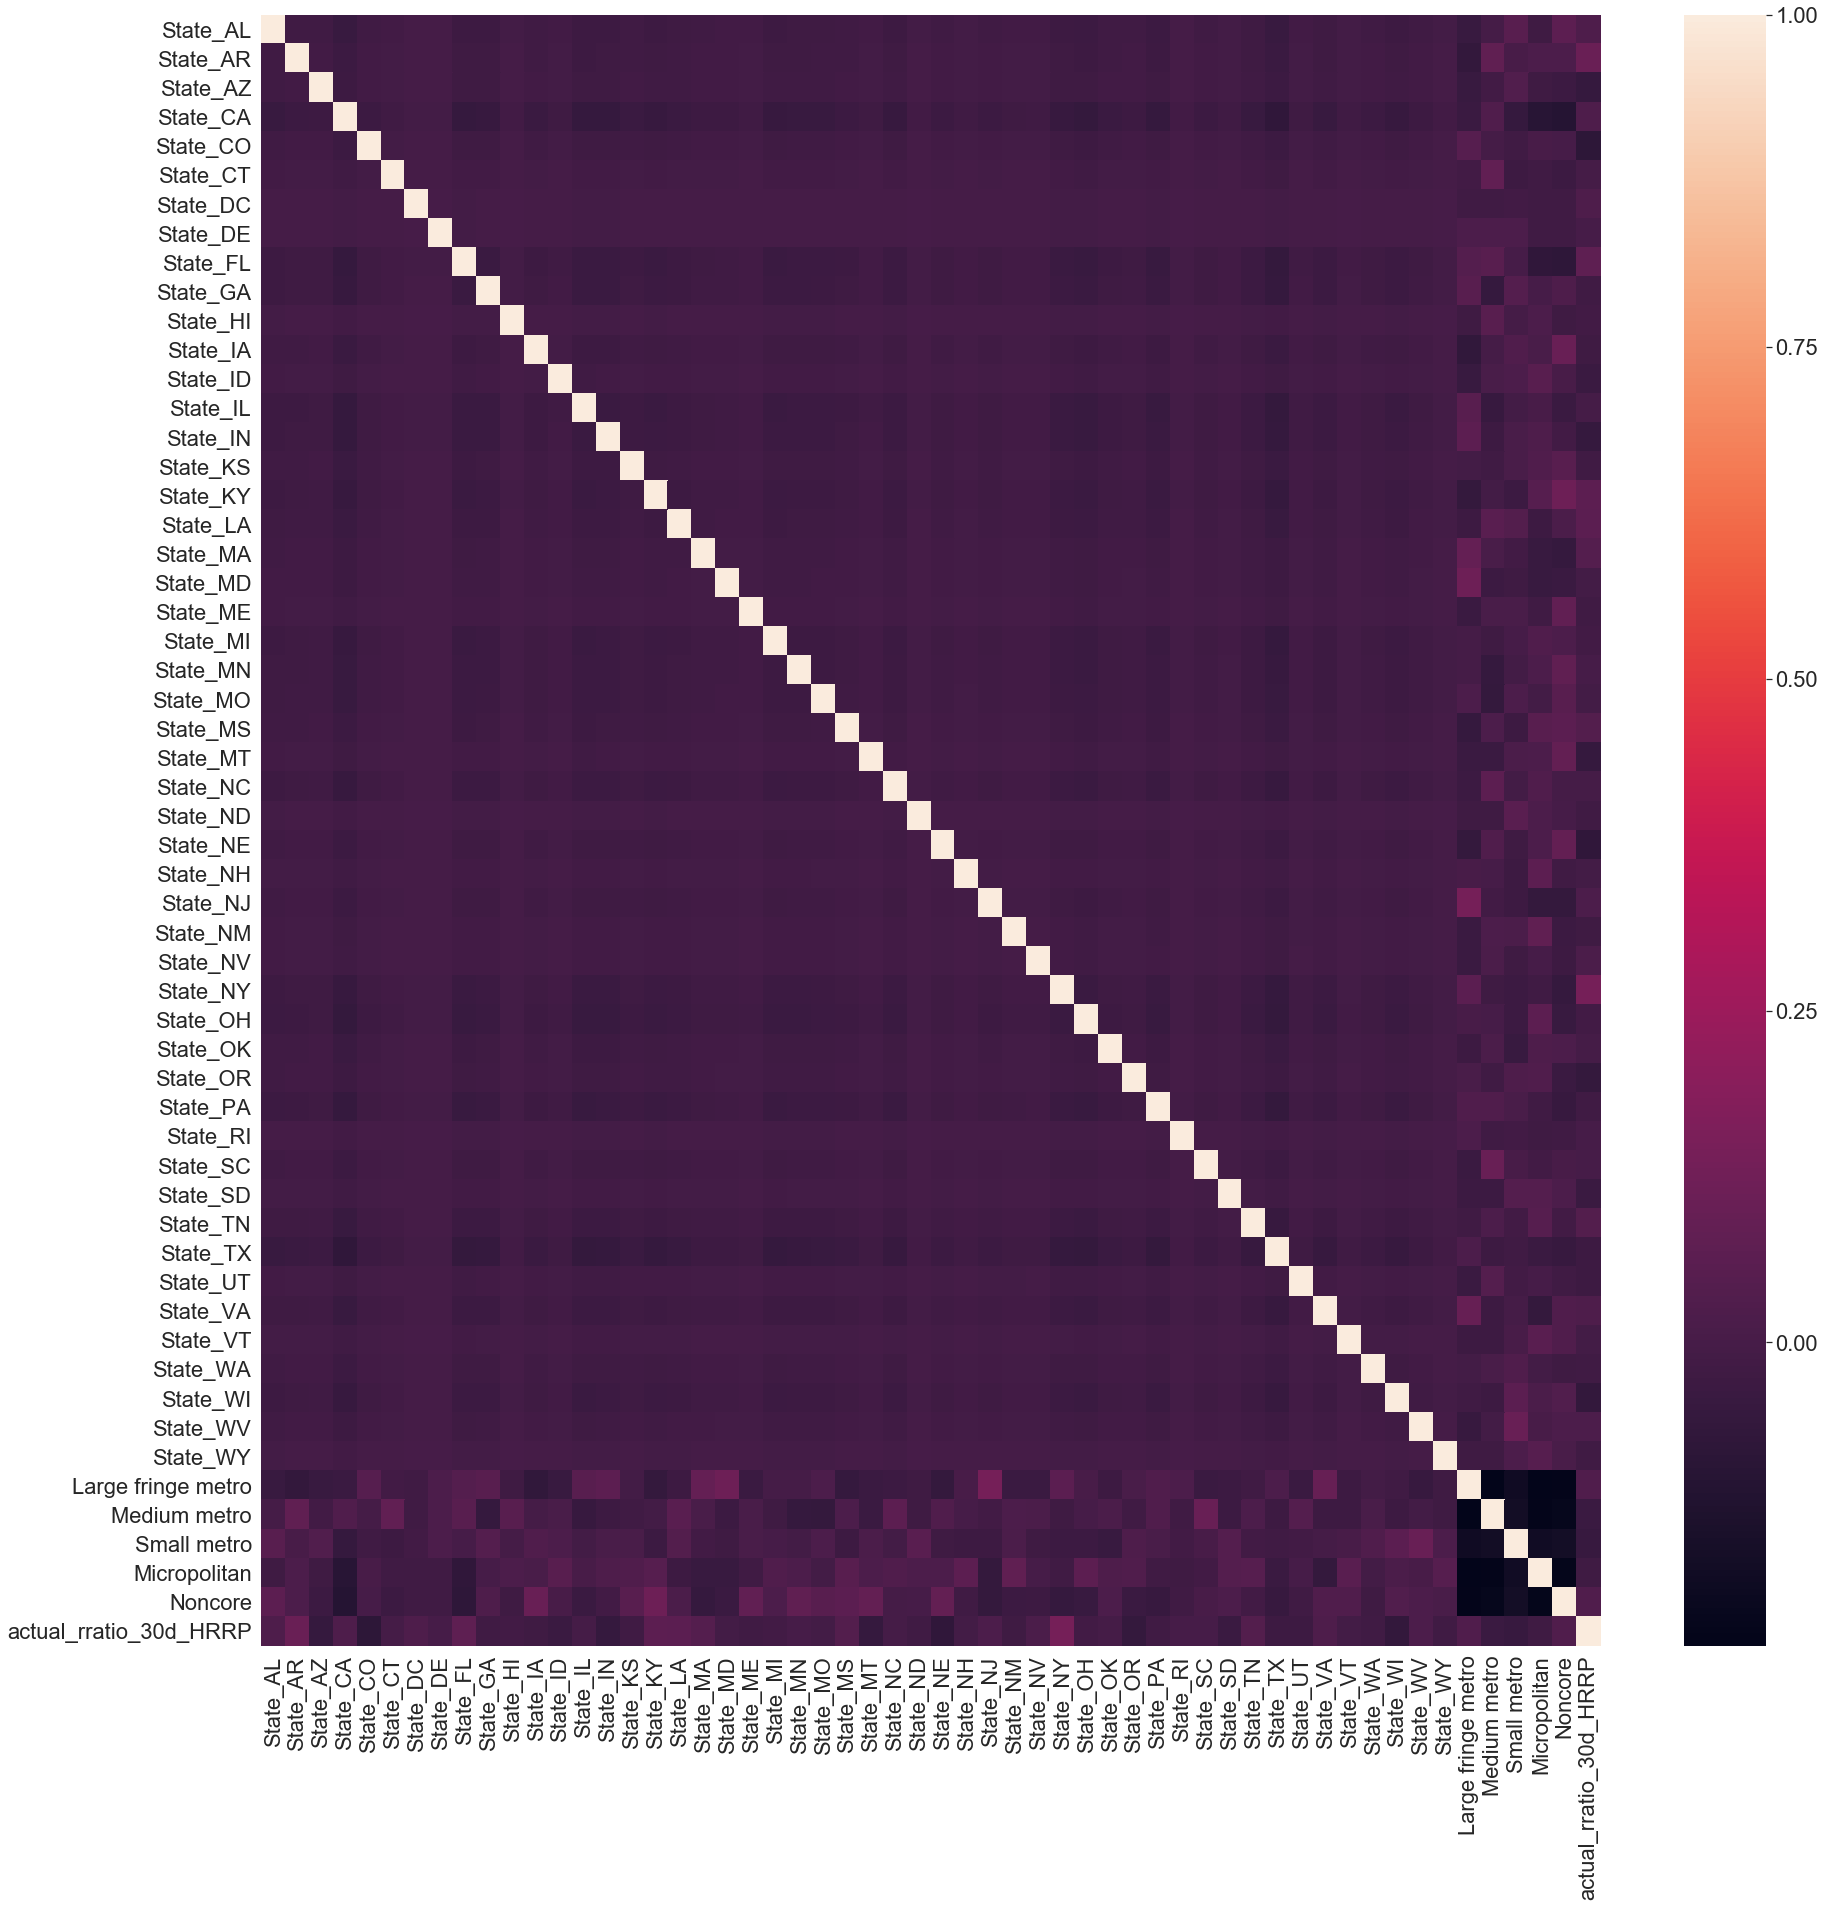

In [159]:
#correlation matrix
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.heatmap(categorical3_columns.corr())

In [160]:
categorical3_columns.corr()

State_AL  State_AR  State_AZ  State_CA  State_CO  \
State_AL                1.000000 -0.020525 -0.018246 -0.041192 -0.019417   
State_AR               -0.020525  1.000000 -0.015618 -0.035259 -0.016620   
State_AZ               -0.018246 -0.015618  1.000000 -0.031343 -0.014774   
State_CA               -0.041192 -0.035259 -0.031343  1.000000 -0.033355   
State_CO               -0.019417 -0.016620 -0.014774 -0.033355  1.000000   
State_CT               -0.012379 -0.010596 -0.009420 -0.021266 -0.010024   
State_DC               -0.006175 -0.005286 -0.004699 -0.010608 -0.005000   
State_DE               -0.006175 -0.005286 -0.004699 -0.010608 -0.005000   
State_FL               -0.031069 -0.026594 -0.023641 -0.053372 -0.025158   
State_GA               -0.028935 -0.024767 -0.022017 -0.049705 -0.023430   
State_HI               -0.007566 -0.006476 -0.005757 -0.012997 -0.006126   
State_IA               -0.021808 -0.018667 -0.016594 -0.037463 -0.017659   
State_ID               -0.013498 -0.011554 -0.010271 -0.023188 -0.010930   
State_IL               -0.031399 -0.026877 -0.023892 -0.053939 -0.025425   
State_IN               -0.030231 -0.025876 -0.023003 -0.051932 -0.024479   
State_KS               -0.021808 -0.018667 -0.016594 -0.037463 -0.017659   
State_KY               -0.028491 -0.024388 -0.021679 -0.048944 -0.023071   
State_LA               -0.023559 -0.020166 -0.017927 -0.040471 -0.019077   
State_MA               -0.017563 -0.015034 -0.013364 -0.030171 -0.014222   
State_MD               -0.016267 -0.013924 -0.012378 -0.027944 -0.013172   
State_ME               -0.012573 -0.010762 -0.009567 -0.021598 -0.010181   
State_MI               -0.028312 -0.024234 -0.021543 -0.048636 -0.022926   
State_MN               -0.026464 -0.022653 -0.020137 -0.045461 -0.021429   
State_MO               -0.025199 -0.021570 -0.019174 -0.043288 -0.020405   
State_MS               -0.020645 -0.017671 -0.015709 -0.035464 -0.016717   
State_MT               -0.013136 -0.011244 -0.009995 -0.022565 -0.010636   
State_NC               -0.027586 -0.023613 -0.020991 -0.047389 -0.022338   
State_ND               -0.007566 -0.006476 -0.005757 -0.012997 -0.006126   
State_NE               -0.018905 -0.016182 -0.014385 -0.032475 -0.015308   
State_NH               -0.011575 -0.009908 -0.008808 -0.019884 -0.009373   
State_NJ               -0.019543 -0.016728 -0.014870 -0.033571 -0.015825   
State_NM               -0.012951 -0.011085 -0.009854 -0.022247 -0.010487   
State_NV               -0.012573 -0.010762 -0.009567 -0.021598 -0.010181   
State_NY               -0.029372 -0.025142 -0.022350 -0.050457 -0.023784   
State_OH               -0.033321 -0.028522 -0.025355 -0.057241 -0.026982   
State_OK               -0.021350 -0.018275 -0.016245 -0.036676 -0.017288   
State_OR               -0.017563 -0.015034 -0.013364 -0.030171 -0.014222   
State_PA               -0.032212 -0.027572 -0.024510 -0.055334 -0.026083   
State_RI               -0.007243 -0.006200 -0.005511 -0.012442 -0.005865   
State_SC               -0.019162 -0.016402 -0.014581 -0.032918 -0.015517   
State_SD               -0.011152 -0.009546 -0.008486 -0.019157 -0.009030   
State_TN               -0.026369 -0.022571 -0.020064 -0.045298 -0.021352   
State_TX               -0.043017 -0.036821 -0.032732 -0.073896 -0.034833   
State_UT               -0.014197 -0.012152 -0.010802 -0.024387 -0.011496   
State_VA               -0.026273 -0.022489 -0.019992 -0.045133 -0.021275   
State_VT               -0.010017 -0.008575 -0.007622 -0.017208 -0.008112   
State_WA               -0.019162 -0.016402 -0.014581 -0.032918 -0.015517   
State_WI               -0.027951 -0.023925 -0.021268 -0.048016 -0.022633   
State_WV               -0.017142 -0.014673 -0.013043 -0.029446 -0.013880   
State_WY               -0.007875 -0.006741 -0.005992 -0.013529 -0.006377   
Large fringe metro     -0.044565 -0.063971 -0.043780 -0.038594  0.046257   
Medium metro           -0.002896  0.078439 -0.014271  0.029713 -0.007489

In [161]:
np.abs(categorical3_columns.iloc[:,1:].corr().loc[:,'actual_rratio_30d_HRRP']).sort_values(ascending=False)

actual_rratio_30d_HRRP    1.000000
State_NY                  0.141137
State_AR                  0.107441
State_CO                  0.080190
State_NE                  0.073406
State_FL                  0.071770
State_KY                  0.065161
State_WI                  0.065083
State_LA                  0.060171
State_OR                  0.056376
State_IN                  0.054169
State_AZ                  0.053330
State_MT                  0.051138
Small metro               0.047322
State_MA                  0.042012
State_TN                  0.039392
State_SD                  0.038635
State_ID                  0.038019
State_MS                  0.037035
Medium metro              0.037014
State_UT                  0.029942
State_TX                  0.029553
Noncore                   0.029358
State_NM                  0.026700
State_IA                  0.026438
Large fringe metro        0.026120
State_DC                  0.025224
State_VA                  0.022845
Micropolitan        

#### categorical_features 
'Readmission national comparison_Below the national average', 
'Hospital overall rating_5',    
'Hospital overall rating_2',   
'Patient experience national comparison_Below the national average',  
'Hospital overall rating_4',      
'Efficient use of medical imaging national comparison_Not Available', 
'Hospital Ownership_Proprietary',   
'Safety of care national comparison_Not Available',  
'Hospital Ownership_Voluntary non-profit - Private',  
'Hospital Ownership_Voluntary non-profit - Church',   
'Timeliness of care national comparison_Below the national average',   
'Timeliness of care national comparison_Same as the national average', 
'Effectiveness of care national comparison_Below the national average',  
'Hospital Ownership_Voluntary non-profit - Other',    
'Efficient use of medical imaging national comparison_Same as the national average', 
'Mortality national comparison_Below the national average',      
'Hospital Ownership_Government - Hospital District or Authority', 
'Patient experience national comparison_Same as the national average', 
'Hospital Ownership_Government - Local',   
'Emergency Services_Yes',   
'Effectiveness of care national comparison_Same as the national average',   
'Hospital Ownership_Physician',                             
'Readmission national comparison_Same as the national average', 
'Safety of care national comparison_Below the national average',    
'Safety of care national comparison_Same as the national average',   
'Hospital overall rating_3',                   
'Mortality national comparison_Not Available',    
'Efficient use of medical imaging national comparison_Below the national average',  
'Hospital Ownership_Government - State', 'State_AL',  'State_AR',
 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY',
 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
 'Large fringe metro', 'Medium metro', 'Small metro', 'Micropolitan', 'Noncore', 'actual_rratio_30d_HRRP'
 
 
 

#### continuous_features 
'Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm', 
                     'Higher Estimate_30d_readm', 'Number of Discharges_30d_HRRP', 
                     'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
                     'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 
                     'actual_rrate_30d_HRRP', 'actual_rratio_30d_HRRP', 'Denominator_30d_mort', 
                     'Score_30d_mort', 'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort', 
                     'rn_comm_LINEAR', 'rn_comm_STAR', 'dr_comm_LINEAR', 'dr_comm_STAR',
                     'meds_LINEAR', 'meds_STAR', 'discharge_LINEAR', 'discharge_STAR', 
                     'transition_LINEAR', 'transition_STAR', 'Overall_LINEAR', 'Overall_STAR',
                     'Summary_STAR'

## models

### selection of features
Overall correlations with categorical features is low, but will include most in initial run through model to determine whether or not these features add any value to model prediction. 

In [162]:
#remove target = 'actual_rratio_30d_HRRP' from features
features = ['Readmission national comparison_Below the national average', 
'Hospital overall rating_5',    
'Hospital overall rating_2',   
'Patient experience national comparison_Below the national average',  
'Hospital overall rating_4',      
'Efficient use of medical imaging national comparison_Not Available', 
'Hospital Ownership_Proprietary',   
'Safety of care national comparison_Not Available',  
'Hospital Ownership_Voluntary non-profit - Private',  
'Hospital Ownership_Voluntary non-profit - Church',   
'Timeliness of care national comparison_Below the national average',   
'Timeliness of care national comparison_Same as the national average', 
'Effectiveness of care national comparison_Below the national average',  
'Hospital Ownership_Voluntary non-profit - Other',    
'Efficient use of medical imaging national comparison_Same as the national average', 
'Mortality national comparison_Below the national average',      
'Hospital Ownership_Government - Hospital District or Authority', 
'Patient experience national comparison_Same as the national average', 
'Hospital Ownership_Government - Local',   
'Emergency Services_Yes',   
'Effectiveness of care national comparison_Same as the national average',   
'Hospital Ownership_Physician',                             
'Readmission national comparison_Same as the national average', 
'Safety of care national comparison_Below the national average',    
'Safety of care national comparison_Same as the national average',   
'Hospital overall rating_3',                   
'Mortality national comparison_Not Available',    
'Efficient use of medical imaging national comparison_Below the national average',  
'Hospital Ownership_Government - State','State_AL',  
            'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 
            'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 
            'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 
            'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 
            'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 
            'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 
            'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
            'Large fringe metro', 'Medium metro', 'Small metro', 'Micropolitan', 'Noncore', 
            'Denominator_30d_readm', 'Score_30d_readm', 'Lower Estimate_30d_readm',
            'Higher Estimate_30d_readm', 'Number of Discharges_30d_HRRP', 
            'Excess Readmission Ratio_30d_HRRP', 'Predicted Readmission Rate_30d_HRRP',
            'Expected Readmission Rate_30d_HRRP', 'Number of Readmissions_30d_HRRP', 
            'actual_rrate_30d_HRRP', 'Denominator_30d_mort', 
            'Score_30d_mort', 'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort', 
            'rn_comm_LINEAR', 'rn_comm_STAR', 'dr_comm_LINEAR', 'dr_comm_STAR',
            'meds_LINEAR', 'meds_STAR', 'discharge_LINEAR', 'discharge_STAR', 
            'transition_LINEAR', 'transition_STAR', 'Overall_LINEAR', 'Overall_STAR',
            'Summary_STAR']

### linear regression

In [163]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [164]:
from sklearn import linear_model
# Y is the target variable
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
# X is the feature set 
X = hosp_readmin_df[features]

# create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 1.54345093e-04 -9.47042582e-05 -1.97945726e-04 -2.70628864e-04
  4.05343214e-04  1.43307320e-04  1.08517998e-03 -6.53745166e-04
  1.26379287e-03  8.96148513e-04 -9.28846069e-05  2.06397588e-05
 -3.71450773e-04  9.75133463e-04 -1.40311722e-04  1.05033746e-04
  6.75354474e-04 -2.18238344e-05  1.78982605e-03 -4.85271582e-04
 -2.07545720e-04  1.39482309e-03  7.29179982e-04  3.94011410e-04
 -2.69975875e-04  2.71832288e-04  8.49411939e-04  2.02278252e-04
  4.45896658e-04  8.90851189e-04  1.46374301e-04  4.71273684e-04
  1.78568361e-04  5.38051672e-04  2.44905023e-04 -1.03650652e-04
  1.78050802e-03  5.60191921e-04  9.60100724e-04  2.47748062e-04
  5.82044025e-04  6.02495747e-04  4.16998139e-04  4.73141191e-04
  7.57587230e-04  9.44062691e-05 -1.27221243e-04 -8.44504187e-05
 -3.34183934e-04  8.23757192e-04  4.81948913e-04  2.01685790e-03
  5.70131652e-04  5.35425120e-04  2.78645503e-04  7.05896733e-05
  1.40400615e-03  5.30124261e-04  7.94102645e-04 -2.76552614e-04
  2.0817

In [165]:
import statsmodels.api as sm

# need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\katec\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_rratio_30d_HRRP   R-squared:                       0.999
Model:                                OLS   Adj. R-squared:                  0.999
Method:                     Least Squares   F-statistic:                 6.202e+04
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                            09:33:46   Log-Likelihood:                 20528.
No. Observations:                    5039   AIC:                        -4.083e+04
Df Residuals:                        4927   BIC:                        -4.010e+04
Df Model:                             111                                         
Covariance Type:                nonrobust                                         
=====================================================================================================================================================
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                -1.3878      0.019    -73.302      0.000      -1.425      -1.351
Readmission national comparison_Below the national average                            0.0002      0.000      0.873      0.383      -0.000       0.001
Hospital overall rating_5                                                          -9.47e-05      0.000     -0.260      0.795      -0.001       0.001
Hospital overall rating_2                                                            -0.0002      0.000     -0.797      0.425      -0.001       0.000
Patient experience national comparison_Below the national average                    -0.0003      0.000     -1.002      0.316      -0.001       0.000
Hospital overall rating_4                                                             0.0004      0.000      1.411      0.158      -0.000       0.001
Efficient use of medical imaging national comparison_Not Available                    0.0001      0.000      0.501      0.617      -0.000       0.001
Hospital Ownership_Proprietary                                                        0.0011      0.001      2.087      0.037    6.59e-05       0.002
Safety of care national comparison_Not Available                                     -0.0007      0.000     -2.858      0.004      -0.001      -0.000
Hospital Ownership_Voluntary non-profit - Private                                     0.0013      0.001      2.435      0.015       0.000       0.002
Hospital Ownership_Voluntary non-profit - Church                                      0.0009      0.001      1.614      0.107      -0.000       0.002
Timeliness of care national comparison_Below the national average                 -9.288e-05      0.000     -0.430      0.667      -0.001       0.000
Timeliness of care national comparison_Same as the national average                2.064e-05      0.000      0.131      0.896      -0.000       0.000
Effectiveness of care national comparison_Below the national average                 -0.0004      0.000     -1.207      0.227      -0.001       0.000
Hospital Ownership_Voluntary non-profit - Other                                       0.0010      0.001      1.807      0.071   -8.31e-05       0.002
Efficient use of medical imaging national comparison_Same as the national average    -0.0001      0.000     -0.664      0.507      -0.001       0.000
Mortality national comparison_Below the national average                              0.0001      0.000      0.433      0.665      -0.000       0.001
Hospital Ownership_Government - Hospita

In [166]:
#double-check for duplicate rows
hosp_readmin_df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
12      False
13      False
14      False
16      False
17      False
18      False
20      False
21      False
22      False
23      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
        ...  
6415    False
6416    False
6417    False
6418    False
6419    False
6420    False
6421    False
6422    False
6423    False
6424    False
6425    False
6426    False
6427    False
6428    False
6429    False
6431    False
6433    False
6439    False
6440    False
6441    False
6444    False
6445    False
6446    False
6447    False
6449    False
6450    False
6456    False
6457    False
6461    False
6463    False
Length: 5039, dtype: bool

In [167]:
#train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('The number of observations in training set is {}'.format(X_train.shape[0]))
print('The number of observations in test set is {}'.format(X_test.shape[0]))

The number of observations in training set is 4031
The number of observations in test set is 1008


In [168]:
#  add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_rratio_30d_HRRP   R-squared:                       0.999
Model:                                OLS   Adj. R-squared:                  0.999
Method:                     Least Squares   F-statistic:                 5.860e+04
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                            09:34:07   Log-Likelihood:                 16730.
No. Observations:                    4031   AIC:                        -3.324e+04
Df Residuals:                        3919   BIC:                        -3.253e+04
Df Model:                             111                                         
Covariance Type:                nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------

Mean absolute error of the prediction is: 0.0022603960857817676
Mean squared error of the prediction is: 2.7851924719608478e-05
Root mean squared error of the prediction is: 0.0052774922756559746
Mean absolute percentage error of the prediction is: 0.22152240036647017


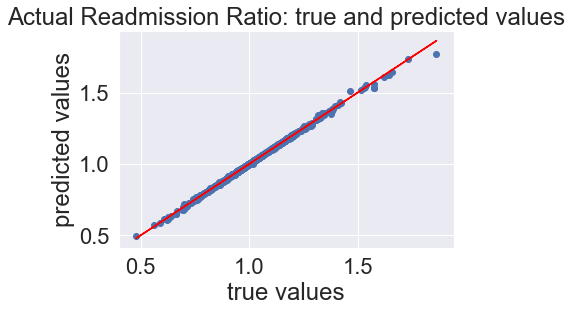

In [169]:
X_test = sm.add_constant(X_test)

# predictions 
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('Actual Readmission Ratio: true and predicted values')


print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds)))
print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

##### model is clearly overfitting, review features for relevance and correlation

#### adjust/remove features

##### drop

'Readmission national comparison_Below the national average',
'Patient experience national comparison_Below the national average',
'Efficient use of medical imaging national comparison_Not Available',
'Safety of care national comparison_Not Available',
'Timeliness of care national comparison_Below the national average',
'Timeliness of care national comparison_Same as the national average',
'Effectiveness of care national comparison_Below the national average',
'Efficient use of medical imaging national comparison_Same as the national average',
'Mortality national comparison_Below the national average',
'Patient experience national comparison_Same as the national average',
'Effectiveness of care national comparison_Same as the national average',
'Safety of care national comparison_Below the national average',
'Safety of care national comparison_Same as the national average',
'Mortality national comparison_Not Available',
'Efficient use of medical imaging national comparison_Below the national average',
'Hospital Ownership_Government - State',
'Hospital Ownership_Government - Hospital District or Authority',
'Denominator_30d_mort',
'rn_comm_LINEAR',
'rn_comm_STAR',
'meds_LINEAR',
'meds_STAR',
'transition_LINEAR',
'transition_STAR',
'Overall_STAR'

In [170]:
#combine

hosp_readmin_df['Score_30d_readm_mort'] = hosp_readmin_df['Score_30d_readm'] * hosp_readmin_df['Score_30d_mort'] 
hosp_readmin_df['Hospital overall rating_4_5'] = hosp_readmin_df['Hospital overall rating_5'] * hosp_readmin_df['Hospital overall rating_4']
hosp_readmin_df['Hospital overall rating_2_3'] = hosp_readmin_df['Hospital overall rating_2'] * hosp_readmin_df[ 'Hospital overall rating_3']

In [171]:
#remove target = 'actual_rratio_30d_HRRP' from features
features2 = ['Hospital overall rating_4_5', 'Hospital overall rating_2_3',
            'Score_30d_readm_mort', 'Hospital Ownership_Proprietary',
             'Hospital Ownership_Voluntary non-profit - Private', 
             'Hospital Ownership_Voluntary non-profit - Church', 
             'Hospital Ownership_Voluntary non-profit - Other', 
             'Hospital Ownership_Government - Local', 
             'Emergency Services_Yes', 
             'Hospital Ownership_Physician',  
             'Readmission national comparison_Same as the national average',
             'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 
             'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 
             'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
             'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 
             'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 
             'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 
             'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 
             'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 
             'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 
             'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
             'Large fringe metro', 'Medium metro', 'Small metro', 
             'Micropolitan', 'Noncore', 'Denominator_30d_readm', 
             'Lower Estimate_30d_readm', 'Higher Estimate_30d_readm', 
             'Number of Discharges_30d_HRRP', 'Excess Readmission Ratio_30d_HRRP', 
             'Predicted Readmission Rate_30d_HRRP', 'Expected Readmission Rate_30d_HRRP', 
             'Number of Readmissions_30d_HRRP', 'actual_rrate_30d_HRRP', 
             'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort', 
             'dr_comm_LINEAR', 'dr_comm_STAR', 'discharge_LINEAR', 'discharge_STAR',
             'Overall_LINEAR', 'Summary_STAR']

##### drop
'Hospital Ownership_Voluntary non-profit - Church',
'Hospital Ownership_Physician', 
'Higher Estimate_30d_readm',
'Overall_LINEAR',
'Summary_STAR'

In [172]:
#combine
hosp_readmin_df['Non_metro'] = hosp_readmin_df['Micropolitan'] * hosp_readmin_df['Noncore'] 

hosp_readmin_df['lg_fringe_med_metro'] = hosp_readmin_df['Large fringe metro'] * hosp_readmin_df['Medium metro']

In [173]:
#remove target = 'actual_rratio_30d_HRRP' from features
features3 = ['Hospital overall rating_4_5', 'Hospital overall rating_2_3',
             'Score_30d_readm_mort', 'Hospital Ownership_Proprietary',
             'Hospital Ownership_Voluntary non-profit - Private',
             'Hospital Ownership_Voluntary non-profit - Other',
             'Hospital Ownership_Government - Local', 
             'Emergency Services_Yes',
             'Readmission national comparison_Same as the national average',
             'lg_fringe_med_metro', 'Small metro', 
             'Non_metro', 'Denominator_30d_readm', 
             'Lower Estimate_30d_readm', 
             'Number of Discharges_30d_HRRP', 
             'Excess Readmission Ratio_30d_HRRP', 
             'Predicted Readmission Rate_30d_HRRP', 
             'Expected Readmission Rate_30d_HRRP', 
             'Number of Readmissions_30d_HRRP', 'actual_rrate_30d_HRRP', 
             'Lower Estimate_30d_mort', 'Higher Estimate_30d_mort', 
             'dr_comm_LINEAR', 'dr_comm_STAR', 
             'discharge_LINEAR', 'discharge_STAR']

##### drop
removed 'actual_rrate_30d_HRRP' which I suspect is causing the gross overfitting; 
all remaining features with significant p-values except for states, which will remove for final model version   

In [174]:
#remove target = 'actual_rratio_30d_HRRP' from features
features4 = ['Hospital overall rating_4_5', 'Hospital overall rating_2_3',
             'Score_30d_readm_mort',  
             'Emergency Services_Yes',
             'lg_fringe_med_metro', 'Small metro', 
             'Non_metro', 'Denominator_30d_readm', 
             'Lower Estimate_30d_readm', 
             'Number of Discharges_30d_HRRP', 
             'Number of Readmissions_30d_HRRP', 
             'Predicted Readmission Rate_30d_HRRP', 
             'Expected Readmission Rate_30d_HRRP',  
             'Lower Estimate_30d_mort', 
             'dr_comm_LINEAR', 
             'discharge_LINEAR', 'discharge_STAR']

In [175]:
# Y is the target variable
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
# X is the feature set 
X = hosp_readmin_df[features4]

In [176]:
#train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [177]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_rratio_30d_HRRP   R-squared:                       0.876
Model:                                OLS   Adj. R-squared:                  0.876
Method:                     Least Squares   F-statistic:                     2188.
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                            09:35:25   Log-Likelihood:                 5996.1
No. Observations:                    4031   AIC:                        -1.196e+04
Df Residuals:                        4017   BIC:                        -1.188e+04
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

C:\Users\katec\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Mean absolute error of the prediction is: 0.03490027037531688
Mean squared error of the prediction is: 0.003923635149089057
Root mean squared error of the prediction is: 0.06263892678749419
Mean absolute percentage error of the prediction is: 3.478248033010383


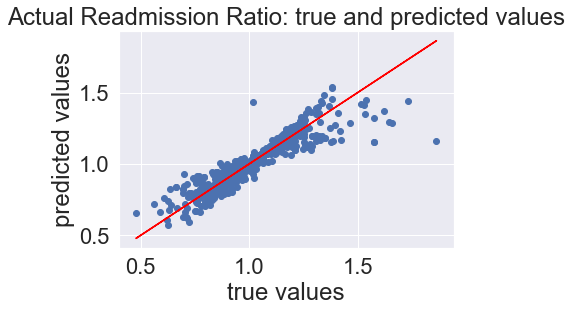

In [178]:
X_test = sm.add_constant(X_test)

# predictions 
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('Actual Readmission Ratio: true and predicted values')

print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(y_test, y_preds)))
print('Mean squared error of the prediction is: {}'.format(mse(y_test, y_preds)))
print('Root mean squared error of the prediction is: {}'.format(rmse(y_test, y_preds)))
print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

#### evaluation Model 1 (M1) with features

**train set: R-squared:**        0.999
**Adj. R-squared:**              0.999
**F-statistic:**                 5.860e+04
**Prob (F-statistic):**          0.00
**No. Observations:**            4031   
**AIC:**                        -3.324e+04
**Df Residuals:**                3919   
**BIC:**                        -3.253e+04


Mean absolute error of the prediction is: 0.0022479498101130786
Mean squared error of the prediction is: 2.7881821830847437e-05
Root mean squared error of the prediction is: 0.005280324027069498
Mean absolute percentage error of the prediction is: 0.22017933374532347

#### evaluation Model 1 (M1) with features2

R-squared:                       0.999
Model:                                OLS   Adj. R-squared:                  0.999
Method:                     Least Squares   F-statistic:                 8.111e+04
Date:                    Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                            12:01:01   Log-Likelihood:                 16735.
No. Observations:                    4031   AIC:                        -3.331e+04
Df Residuals:                        3949   BIC:                        -3.279e+04



Mean absolute error of the prediction is: 0.0022479498101130786
Mean squared error of the prediction is: 2.7881821830847437e-05
Root mean squared error of the prediction is: 0.005280324027069498
Mean absolute percentage error of the prediction is: 0.22017933374532347


#### evaluation Model 1 (M1) with features3
R-squared:                       0.999
Adj. R-squared:                  0.999
F-statistic:                 9.107e+04
Prob (F-statistic):               0.00
No. Observations:                    4031   
AIC:                        -3.331e+04
Df Residuals:                        3958   
BIC:                        -3.285e+04

Mean absolute error of the prediction is: 0.0022258319245610867
Mean squared error of the prediction is: 2.7869722252196517e-05
Root mean squared error of the prediction is: 0.005279178179621949
Mean absolute percentage error of the prediction is: 0.21809480086822824


#### evaluation Model 1 (M1) with features4
R-squared:                       0.876
Model:                                OLS   Adj. R-squared:                  0.876
Method:                     Least Squares   F-statistic:                     2188.
Date:                    Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                            08:53:23   Log-Likelihood:                 5996.1
No. Observations:                    4031   AIC:                        -1.196e+04
Df Residuals:                        4017   BIC:                        -1.188e+04

Mean absolute error of the prediction is: 0.03490027037531688
Mean squared error of the prediction is: 0.003923635149089057
Root mean squared error of the prediction is: 0.06263892678749419
Mean absolute percentage error of the prediction is: 3.478248033010383

#### evaluation of final feature set (features4)

**train**:
R-squared:                       0.876
Adj. R-squared:                  0.876

**test**:
Mean absolute error of the prediction is: 0.03490027037531688
Mean squared error of the prediction is: 0.003923635149089057
Root mean squared error of the prediction is: 0.06263892678749419
Mean absolute percentage error of the prediction is: 3.478248033010383

The model with the features4 set performs more realistically compared to other feature sets, but still well per R-sq paramenters. The main concern regarding this model remains overfitting. All non-significant features have been removed. Perhaps most importantly, the 'actual_rrate_30d_HRRP' metric, which was included in features versions 1-3, has been removed. This appears to have corrected the extreme overfitting of the first 3 model versions. 

### running models post final feature selection

#### Linear Regression

In [193]:
# Y is the target variable
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
# X is the feature set 
X = hosp_readmin_df[features4]

#split with 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [194]:
# fit an OLS model 
lrm = linear_model.LinearRegression()
lrm.fit(X_train, y_train)


# predictions 
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

#save results for comparison
R_sq_train = lrm.score(X_train, y_train)
R_sq_test = lrm.score(X_test, y_test)
MAE = mean_absolute_error(y_test, y_preds_test)
MSE = mse(y_test, y_preds_test)
RMSE = rmse(y_test, y_preds_test)
MAPE = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100


print('R-squared of the model in the training set is: {}'.format(R_sq_train))
print('-----Test set statistics-----')
print('R-squared of the model in the test set is: {}'.format(R_sq_test))
print('Mean absolute error of the prediction is: {}'.format(MAE))
print('Mean squared error of the prediction is: {}'.format(MSE))
print('Root mean squared error of the prediction is: {}'.format(RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(MAPE))

R-squared of the model in the training set is: 0.8762302531463538
-----Test set statistics-----
R-squared of the model in the test set is: 0.8204835154769776
Mean absolute error of the prediction is: 0.03490027037531689
Mean squared error of the prediction is: 0.003923635149089057
Root mean squared error of the prediction is: 0.06263892678749419
Mean absolute percentage error of the prediction is: 3.478248033010381


#### cross validation

In [187]:
lrm_scores = cross_val_score(lrm, X, Y, cv=5)
print('Cross-validated scores:', lrm_scores)

predictions = cross_val_predict(lrm, X, Y, cv=5)
lrm_accuracy = metrics.r2_score(Y, predictions)
print('Cross-Predicted Accuracy:', lrm_accuracy) 

Cross-validated scores: [0.86887762 0.87561176 0.83514254 0.85655785 0.86923094]
Cross-Predicted Accuracy: 0.8621439589178417


#### Lasso, RIdge, ElasticNet

In [195]:
# Y is the target variable
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
# X is the feature set 
X = hosp_readmin_df[features4]

#split with 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [196]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=20) 
lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

#save results for comparison
lcv_R_sq_train = lasso_cv.score(X_train, y_train)
lcv_R_sq_test = lasso_cv.score(X_test, y_test)
lcv_MAE = mean_absolute_error(y_test, y_preds_test)
lcv_MSE = mse(y_test, y_preds_test)
lcv_RMSE = rmse(y_test, y_preds_test)
lcv_MAPE = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

print('Best alpha value is: {}'.format(lasso_cv.alpha_))
print('R-squared of the model in the training set is: {}'.format(lcv_R_sq_train))
print('-----Test set statistics-----')
print('R-squared of the model in the test set is: {}'.format(lcv_R_sq_test))
print('Mean absolute error of the prediction is: {}'.format(lcv_MAE))
print('Mean squared error of the prediction is: {}'.format(lcv_MSE))
print('Root mean squared error of the prediction is: {}'.format(lcv_RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(lcv_MAPE))

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Best alpha value is: 1e-06
R-squared of the model in the training set is: 0.8762302422585817
-----Test set statistics-----
R-squared of the model in the test set is: 0.8204867020797592
Mean absolute error of the prediction is: 0.03489824617017991
Mean squared error of the prediction is: 0.003923565500517711
Root mean squared error of the prediction is: 0.06263837083224397
Mean absolute percentage error of the prediction is: 3.4780517775547


In [197]:
lcv_scores = cross_val_score(lasso_cv, X, Y, cv=5)


predictions = cross_val_predict(lasso_cv, X, Y, cv=5)
lcv_accuracy = metrics.r2_score(Y, predictions)

print('Cross-validated scores:', lcv_scores)
print('Cross-Predicted Accuracy:', lcv_accuracy) 

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Cross-validated scores: [0.86882673 0.87571806 0.83527659 0.85666497 0.86901424]
Cross-Predicted Accuracy: 0.8621577172345092


C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

In [198]:
# Y is the target variable
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
# X is the feature set 
X = hosp_readmin_df[features4]

#split with 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [199]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(alphas=alphas, cv=6) 
elastic_cv.fit(X_train, y_train)

# predictions 
y_preds_train = elastic_cv.predict(X_train)
y_preds_test = elastic_cv.predict(X_test)

#save results for comparison
ecv_R_sq_train = elastic_cv.score(X_train, y_train)
ecv_R_sq_test = elastic_cv.score(X_test, y_test)
ecv_MAE = mean_absolute_error(y_test, y_preds_test)
ecv_MSE = mse(y_test, y_preds_test)
ecv_RMSE = rmse(y_test, y_preds_test)
ecv_MAPE = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100


print('Best alpha value is: {}'.format(elastic_cv.alpha_))
print('R-squared of the model in the training set is: {}'.format(ecv_R_sq_train))
print('-----Test set statistics-----')
print('R-squared of the model in the test set is: {}'.format(ecv_R_sq_test))
print('Mean absolute error of the prediction is: {}'.format(ecv_MAE))
print('Mean squared error of the prediction is: {}'.format(ecv_MSE))
print('Root mean squared error of the prediction is: {}'.format(ecv_RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(ecv_MAPE))

Best alpha value is: 1e-06
R-squared of the model in the training set is: 0.8762302450980242
-----Test set statistics-----
R-squared of the model in the test set is: 0.8204844551365251
Mean absolute error of the prediction is: 0.03489921213577215
Mean squared error of the prediction is: 0.003923614611246869
Root mean squared error of the prediction is: 0.06263876284894897
Mean absolute percentage error of the prediction is: 3.4781562841963556


C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

In [201]:
ecv_scores = cross_val_score(elastic_cv, X, Y, cv=5)


predictions = cross_val_predict(elastic_cv, X, Y, cv=5)
ecv_accuracy = metrics.r2_score(Y, predictions)

print('Cross-validated scores:', ecv_scores)
print('Cross-Predicted Accuracy:', ecv_accuracy)

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Cross-validated scores: [0.86805006 0.8755119  0.83621214 0.85662009 0.86758755]
Cross-Predicted Accuracy: 0.8618252173742669


C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [202]:
# Y is the target variable
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
# X is the feature set 
X = hosp_readmin_df[features4]

#split with 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [203]:
from sklearn.linear_model import RidgeCV

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

#save results for comparison
rcv_R_sq_train = ridge_cv.score(X_train, y_train)
rcv_R_sq_test = ridge_cv.score(X_test, y_test)
rcv_MAE = mean_absolute_error(y_test, y_preds_test)
rcv_MSE = mse(y_test, y_preds_test)
rcv_RMSE = rmse(y_test, y_preds_test)
rcv_MAPE = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100


print('Best alpha value is: {}'.format(ridge_cv.alpha_))
print('R-squared of the model in the training set is: {}'.format(rcv_R_sq_train))
print('-----Test set statistics-----')
print('R-squared of the model in the test set is: {}'.format(rcv_R_sq_test))
print('Mean absolute error of the prediction is: {}'.format(rcv_MAE))
print('Mean squared error of the prediction is: {}'.format(rcv_MSE))
print('Root mean squared error of the prediction is: {}'.format(rcv_RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(rcv_MAPE))

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.42885e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.45092e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.48512e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.37251e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43795e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\r

Best alpha value is: 1.0
R-squared of the model in the training set is: 0.8762296345531291
-----Test set statistics-----
R-squared of the model in the test set is: 0.8205040318074335
Mean absolute error of the prediction is: 0.03488040094278457
Mean squared error of the prediction is: 0.003923186730128976
Root mean squared error of the prediction is: 0.06263534728992069
Mean absolute percentage error of the prediction is: 3.476009731580248


In [204]:
rcv_scores = cross_val_score(ridge_cv, X, Y, cv=5)


predictions = cross_val_predict(ridge_cv, X, Y, cv=5)
rcv_accuracy = metrics.r2_score(Y, predictions)

print('Cross-validated scores:', rcv_scores)
print('Cross-Predicted Accuracy:', rcv_accuracy)

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.33648e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.52037e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.53496e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.37247e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.34935e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.45177e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43129e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.5674e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.47166e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.40131e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ri

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.32099e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.44916e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.43748e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.30189e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.28152e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.34366e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.3255e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.44131e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.45387e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.31459e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\katec\Anaconda3\lib\site-packages\sklearn\linear_model\ri

Cross-validated scores: [0.86870835 0.87520317 0.83533197 0.85665741 0.8685049 ]
Cross-Predicted Accuracy: 0.8619395224056723


In [211]:
scores = scores.mean()
lcv_scores = lcv_scores.mean()
ecv_scores = ecv_scores.mean()
rcv_scores = rcv_scores.mean()

#### evaluate  best model on the test set

In [237]:
# initialise data of lists. 
data = {'M1_lrm':[R_sq_train, R_sq_test, MAE, MSE, RMSE, MAPE, accuracy, scores], 'M1_lcv':[lcv_R_sq_train, lcv_R_sq_test, lcv_MAE, lcv_MSE, lcv_RMSE, lcv_MAPE, lcv_accuracy, lcv_scores],
       'M1_rcv': [rcv_R_sq_train, rcv_R_sq_test, rcv_MAE, rcv_MSE, rcv_RMSE, rcv_MAPE, rcv_accuracy, rcv_scores], 'M1_ecv': [ecv_R_sq_train, ecv_R_sq_test, ecv_MAE, ecv_MSE, ecv_RMSE, ecv_MAPE, ecv_accuracy, ecv_scores]} 
  
# Creates pandas DataFrame. 
model_stats_compare = pd.DataFrame(data, index =['R_sq_train', 'R_sq_test', 'MAE', 'MSE', 'RMSE','MAPE', 'R_sq_CV', 'CV_scores']) 
  
# print the data 
model_stats_compare

M1_lrm    M1_lcv    M1_rcv    M1_ecv
R_sq_train  0.876230  0.876230  0.876230  0.876230
R_sq_test   0.820484  0.820487  0.820504  0.820484
MAE         0.034900  0.034898  0.034880  0.034899
MSE         0.003924  0.003924  0.003923  0.003924
RMSE        0.062639  0.062638  0.062635  0.062639
MAPE        3.478248  3.478052  3.476010  3.478156
R_sq_CV     0.862158  0.862158  0.861940  0.861825
CV_scores   0.861084  0.861100  0.860881  0.860796

### evaluate linear regression models

The models appears to perform equally well across all model versions with only very small differences in the above metrics.  When comparing the train/test metric results closely, it appears the RCV performed better with a higher R_sq_test score. The RCV model also had the lowest MAE, MSE, RMSE and MAPE scores. Although the differences between the models is very small, overall the RCV appears to be the better performing model. 

After performing cross-validation on the models, the LCV reported the highes R_sq score and the highest cross-validation scores(mean). 

The test set performs slightly worse than the train set in all models. Although the R_sq of both train and test is relatively high, suggesting overfitting, the cross-validation scores are now in-line with the train/test scores, showing that the extreme overfitting of the first 3 feature sets has been corrected (see above). 


### linear regression (features4)
R-squared of the model in the training set is: 0.8762302531463538
-----Test set statistics-----
R-squared of the model in the test set is: 0.8204835154769776
Mean absolute error of the prediction is: 0.03490027037531689
Mean squared error of the prediction is: 0.003923635149089057
Root mean squared error of the prediction is: 0.06263892678749419
Mean absolute percentage error of the prediction is: 3.478248033010381
#### cross validation
Cross-validated scores: [0.86887762 0.87561176 0.83514254 0.85655785 0.86923094]
Cross-Predicted Accuracy: 0.8621439589178417

### Lasso 
Best alpha value is: 1e-06
R-squared of the model in the training set is: 0.8762302422585817
-----Test set statistics-----
R-squared of the model in the test set is: 0.8204867020797592
Mean absolute error of the prediction is: 0.03489824617017991
Mean squared error of the prediction is: 0.003923565500517711
Root mean squared error of the prediction is: 0.06263837083224397
Mean absolute percentage error of the prediction is: 3.4780517775547
#### cross validation
Cross-validated scores: [0.86882673 0.87571806 0.83527659 0.85666497 0.86901424]
Cross-Predicted Accuracy: 0.8621577172345092

### ElasticNetCV
Best alpha value is: 1e-06
R-squared of the model in the training set is: 0.8762302450980242
-----Test set statistics-----
R-squared of the model in the test set is: 0.8204844551365251
Mean absolute error of the prediction is: 0.03489921213577215
Mean squared error of the prediction is: 0.003923614611246869
Root mean squared error of the prediction is: 0.06263876284894897
Mean absolute percentage error of the prediction is: 3.4781562841963556
#### cross validation
Cross-validated scores: [0.86805006 0.8755119  0.83621214 0.85662009 0.86758755]
Cross-Predicted Accuracy: 0.8618252173742669

### RidgeCV
Best alpha value is: 1.0
R-squared of the model in the training set is: 0.8762296345531291
-----Test set statistics-----
R-squared of the model in the test set is: 0.8205040318074335
Mean absolute error of the prediction is: 0.03488040094278457
Mean squared error of the prediction is: 0.003923186730128976
Root mean squared error of the prediction is: 0.06263534728992069
Mean absolute percentage error of the prediction is: 3.476009731580248
#### cross validation
Cross-validated scores: [0.86870835 0.87520317 0.83533197 0.85665741 0.8685049 ]
Cross-Predicted Accuracy: 0.8619395224056723

## knn regression

In [213]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [214]:
#add target = 'actual_rratio_30d_HRRP' to features
features5 = ['Hospital overall rating_4_5', 'Hospital overall rating_2_3',
             'Score_30d_readm_mort',  
             'Emergency Services_Yes',
             'lg_fringe_med_metro', 'Small metro', 
             'Non_metro', 'Denominator_30d_readm', 
             'Lower Estimate_30d_readm', 
             'Number of Discharges_30d_HRRP', 
             'Number of Readmissions_30d_HRRP', 
             'Predicted Readmission Rate_30d_HRRP', 
             'Expected Readmission Rate_30d_HRRP',  
             'Lower Estimate_30d_mort', 
             'dr_comm_LINEAR', 
             'discharge_LINEAR', 'discharge_STAR', 'actual_rratio_30d_HRRP']

In [215]:
from sklearn.model_selection import train_test_split


knn = neighbors.KNeighborsRegressor(n_neighbors=10)

X = hosp_readmin_df[features4]
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
hosp_readmin_knn = hosp_readmin_df[features5]


train , test = train_test_split(hosp_readmin_knn, test_size = 0.3)

x_train = train.drop('actual_rratio_30d_HRRP', axis=1)
y_train = train['actual_rratio_30d_HRRP']

x_test = test.drop('actual_rratio_30d_HRRP', axis=1)
y_test = test['actual_rratio_30d_HRRP']

In [216]:
# Run the model, without weights.
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [217]:
# Run the model, with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

X = hosp_readmin_df[features4]
Y = hosp_readmin_df['actual_rratio_30d_HRRP']

knn_w.fit(x_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='distance')

In [218]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.46 (+/- 0.06)
Weighted Accuracy: 0.49 (+/- 0.06)


In [219]:
#choosig k value
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.09018264997174101
RMSE value for k=  2 is: 0.08820765854475747
RMSE value for k=  3 is: 0.08833277536368185
RMSE value for k=  4 is: 0.09251782187617563
RMSE value for k=  5 is: 0.09500241669448242
RMSE value for k=  6 is: 0.09812344851299923
RMSE value for k=  7 is: 0.1001168814084021
RMSE value for k=  8 is: 0.10184370596563716
RMSE value for k=  9 is: 0.10391051168952088
RMSE value for k=  10 is: 0.10419449335196586
RMSE value for k=  11 is: 0.10520652119882533
RMSE value for k=  12 is: 0.10663864968814436
RMSE value for k=  13 is: 0.1074613715301368
RMSE value for k=  14 is: 0.10832812632218627
RMSE value for k=  15 is: 0.10925251625025431
RMSE value for k=  16 is: 0.11009495362190432
RMSE value for k=  17 is: 0.11095967725927003
RMSE value for k=  18 is: 0.11178735080671928
RMSE value for k=  19 is: 0.11288174937511457
RMSE value for k=  20 is: 0.11339796154225878


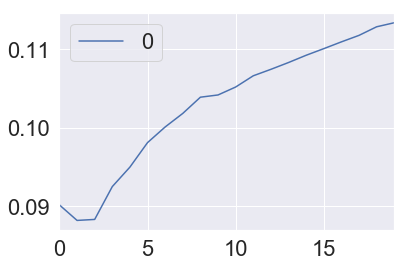

In [220]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [221]:
K = 20
model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(x_train, y_train)  #fit the model
error_train = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values

In [222]:
knn_train_R_sq = model.score(x_train, y_train) 
knn_test_R_sq = model.score(x_test, y_test) 
print('R_sq_train value for k= ' , K , 'is:', knn_train_R_sq)
print('R_sq_test value for k= ' , K , 'is:', knn_test_R_sq)
print('RMSE value for k= ' , K , 'is:', error)

R_sq_train value for k=  20 is: 0.5164018987306049
R_sq_test value for k=  20 is: 0.43568007564766986
RMSE value for k=  20 is: 0.11339796154225878


In [223]:
K = 5
model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(x_train, y_train)  #fit the model
error_test = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values


In [224]:
knn_train_R_sq = model.score(x_train, y_train) 
knn_test_R_sq = model.score(x_test, y_test) 
print('R_sq_train value for k= ' , K , 'is:', knn_train_R_sq)
print('R_sq_test value for k= ' , K , 'is:', knn_test_R_sq)
print('RMSE value for k= ' , K , 'is:', error)

R_sq_train value for k=  5 is: 0.751670545031614
R_sq_test value for k=  5 is: 0.6039188448212629
RMSE value for k=  5 is: 0.11339796154225878


In [226]:
knn_scores = cross_val_score(model, X, Y, cv=5)


predictions = cross_val_predict(model, X, Y, cv=5)
knn_accuracy = metrics.r2_score(Y, predictions)

print('Cross-validated scores:', knn_scores)
print('Cross-Predicted Accuracy:', knn_accuracy)

Cross-validated scores: [0.43881864 0.46633228 0.4981218  0.49744292 0.52224273]
Cross-Predicted Accuracy: 0.4847994665901708


In [227]:
knn_scores = knn_scores.mean()

In [241]:
data2 = [knn_train_R_sq, knn_test_R_sq, 'Not Available', 'Not Available', error, 'Not Available', knn_accuracy, knn_scores] 
model_stats_compare['M1_knn'] = data2
model_stats_compare

M1_lrm    M1_lcv    M1_rcv    M1_ecv         M1_knn
R_sq_train  0.876230  0.876230  0.876230  0.876230       0.751671
R_sq_test   0.820484  0.820487  0.820504  0.820484       0.603919
MAE         0.034900  0.034898  0.034880  0.034899  Not Available
MSE         0.003924  0.003924  0.003923  0.003924  Not Available
RMSE        0.062639  0.062638  0.062635  0.062639       0.113398
MAPE        3.478248  3.478052  3.476010  3.478156  Not Available
R_sq_CV     0.862158  0.862158  0.861940  0.861825       0.484799
CV_scores   0.861084  0.861100  0.860881  0.860796       0.484592

### evaluate 
Using the values available (R-sq train & test, RMSE, and cross-validation scores), the KNN model appears to underperform all the linear models with lower R-sq values for both train and test. The cross-validation scores are much lower than those of the linear models. In general, the linear regression models are a better choice than KNN for this data.  

### decision trees

In [242]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

R^2: 0.8534491865680269


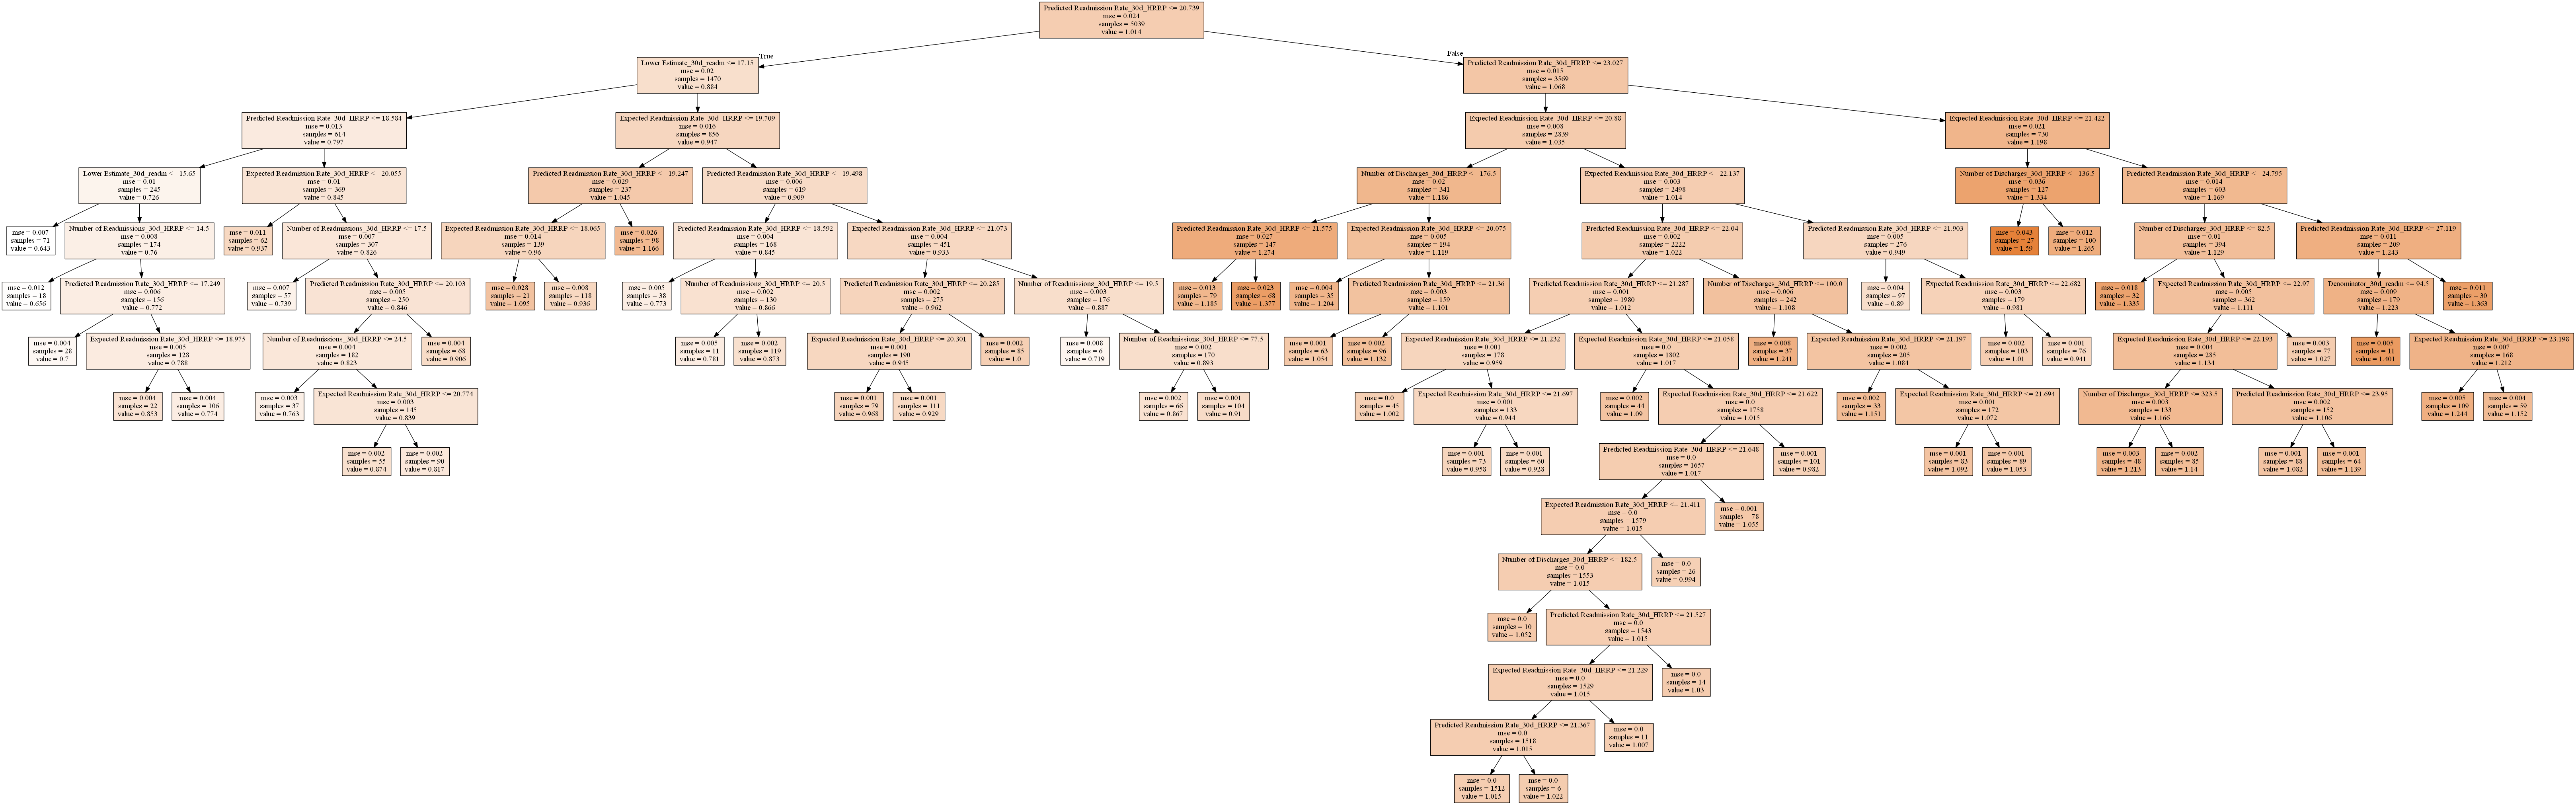

In [243]:
# Y is the target variable
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
# X is the feature set 
X = hosp_readmin_df[features4]

dtr = tree.DecisionTreeRegressor(min_samples_split=.025)
dtr.fit(X,Y)

#Get and store predicted values.
pred = dtr.predict(X)
M1_dtr = dtr.score(X, Y)
dtr_model_score = model.score(X, Y)

print('R^2: {}'.format(dtr.score(X, Y)))

dot_data = tree.export_graphviz(dtr, out_file=None,
                                feature_names=X.columns,  
                                filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())  

In [245]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

dtr.fit(X_train, Y_train)
Y_pred = dtr.predict(X_train)

#Get and store predicted values.
pred_train = dtr.predict(X_train)
dtr_R_sq_train = dtr.score(X_train, Y_train)
model_score_train = model.score(X_train, Y_train)
dtr_cv = cross_val_score(dtr, X_train, Y_train, cv=10)

print('R^2_train: {}'.format(dtr.score(X_train, Y_train)))
print('Cross Validation Score train:',cross_val_score(dtr, X_train, Y_train, cv=10))


R^2_train: 0.8570257781646899
Cross Validation Score train: [0.84593216 0.78266291 0.82235828 0.79120657 0.76030951 0.81474151
 0.75863102 0.81162308 0.8199226  0.81666788]


In [246]:
#Get and store predicted values.
Y_pred_test = dtr.predict(X_test)
M1_dtr_test = dtr.score(X_test, Y_test)
model_score = model.score(X_test, Y_test)

#save results for comparison
dtr_R_sq_test = dtr.score(X_test, Y_test)
dtr_MAE = mean_absolute_error(Y_test, Y_pred_test)
dtr_MSE = mse(Y_test, Y_pred_test)
dtr_RMSE = rmse(Y_test, Y_pred_test)
dtr_MAPE = np.mean(np.abs((Y_test - Y_pred_test) / Y_test)) * 100

print('R^2_test: {}'.format(dtr.score(X_test, Y_test)))
print('Cross Validation Score test:',cross_val_score(dtr, X_test, Y_test, cv=10))
print('Mean absolute error of the prediction is: {}'.format(dtr_MAE))
print('Mean squared error of the prediction is: {}'.format(dtr_MSE))
print('Root mean squared error of the prediction is: {}'.format(dtr_RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(dtr_MAPE))

R^2_test: 0.8367135316117706
Cross Validation Score test: [0.76931973 0.86307803 0.78470745 0.76667119 0.60123167 0.7332172
 0.81157124 0.78735272 0.8920044  0.7533111 ]
Mean absolute error of the prediction is: 0.03570335466734271
Mean squared error of the prediction is: 0.0037893710719652716
Root mean squared error of the prediction is: 0.06155786766909061
Mean absolute percentage error of the prediction is: 3.562416641309559


In [247]:
dtr_scores = cross_val_score(dtr, X, Y, cv=5)


predictions = cross_val_predict(dtr, X, Y, cv=5)
dtr_accuracy = metrics.r2_score(Y, predictions)

print('Cross-validated scores:', dtr_scores)
print('Cross-Predicted Accuracy:', dtr_accuracy)

Cross-validated scores: [0.7843242  0.69253677 0.73977996 0.75977652 0.80863694]
Cross-Predicted Accuracy: 0.7585895971163237


In [249]:
dtr_scores = dtr_scores.mean()

In [250]:
data3 = [dtr_R_sq_train, dtr_R_sq_test, dtr_MAE, dtr_MSE, dtr_RMSE, dtr_MAPE, dtr_accuracy, dtr_scores] 
model_stats_compare['M1_dtr'] = data3
model_stats_compare

M1_lrm    M1_lcv    M1_rcv    M1_ecv         M1_knn    M1_dtr
R_sq_train  0.876230  0.876230  0.876230  0.876230       0.751671  0.857026
R_sq_test   0.820484  0.820487  0.820504  0.820484       0.603919  0.836714
MAE         0.034900  0.034898  0.034880  0.034899  Not Available  0.035703
MSE         0.003924  0.003924  0.003923  0.003924  Not Available  0.003789
RMSE        0.062639  0.062638  0.062635  0.062639       0.113398  0.061558
MAPE        3.478248  3.478052  3.476010  3.478156  Not Available  3.562417
R_sq_CV     0.862158  0.862158  0.861940  0.861825       0.484799  0.758590
CV_scores   0.861084  0.861100  0.860881  0.860796       0.484592  0.757011

### random forest

In [251]:
from sklearn import ensemble

In [252]:
# Y is the target variable
Y = hosp_readmin_df['actual_rratio_30d_HRRP']
# X is the feature set 
X = hosp_readmin_df[features4]

rfr = ensemble.RandomForestRegressor()
rfr.fit(X, Y)

#Get and store predicted values.
y_pred = rfr.predict(X)
M1_rfr = rfr.score(X, Y)
rfr_model_score = model.score(X, Y)

print('R^2: {}'.format(rfr.score(X, Y)))
print('Cross Validation Score:',cross_val_score(rfr, X, Y, cv=10))



C:\Users\katec\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2: 0.9946967682217609
Cross Validation Score: [0.92611571 0.94458956 0.96786533 0.90104146 0.86932289 0.94513083
 0.90847002 0.94099987 0.93676885 0.96729274]


In [253]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_train)

#Get and store predicted values.
pred_train = rfr.predict(X_train)
rfr_R_sq_train = rfr.score(X_train, Y_train)
model_score_train = model.score(X_train, Y_train)

print('R^2: {}'.format(rfr.score(X_train, Y_train)))
print('Cross Validation Score:',cross_val_score(rfr, X_train, Y_train, cv=10))


R^2: 0.9916223903798779
Cross Validation Score: [0.9714968  0.93348689 0.95779615 0.95356421 0.93506464 0.96041167
 0.96522171 0.97598929 0.95270099 0.90940613]


In [254]:

#Get and store predicted values.
Y_pred_test = rfr.predict(X_test)
M1_rfr_test = rfr.score(X_test, Y_test)
model_score = model.score(X_test, Y_test)

#save results for comparison

rfr_R_sq_test = rfr.score(X_test, Y_test)
rfr_MAE = mean_absolute_error(Y_test, Y_pred_test)
rfr_MSE = mse(Y_test, Y_pred_test)
rfr_RMSE = rmse(Y_test, Y_pred_test)
rfr_MAPE = np.mean(np.abs((Y_test - Y_pred_test) / Y_test)) * 100

print('R^2_test: {}'.format(rfr.score(X_test, Y_test)))
print('Cross Validation Score test:',cross_val_score(rfr, X_test, Y_test, cv=10))
print('Mean absolute error of the prediction is: {}'.format(rfr_MAE))
print('Mean squared error of the prediction is: {}'.format(rfr_MSE))
print('Root mean squared error of the prediction is: {}'.format(rfr_RMSE))
print('Mean absolute percentage error of the prediction is: {}'.format(rfr_MAPE))

R^2_test: 0.9634669127749678
Cross Validation Score test: [0.89054602 0.92766366 0.79849581 0.91962513 0.90837425 0.90549316
 0.87496029 0.87829102 0.85644006 0.86194674]
Mean absolute error of the prediction is: 0.012480715567624985
Mean squared error of the prediction is: 0.000834360970300459
Root mean squared error of the prediction is: 0.02888530716991701
Mean absolute percentage error of the prediction is: 1.3091341277668607


In [255]:
rfr_scores = cross_val_score(rfr, X, Y, cv=5)


predictions = cross_val_predict(rfr, X, Y, cv=5)
rfr_accuracy = metrics.r2_score(Y, predictions)

print('Cross-validated scores:', rfr_scores)
print('Cross-Predicted Accuracy:', rfr_accuracy)

Cross-validated scores: [0.93410366 0.93424418 0.91354965 0.92493496 0.9430662 ]
Cross-Predicted Accuracy: 0.929379640868707


In [256]:
rfr_scores = rfr_scores.mean()

In [257]:
data4 = [rfr_R_sq_train, rfr_R_sq_test, rfr_MAE, dtr_MSE, rfr_RMSE, rfr_MAPE, rfr_accuracy, rfr_scores] 
model_stats_compare['M1_rfr'] = data4
model_stats_compare

M1_lrm    M1_lcv    M1_rcv    M1_ecv         M1_knn    M1_dtr  \
R_sq_train  0.876230  0.876230  0.876230  0.876230       0.751671  0.857026   
R_sq_test   0.820484  0.820487  0.820504  0.820484       0.603919  0.836714   
MAE         0.034900  0.034898  0.034880  0.034899  Not Available  0.035703   
MSE         0.003924  0.003924  0.003923  0.003924  Not Available  0.003789   
RMSE        0.062639  0.062638  0.062635  0.062639       0.113398  0.061558   
MAPE        3.478248  3.478052  3.476010  3.478156  Not Available  3.562417   
R_sq_CV     0.862158  0.862158  0.861940  0.861825       0.484799  0.758590   
CV_scores   0.861084  0.861100  0.860881  0.860796       0.484592  0.757011   

              M1_rfr  
R_sq_train  0.991622  
R_sq_test   0.963467  
MAE         0.012481  
MSE         0.003789  
RMSE        0.028885  
MAPE        1.309134  
R_sq_CV     0.929380  
CV_scores   0.929980

### final evaluation
The Random Forest Regressor model is clearly the best performing model in all metrics. The cross-validation metrcs are somewhat lower than the test-train metrics, suggesting some overfitting. However, there does not appear to be any drastic differences in the RFR model scores, suggesting that it is, in fact, performing well. According to the literature, random forest models are known to produce robust, high-performing models that have some controls for over-fitting. 

The main shortcoming of the RFR model is the "black box" process of the model, which makes a deeper understanding of the processes difficult if not impossible. 